<a href="https://colab.research.google.com/github/AdnachielBismarck/Portfolio_Data_Analysis/blob/main/E_Commerce_Sales_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis Integral de E-commerce**

## **Resumen Ejecutivo**

Este análisis integral del rendimiento de e-commerce evalúa aspectos financieros, logísticos, comerciales y de comportamiento del cliente utilizando datos de transacciones. Los hallazgos clave son los siguientes:

**Área Financiera:** El negocio muestra una sólida salud financiera con un total de ventas de **\$5,865,293.01** y un ticket promedio de **\$170.01**. Las categorías de **Electrónica, Hogar y Deportes** son las más rentables, mientras que los descuentos impactan negativamente los márgenes. Los gastos de envío y devoluciones representan una proporción manejable del total.

**Área Logística:** Los tiempos de entrega varían regionalmente, con el **Este** teniendo el promedio más alto. No se observa una relación fuerte entre el tiempo de entrega y las devoluciones. El costo de envío tiene una correlación positiva con el margen, posiblemente debido a productos de mayor valor. La región **Sur** tiene el mayor volumen de ventas y devoluciones.

**Área Comercial:** Las ventas muestran fluctuaciones estacionales, con picos hacia fin de año. **Electrónica, Hogar y Deportes** son las categorías más vendidas. El Top 10 de productos contribuye con el **1.37%** de las ventas totales. **Abril y Diciembre** son meses de alta estacionalidad, mientras que **Enero y Agosto** son bajos.

**Descripción de los Consumidores:** La base de clientes está equitativamente distribuida por género y aumenta con la edad. Una gran proporción de clientes son recurrentes (**93.99%** de clientes únicos, con **7428** recurrentes y **475** nuevos). El clustering RFM identificó 4 segmentos, siendo el **Cluster 3** el más valioso por su alta frecuencia, bajo recencia y alto gasto. La tasa de retención de cohortes disminuye con el tiempo.

**Método de Pago:** La **tarjeta de crédito** es el método más utilizado en todas las regiones. La rentabilidad y las tasas de devolución varían poco entre métodos, siendo las diferencias más asociadas al volumen de transacciones por método.

En general, el e-commerce tiene un buen desempeño con áreas claras para optimizar la rentabilidad (gestión de descuentos, enfoque en categorías rentables), mejorar la logística regional y capitalizar los segmentos de clientes más valiosos a través de estrategias de retención y marketing dirigidas.

## **1. Introducción y Contexto**
El dataset proviene de transacciones de un e-commerce e incluye información de ventas, categorías de producto, clientes, métodos de pago, costos de envío, tiempos de entrega y devoluciones.  
El objetivo es evaluar de forma integral la rentabilidad, la eficiencia logística, el comportamiento de los clientes y las tendencias comerciales, con el fin de identificar oportunidades estratégicas basadas en datos.

**Objetivo general:**  
Evaluar el desempeño financiero, logístico, comercial y de clientes en una empresa de comercio electrónico, con el fin de identificar oportunidades de optimización en rentabilidad, eficiencia operativa y satisfacción del cliente.

## **2. Importación de Librerias, Carga de Datos y Ajustes Generales de Gráficos**

#### **Importación de librerias**



In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias para usar K-Means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Librerias para cálculo de cohortes
from operator import attrgetter

#### **Carga de datos**

In [ ]:
# Carga y Obtención del dataset de trabajo
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/Data_Analysis_Projects/E-commerce_Sales_Transactions/ecommerce_sales_34500.csv'

# Cargar archivo como CSV
try:
  data=pd.read_csv(file_path)
  print("Dataset cargado exitosamente.")
except FileNotFoundError:
  print(f"Error: El archivo no se encontró en la ruta especificada.{file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset cargado exitosamente.


#### **Configuración general de gráficos (paletas de colores)**

In [ ]:
# Configuración inicial para visualización
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

# Definir paleta de colores personalizada
custom_palette_1=['#001219' , '#005f73' , '#0a9396', '#94d2bd' , '#e9d8a6' , '#ee9b00' , '#ca6702', '#bb3e03' , '#ae2012' , '#9b2226']
custom_palette_2=['#f94144' , '#f3722c' , '#f8961e', '#f9844a' , '#f9c74f' , '#90be6d' , '#43aa8b', '#4d908e' , '#577590' , '#277da1']
custom_palette_3=['#d9ed92' , '#b5e48c' , '#99d98c', '#76c893' , '#52b69a' , '#34a0a4' , '#168aad', '#1a759f' , '#1e6091' , '#184e77']
custom_palette_4=['#fbf8cc' , '#fde4cf' , '#ffcfd2', '#f1c0e8' , '#cfbaf0' , '#a3c4f3' , '#90dbf4', '#8eecf5' , '#98f5e1' , '#b9fbc0']
custom_palette_5=['#ff7b00' , '#ff8800' , '#ff9500', '#ffa200' , '#ffaa00' , '#ffb700' , '#ffc300', '#ffd000' , '#ffdd00' , '#ffea00']
custom_palette_6=['#f72585' , '#b5179e' , '#7209b7', '#560bad' , '#480ca8' , '#3a0ca3' , '#3f37c9', '#4361ee' , '#4895ef' , '#4cc9f0']
sns.set_palette(custom_palette_1)
sns.set_palette(custom_palette_2)
sns.set_palette(custom_palette_3)
sns.set_palette(custom_palette_4)
sns.set_palette(custom_palette_5)
sns.set_palette(custom_palette_6)

## **Funciones de Agrupación y Otras Funciones Generales**

Esta sección se dedica a la preparación inicial y el procesamiento de los datos transaccionales. Aquí se cargan los datos brutos y se aplican funciones generales de agrupación para crear DataFrames resumidos por diferentes dimensiones (como región, categoría, cliente, método de pago). Gran parte de este procesamiento se realiza utilizando funciones definidas en un script de Python externo para mantener el cuaderno principal limpio y modular. Estos DataFrames agrupados servirán como base para los análisis detallados en las secciones siguientes.

In [ ]:
### Agrupación de los datos por Mes

data['order_date'] = pd.to_datetime(data['order_date'])
Datos_Ventas_Temporales=data.groupby(data['order_date'].dt.to_period('M')).agg(
    ventas_totales=('total_amount','sum'),
    margen_ganancias=('profit_margin','sum'),
    gasto_envio=('shipping_cost','sum'),
)
Datos_Ventas_Temporales.index = Datos_Ventas_Temporales.index.astype(str)

### Agrupación del dataframe por región

Resumen_region = data.groupby('region').agg(
    numero_clientes=('customer_id', lambda x: x.nunique()),
    dias_entrega_promedio=('delivery_time_days','mean'),
    dias_entrega_promedio_articulos_devueltos=('delivery_time_days',lambda x:x[data.loc[x.index,'returned']=='Yes'].mean()),
    dias_entrega_promedio_articulos_no_devueltos=('delivery_time_days',lambda x:x[data.loc[x.index,'returned']=='No'].mean()),
    cantidad_productos_vendidos=('quantity', 'sum'),
    ventas_totales=('total_amount', 'sum'),
    cantidad_productos_devueltos=('quantity',lambda x:x[data.loc[x.index,'returned']=='Yes'].sum()),
    ventas_devolutas=('total_amount', lambda x: x[data.loc[x.index, 'returned'] == 'Yes'].sum()),
    cantidad_productos_vendidos_netos=('quantity',lambda x:x[data.loc[x.index,'returned']=='No'].sum()),
    ventas_netas=('total_amount', lambda x: x[data.loc[x.index, 'returned'] == 'No'].sum()),
    costo_total_envio=('shipping_cost','sum'),
    costo_promedio_envio=('shipping_cost','mean'),
    margen_promedio_venta=('profit_margin','mean')
).round(2)

### Agrupación de los datos por categoría de producto

Resumen_categoría= data.groupby('category').agg(
    numero_clientes=('customer_id', lambda x:x.nunique()),
    cantidad_productos_vendidos=('quantity','sum'),
    ventas_totales=('total_amount','sum'),
    cantidad_productos_devueltos=('quantity',lambda x:x[data.loc[x.index,'returned']=='Yes'].sum()),
    ventas_devolutas=('total_amount',lambda x: x[data.loc[x.index,'returned']=='Yes'].sum()),
    cantidad_productos_vendidos_netos=('quantity',lambda x:x[data.loc[x.index,'returned']=='No'].sum()),
    ventas_netas=('total_amount',lambda x:x[data.loc[x.index,'returned']=='No'].sum()),
    margen_promedio_venta=('profit_margin','mean')
).round(2)

### Agrupación por consumidores

print("\nDistribución por género de compradores:")
Resumen_consumidores=data.groupby('customer_gender').agg(
    numero_clientes=('customer_id',lambda x:x.nunique()),
    numero_clientes_frecuentes=('customer_id', lambda x: (x.value_counts() > 1).sum()),
    cantidad_productos_vendidos=('quantity','sum'),
    cantidad_productos_devueltos=('quantity',lambda x:x[data.loc[x.index,'returned']=='Yes'].sum()),
    ventas_totales=('total_amount','sum'),
    ventas_devolutas=('total_amount',lambda x:x[data.loc[x.index,'returned']=='Yes'].sum()),
    cantidad_productos_vendidos_netos=('quantity',lambda x:x[data.loc[x.index,'returned']=='No'].sum()),
    ventas_netas=('total_amount',lambda x:x[data.loc[x.index,'returned']=='No'].sum())
).round(2)


### Agrupación de los datos por método de pago

Resumen_metodo_pago= data.groupby('payment_method').agg(
    numero_clientes=('customer_id',lambda x:x.nunique()),
    cantidad_productos_vendidos=('quantity','sum'),
    ventas_totales=('total_amount','sum'),
    cantidad_productos_devueltos=('quantity',lambda x:x[data.loc[x.index,'returned']=='Yes'].sum()),
    ventas_devolutas=('total_amount',lambda x:x[data.loc[x.index,'returned']=='Yes'].sum()),
    cantidad_productos_vendidos_netos=('quantity',lambda x:x[data.loc[x.index,'returned']=='No'].sum()),
    ventas_netas=('total_amount',lambda x:x[data.loc[x.index,'returned']=='No'].sum())
).round(2)

### Agrupación de los datos por categoría

Resumen_productos= data.groupby('product_id').agg(
    numero_clientes=('customer_id',lambda x:x.nunique()),
    cantidad_productos_vendidos=('quantity','sum'),
    ventas_totales=('total_amount','sum')
    ).round(2)


### Resumen de los consumidores por compras
ultima_fecha_compra=data['order_date'].max()

Resumen_consumidores_compras=data.groupby('customer_id').agg(
    recencia=('order_date',lambda date:(ultima_fecha_compra-date.max()).days),
    frecuencia_compra= ('order_id','nunique'),
    gasto_cliente=('total_amount','sum')
).reset_index()

### Agrupación de métodos de pago por región

Resumen_region_metodo_pago = data.groupby(['region', 'payment_method']).size().unstack(fill_value=0)


# Sort Resumen_region_metodo_pago by the sum of all payment methods for each region
Resumen_region_metodo_pago_sorted = Resumen_region_metodo_pago.sum(axis=1).sort_values(ascending=False)

# Reindex Resumen_region_metodo_pago based on the sorted order
Resumen_region_metodo_pago_sorted = Resumen_region_metodo_pago.reindex(Resumen_region_metodo_pago_sorted.index)

### Rentabilidad por método de pago
Rentabilidad_promedio_metodo_pago = data.groupby('payment_method')['profit_margin'].mean().sort_values(ascending=False)


Distribución por género de compradores:


###### Funciones y cálculos

In [ ]:
# ----------------------------------------------------------------------------
# CÁLCULOS GLOBALES O PREPARACIÓN DE DATOS PARA MÚLTIPLES SECCIONES
# ----------------------------------------------------------------------------

# Creación de grupos de edad
data['age_group']=pd.cut(data['customer_age'],bins=[0,18,25,35,50,100],labels=['<18','18-25','25-35','35-50','>50'])

# Creación de rangos de descuentos únicos para el dataset
data['rango_de_descuento'] = pd.cut(data['discount'],bins=[-0.01,0.01,0.05,0.1,0.15,0.2,0.25,0.31],
                                labels=['0%','1-5%','5-10%','10-15%','15-20%','20-25%','25-30%'],right=False)

# Cálculo de Cohortes por mes y número de periodo
data['order_date']=pd.to_datetime(data['order_date'])
data['mes_de_pedido']=data['order_date'].dt.to_period('M')
data['mes_de_cohorte']=data.groupby('customer_id')['mes_de_pedido'].transform('min')


# ----------------------------------------------------------------------------
# CÁLCULOS SECCIÓN: Área Comercial - Ventas y Estacionalidad
# ----------------------------------------------------------------------------

# Extraer el mes de la columna 'order_date' y agrupar por mes para calcular el promedio
data['month'] = pd.to_datetime(data['order_date']).dt.month # Mover esta línea antes de usar 'month'
average_monthly_sales = data.groupby('month')['total_amount'].mean()

# Cálculos para el Top 10 de productos por ventas

# Calculate total sales
total_sales = data['total_amount'].sum() # O usar el total de ventas de Resumen_productos si se basa en eso

# Cálculo del Top 10 de productos por ventas
top_10_products_sales = Resumen_productos.sort_values(by='ventas_totales', ascending=False).head(10)

# Cálculo de la suma de los Top 10 productos
sum_top_10_sales = top_10_products_sales['ventas_totales'].sum()

# Cálculo de la proporción del Top 10 de productos con respecto al total
proportion_top_10 = sum_top_10_sales / total_sales


# ----------------------------------------------------------------------------
# CÁLCULOS SECCIÓN: Área Financiera - Rentabilidad y Descuentos
# ----------------------------------------------------------------------------

### Cálculo para el gráfico de pastel de la proporción de ingresos perdidos por costos y devoluciones ###
# (Originalmente en celda 0D8b1gqTLwKX)

# Cálculo del costo total de envío y las ventas perdidas por devolución
costo_total_envio= data['shipping_cost'].sum()
ventas_perdidas_devoluciones = data.loc[data['returned'] == 'Yes','total_amount'].sum()

# Cálculo del margen de beneficio
margen_total = data['profit_margin'].sum()

# Cálculo de de gastos totales (costo de envio más ventas perdidas por devoluciones)
gastos_totales=costo_total_envio+ventas_perdidas_devoluciones

# Creación de la serie que contendra los valores para el gráfico de pastel
proporciones_financieras = pd.Series({'Gastos (Envío + Devoluciones)':gastos_totales,'Margen de Beneficio Total':margen_total})


### Cálculos para detectar el Márgen de Beneficios Promedio por Rango de Descuento ###


#print("Valores únicos de descuentos:")
#display(data['discount'].value_counts().sort_index())

# Creación de rangos de descuentos únicos para el dataset
data['rango_de_descuento'] = pd.cut(data['discount'],bins=[-0.01,0.01,0.05,0.1,0.15,0.2,0.25,0.31],
                                labels=['0%','1-5%','5-10%','10-15%','15-20%','20-25%','25-30%'],right=False)

# Cálculo del valor promedio del margen de beneficio por rango
margen_de_ganancia_por_descuento = data.groupby('rango_de_descuento',observed=False)['profit_margin'].mean().reset_index()

#print("Margen de beneficio promedio por rango de descuenti:")
#display(margen_de_ganancia_por_descuento)

# Ventas totales y Ticket promedio
Ventas_total=(data['price']*data['quantity']*(1-data['discount'])).sum()
Venta_promedio=(data['total_amount']).mean()


# ----------------------------------------------------------------------------
# CÁLCULOS SECCIÓN: Descripción de los Consumidores - Segmentación y Valor
# ----------------------------------------------------------------------------

### MODELO K-MEANS ###
#Ajustes iniciales para el modelo K-Means
Resumen_consumidor_KM=data.groupby('customer_id').agg(
    primera_fecha_compra=('order_date','min'),
    ultima_fecha_compra=('order_date','max'),
    edad_consumidor_primera_compra=('customer_age','first')
).reset_index()

# Calcular edad al momento de la última compra
Resumen_consumidor_KM['edad_ultima_compra']=Resumen_consumidor_KM['edad_consumidor_primera_compra'] + ((Resumen_consumidor_KM['ultima_fecha_compra']-Resumen_consumidor_KM['primera_fecha_compra']).dt.days/365.25).round().astype(int)

# Combinar la edad calculada al momento de la última compra con el DataFrame RFM
# Manejar columnas duplicadas durante el merge
Resumen_consumidores_compras = pd.merge(
    Resumen_consumidores_compras.drop(columns=['edad_ultima_compra'], errors='ignore'), # Eliminar columna si ya existe para evitar sufijos
    Resumen_consumidor_KM[['customer_id','edad_ultima_compra']],
    on='customer_id',
    how='left'
)

# Preparar datos para clustering (datos RFM + edad al momento de la última compra)
# Escalar los datos antes de aplicar KMeans
scaler=StandardScaler()
RFM_Scaled=scaler.fit_transform(Resumen_consumidores_compras[['recencia','frecuencia_compra','gasto_cliente','edad_ultima_compra']])

# Aplicación método del codo para determinar el número óptimo de clusters
Inertia=[]
for n_clusters in range(1,12):
  kmeans=KMeans(n_clusters=n_clusters,random_state=45,n_init=10)
  kmeans.fit(RFM_Scaled)
  Inertia.append(kmeans.inertia_)

# Gráfico del método del codo
#plt.figure(figsize=(12,6))
#plt.plot(range(1,12),Inertia,marker='o')
#plt.title('Método del Codo para el Número Óptimo de Clusters')
#plt.xlabel('Número de Clusters')
#plt.ylabel('Inertia')
#plt.xticks(range(1,12))
#plt.grid(True)
#plt.show()

# Ajustes finales para el modelo K-Means con el número de clusters elegido
n_clusters=4 # Basado en el método del codo, se elige 4 clusters para este ejemplo
kmeans=KMeans(n_clusters=n_clusters,random_state=45,n_init=10)
Resumen_consumidores_compras['Cluster']=kmeans.fit_predict(RFM_Scaled)


### MODELO DE COHORTES ###

# Cálculo de tabla de Cohortes
cohort_data=data.groupby(['mes_de_cohorte','mes_de_pedido']).agg(
    numero_consumidores=('customer_id','nunique')
).reset_index(drop=False)

# Cálculo del número de periodo
cohort_data['numero_de_periodo']= (cohort_data.mes_de_pedido-cohort_data.mes_de_cohorte).apply(attrgetter('n'))

# Creación de matriz
cohort_matrix=cohort_data.pivot_table(index='mes_de_cohorte',columns='numero_de_periodo',values='numero_consumidores')

# Cálculo de la tasa de retención
dimension_de_cohorte=cohort_matrix.iloc[:,0]
matriz_retencion=cohort_matrix.divide(dimension_de_cohorte,axis=0)

#print("Matriz de retención")
#display(matriz_retencion.round(3))

### Cálculos para el LCTV ###
Resumen_consumidores_compras['CLTV_historico'] = Resumen_consumidores_compras['gasto_cliente']

# Cálculos adicionales de CLTV (si los hubieras añadido, irían aquí)

# Calcular número de clientes nuevos vs. recurrentes
total_unique_customers = data['customer_id'].nunique()
customers_multiple_purchases = data.groupby('customer_id').filter(lambda x: len(x) > 1)['customer_id'].nunique()
new_customers = total_unique_customers - customers_multiple_purchases
proportion_recurrent = customers_multiple_purchases / total_unique_customers

# Calcular el número de clientes por grupo de edad y género
clientes_por_genero_edad = data.groupby(['age_group', 'customer_gender'], observed=False)['customer_id'].nunique().unstack()

## **2. Preparación y Exploración de Datos (EDA)**
Antes de realizar análisis específicos, es fundamental explorar la estructura y calidad del dataset.  
Aquí se describen las variables principales, su tipo de dato, valores nulos y estadísticos básicos (media, mediana, desviación estándar).  
Este análisis permite identificar patrones generales, distribuciones atípicas y relaciones iniciales entre las variables más relevantes, como ventas (`revenue`), margen (`profit_margin`), descuento (`discount`) y tiempo de entrega (`delivery_time_days`).

###### **Exploración general del dataset**

In [ ]:
print("\nPrimeras filas del dataset:")
display(data.head(3))

print("\nÚltimas filas del dataset:")
display(data.tail(3))

print("Información general del dataset:")
display(data.info())

print("\nValores faltantes por columna:")
display(data.isnull().sum())

print("\nNúmero de filas duplicadas:")
display(data.duplicated().sum())

print("\nDimensiones del dataset (filas, columnas):")
display(data.shape)

print("\nPeriodo comprendido en el dataset:")
display(data['order_date'].min(),data['order_date'].max())



Primeras filas del dataset:


order_id customer_id product_id     category   price  discount  quantity  \
0  O100000      C17270    P234890         Home  164.08      0.15         1   
1  O100001      C17603    P228204      Grocery   24.73      0.00         1   
2  O100002      C10860    P213892  Electronics  175.58      0.05         1   

  payment_method order_date  delivery_time_days  ... total_amount  \
0    Credit Card 2023-12-23                   4  ...       139.47   
1    Credit Card 2025-04-03                   6  ...        24.73   
2    Credit Card 2024-10-08                   4  ...       166.80   

  shipping_cost  profit_margin  customer_age  customer_gender  age_group  \
0          7.88          31.17            60           Female        >50   
1          4.60          -2.62            37             Male      35-50   
2          6.58          13.44            34             Male      25-35   

  rango_de_descuento mes_de_pedido mes_de_cohorte month  
0             15-20%       2023-12        2023-10    12  
1                 0%       2025-04        2024-01     4  
2              5-10%       2024-10        2024-01    10  

[3 rows x 22 columns]


Últimas filas del dataset:


order_id customer_id product_id     category   price  discount  \
34497  O134497      C12986    P204345  Electronics  323.64      0.00   
34498  O134498      C17196    P217644         Home   23.09      0.05   
34499  O134499      C13330    P207047         Home   76.84      0.00   

       quantity payment_method order_date  delivery_time_days  ...  \
34497         5    Credit Card 2025-02-01                   6  ...   
34498         1    Credit Card 2024-03-27                   6  ...   
34499         1     Debit Card 2025-09-11                   6  ...   

      total_amount shipping_cost  profit_margin  customer_age  \
34497      1618.20         12.18         182.00            41   
34498        21.94          5.61           0.53            27   
34499        76.84          7.57          13.95            19   

       customer_gender  age_group rango_de_descuento mes_de_pedido  \
34497           Female      35-50                 0%       2025-02   
34498           Female      25-35              5-10%       2024-03   
34499             Male      18-25                 0%       2025-09   

      mes_de_cohorte month  
34497        2023-12     2  
34498        2024-01     3  
34499        2023-09     9  

[3 rows x 22 columns]

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            34500 non-null  object        
 1   customer_id         34500 non-null  object        
 2   product_id          34500 non-null  object        
 3   category            34500 non-null  object        
 4   price               34500 non-null  float64       
 5   discount            34500 non-null  float64       
 6   quantity            34500 non-null  int64         
 7   payment_method      34500 non-null  object        
 8   order_date          34500 non-null  datetime64[ns]
 9   delivery_time_days  34500 non-null  int64         
 10  region              34500 non-null  object        
 11  returned            34500 non-null  object        
 12  total_amount        34500 non-null  float64       
 13  shipping_cost

None


Valores faltantes por columna:


order_id              0
customer_id           0
product_id            0
category              0
price                 0
discount              0
quantity              0
payment_method        0
order_date            0
delivery_time_days    0
region                0
returned              0
total_amount          0
shipping_cost         0
profit_margin         0
customer_age          0
customer_gender       0
age_group             0
rango_de_descuento    0
mes_de_pedido         0
mes_de_cohorte        0
month                 0
dtype: int64


Número de filas duplicadas:


np.int64(0)


Dimensiones del dataset (filas, columnas):


(34500, 22)


Periodo comprendido en el dataset:


Timestamp('2023-09-12 00:00:00')

Timestamp('2025-09-11 00:00:00')

#### **Estadística descriptiva**

In [ ]:
print("\nInformación estadística del dataset:")
display(data.describe())

print("\nTabla de correlaciones")
display(data.corr(numeric_only=True))


Información estadística del dataset:


price      discount      quantity  \
count  34500.000000  34500.000000  34500.000000   
mean     119.391632      0.049291      1.490725   
min        1.010000      0.000000      1.000000   
25%       16.690000      0.000000      1.000000   
50%       45.660000      0.000000      1.000000   
75%      130.950000      0.100000      2.000000   
max     2930.470000      0.300000      5.000000   
std      195.620477      0.069894      0.932270   

                          order_date  delivery_time_days  total_amount  \
count                          34500        34500.000000  34500.000000   
mean   2024-09-13 13:39:17.843478272            4.814203    170.008494   
min              2023-09-12 00:00:00            3.000000      0.820000   
25%              2024-03-14 00:00:00            4.000000     19.710000   
50%              2024-09-16 00:00:00            5.000000     56.820000   
75%              2025-03-17 00:00:00            6.000000    168.530000   
max              2025-09-11 00:00:00           13.000000  12931.800000   
std                              NaN            1.242141    357.503014   

       shipping_cost  profit_margin  customer_age         month  
count   34500.000000   34500.000000  34500.000000  34500.000000  
mean        6.152120      28.116505     43.474377      6.547449  
min         0.000000      -6.200000     18.000000      1.000000  
25%         4.420000       1.500000     31.000000      4.000000  
50%         6.090000      10.550000     43.000000      7.000000  
75%         7.830000      33.132500     56.000000     10.000000  
max        15.650000    1536.170000     69.000000     12.000000  
std         2.389539      53.352947     14.980682      3.445885


Tabla de correlaciones


price  discount  quantity  delivery_time_days  \
price               1.000000  0.008736  0.005324            0.007612   
discount            0.008736  1.000000 -0.008431            0.002490   
quantity            0.005324 -0.008431  1.000000            0.005120   
delivery_time_days  0.007612  0.002490  0.005120            1.000000   
total_amount        0.801426 -0.031202  0.304134            0.005495   
shipping_cost       0.654110 -0.046383  0.278292            0.007651   
profit_margin       0.679105 -0.047470  0.388398            0.005832   
customer_age       -0.010550  0.000181  0.000352            0.003624   
month               0.004537  0.002646  0.005077            0.002601   

                    total_amount  shipping_cost  profit_margin  customer_age  \
price                   0.801426       0.654110       0.679105     -0.010550   
discount               -0.031202      -0.046383      -0.047470      0.000181   
quantity                0.304134       0.278292       0.388398      0.000352   
delivery_time_days      0.005495       0.007651       0.005832      0.003624   
total_amount            1.000000       0.599079       0.893327     -0.009870   
shipping_cost           0.599079       1.000000       0.616730     -0.008951   
profit_margin           0.893327       0.616730       1.000000     -0.007712   
customer_age           -0.009870      -0.008951      -0.007712      1.000000   
month                   0.007428       0.001276       0.004826      0.001122   

                       month  
price               0.004537  
discount            0.002646  
quantity            0.005077  
delivery_time_days  0.002601  
total_amount        0.007428  
shipping_cost       0.001276  
profit_margin       0.004826  
customer_age        0.001122  
month               1.000000

## **Área Financiera -Rentabilidad y Descuentos**

El análisis financiero busca determinar la rentabilidad real del negocio, evaluando ingresos, márgenes y descuentos aplicados.  
Se estudiará la relación entre el volumen de ventas y el margen de beneficio, así como la distribución de los ingresos por región, categoría y periodo temporal.  
También se examinará cómo los descuentos y los costos logísticos afectan la ganancia neta y qué categorías aportan mayor rentabilidad.

**Objetivo descriptivo:** conocer la estructura económica del e-commerce y detectar posibles fugas de valor.

1.   ¿Cuánto se vendió en total y cuál fue el ticket promedio por pedido?
2.   ¿Qué categorías y regiones son las más rentables?
3.   ¿Cómo se comportan los márgenes en el tiempo?
4.   ¿Cuál es el impacto de los descuentos sobre la rentabilidad?
5.   ¿Qué proporción de los ingresos se pierde por costos de envío o devoluciones?


Venta totales:
5865293.01

Ticket promedio:
170.01


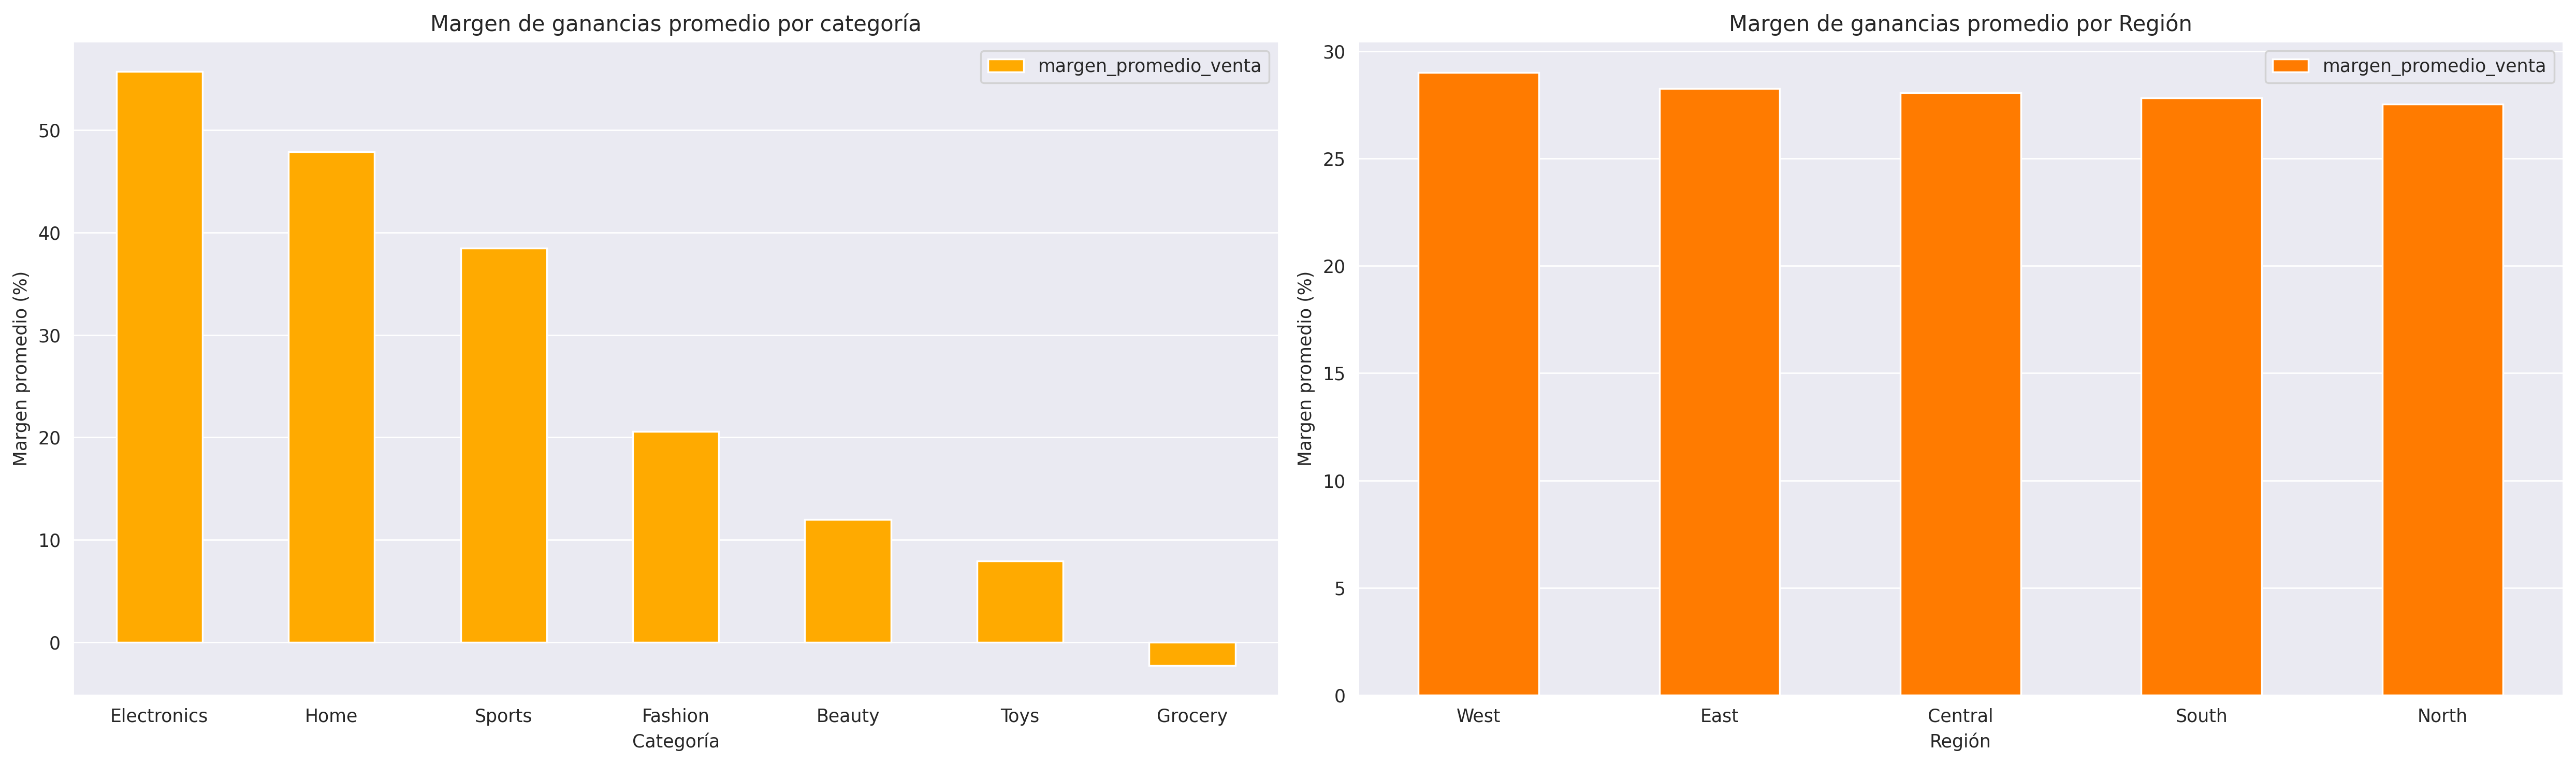

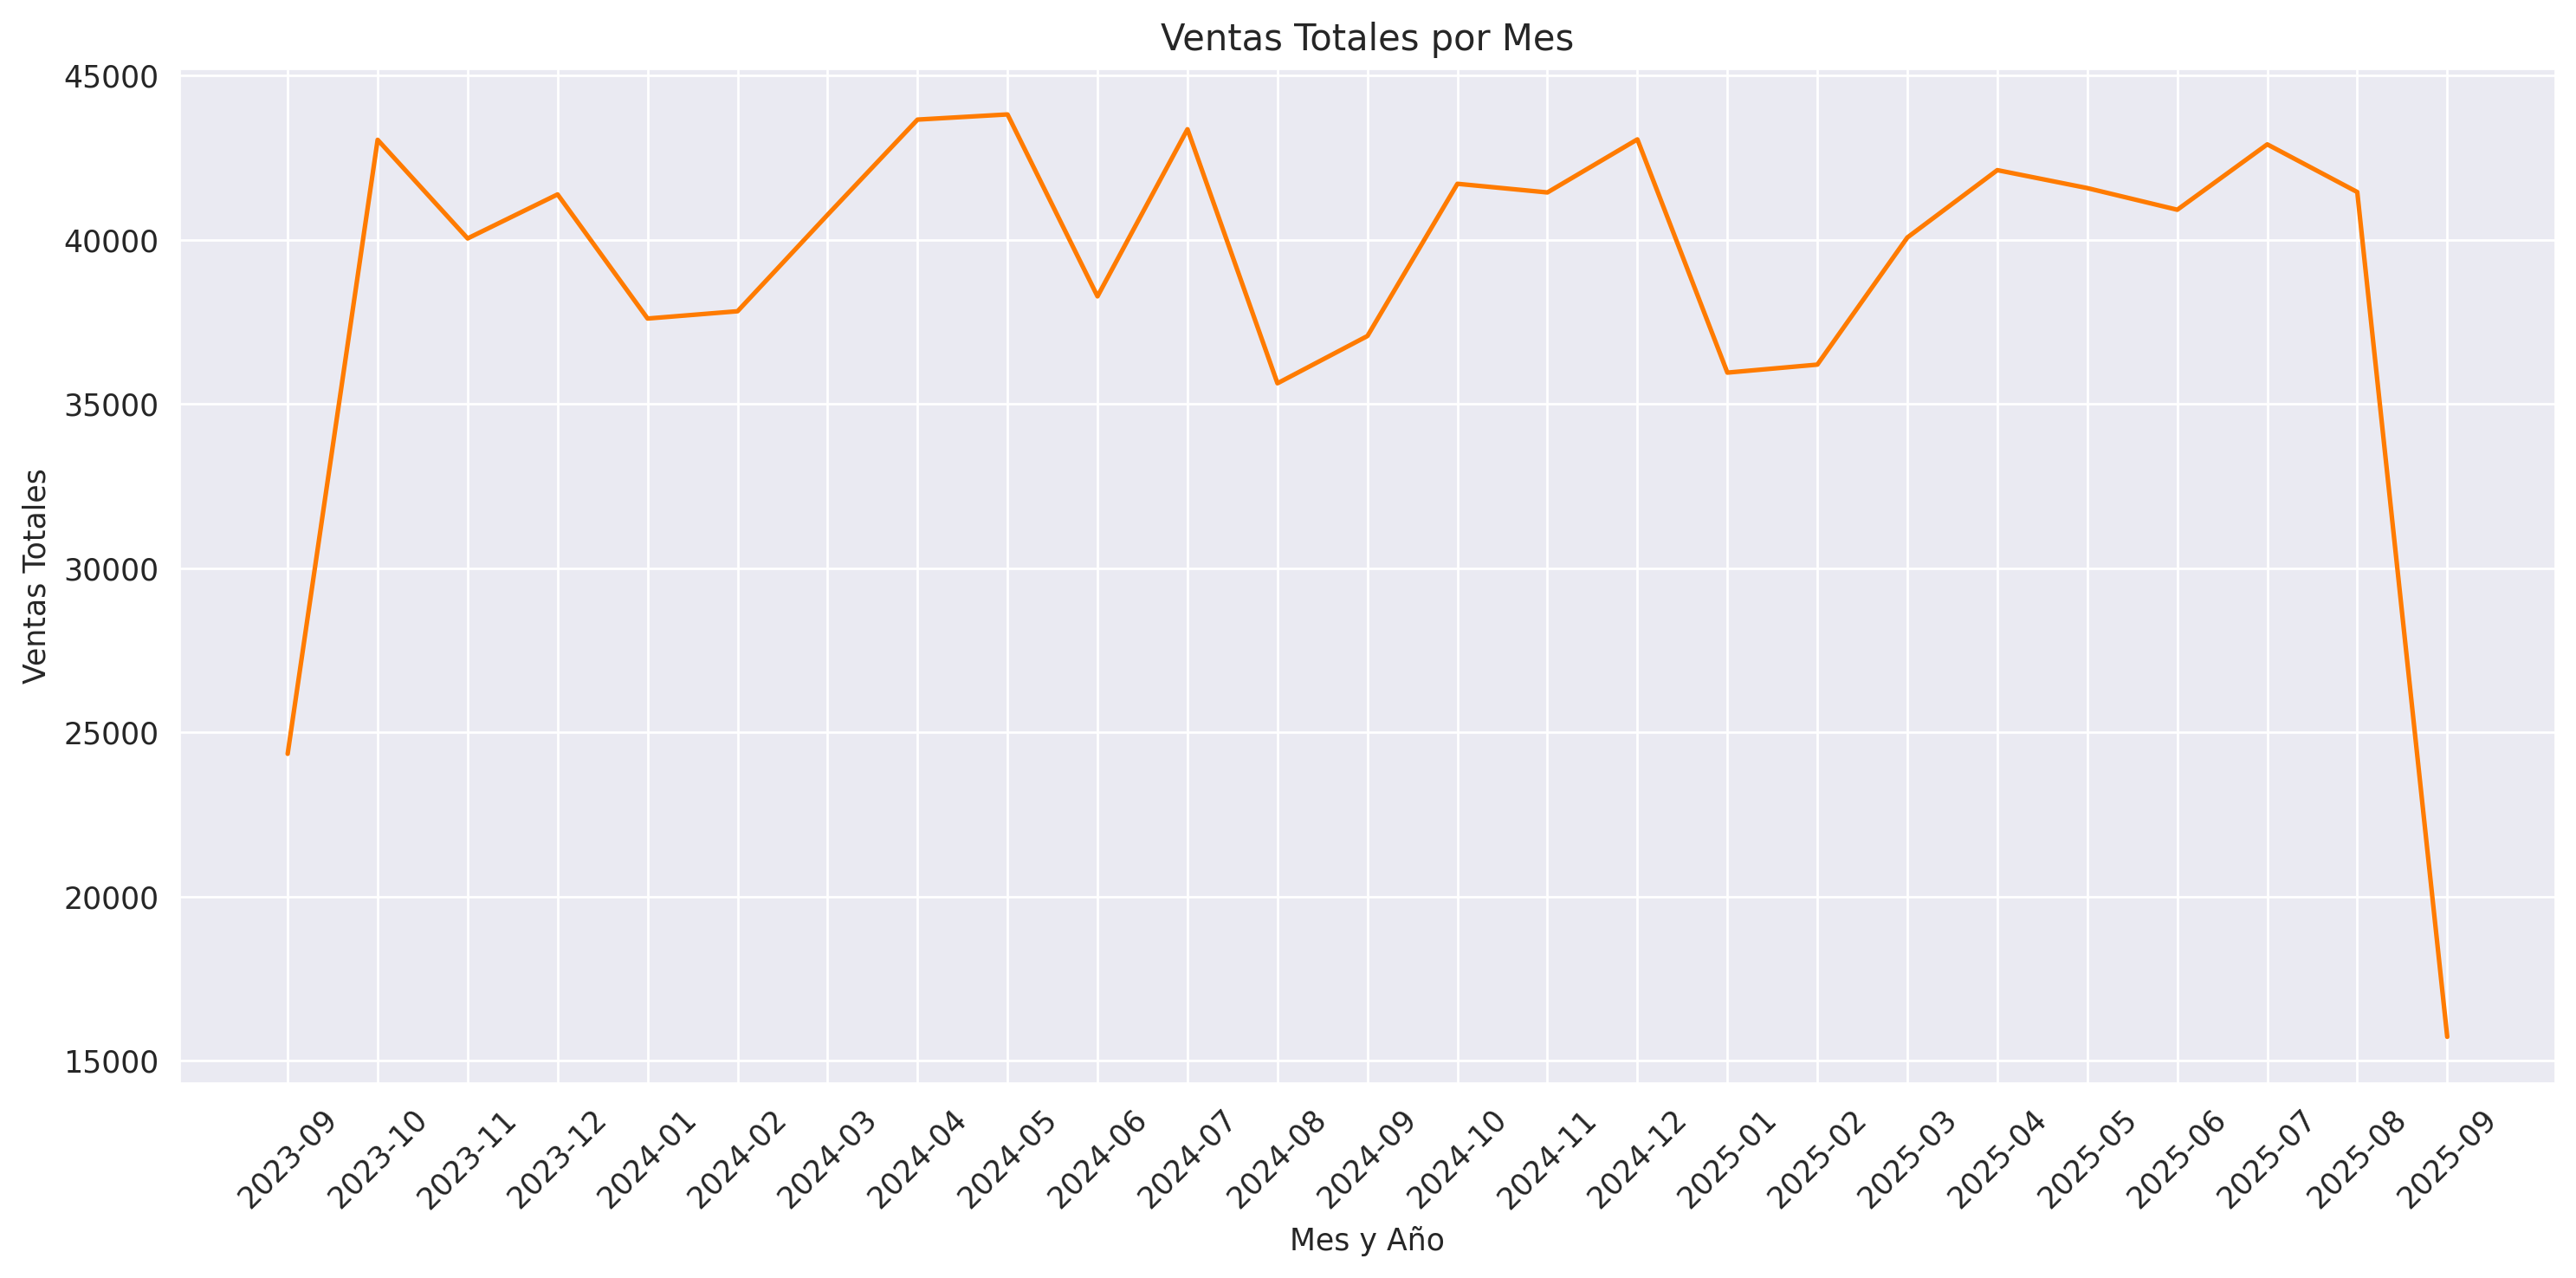

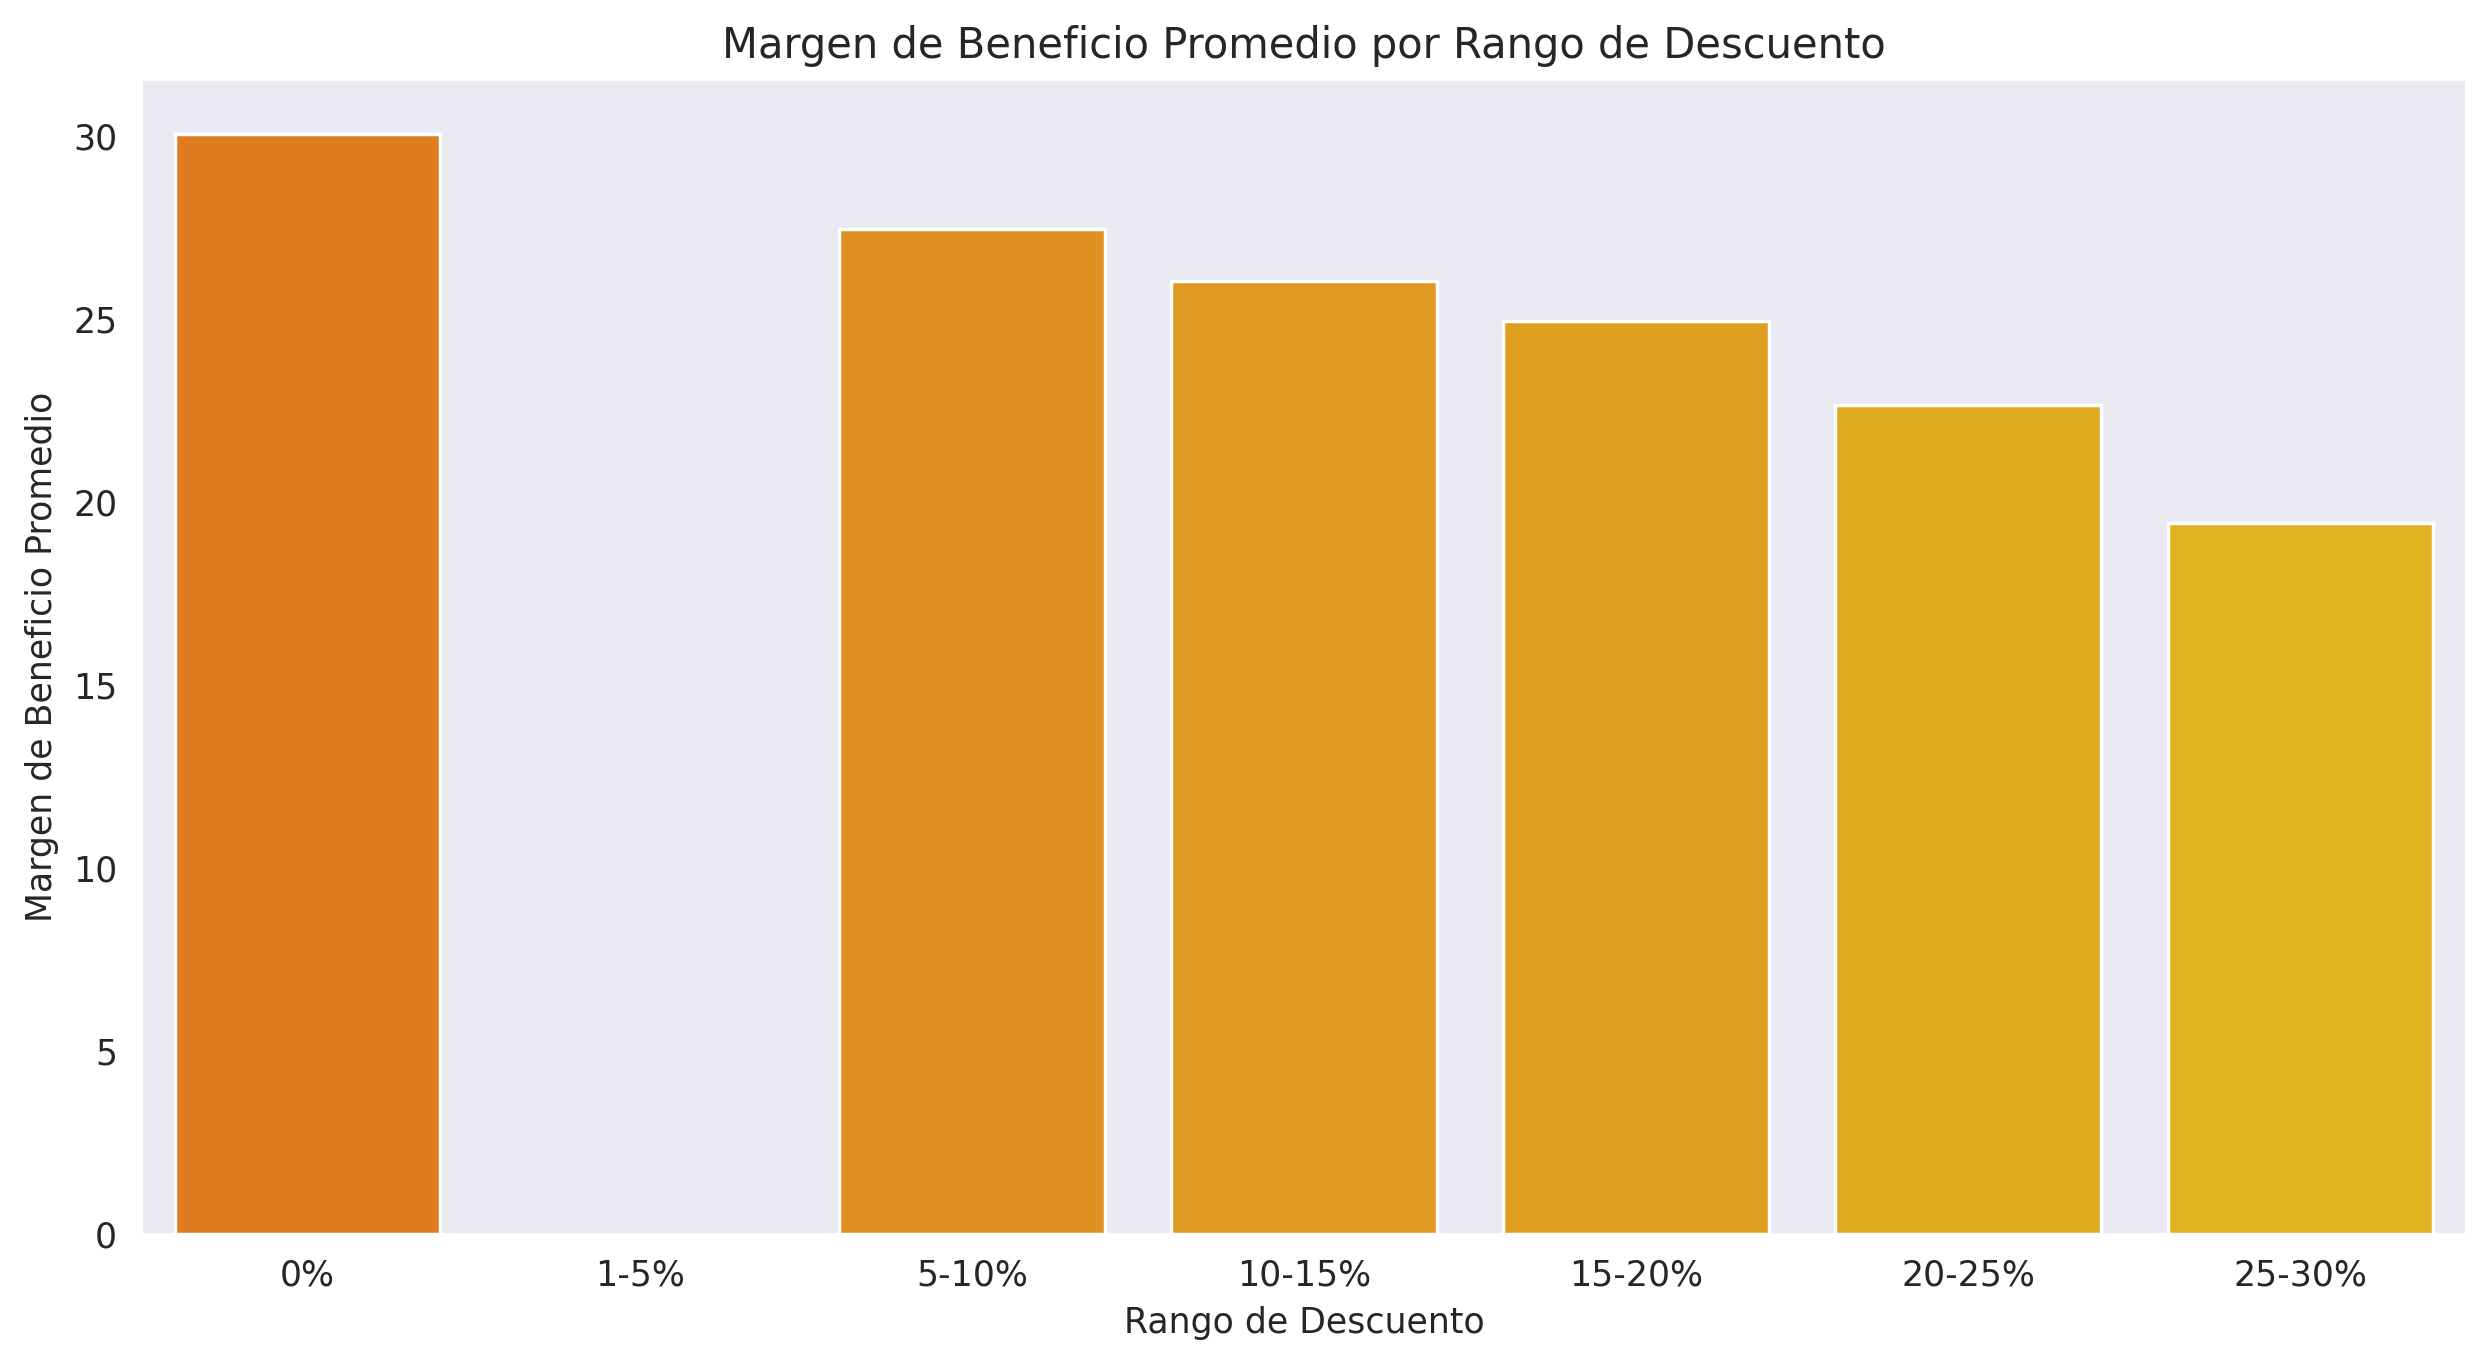

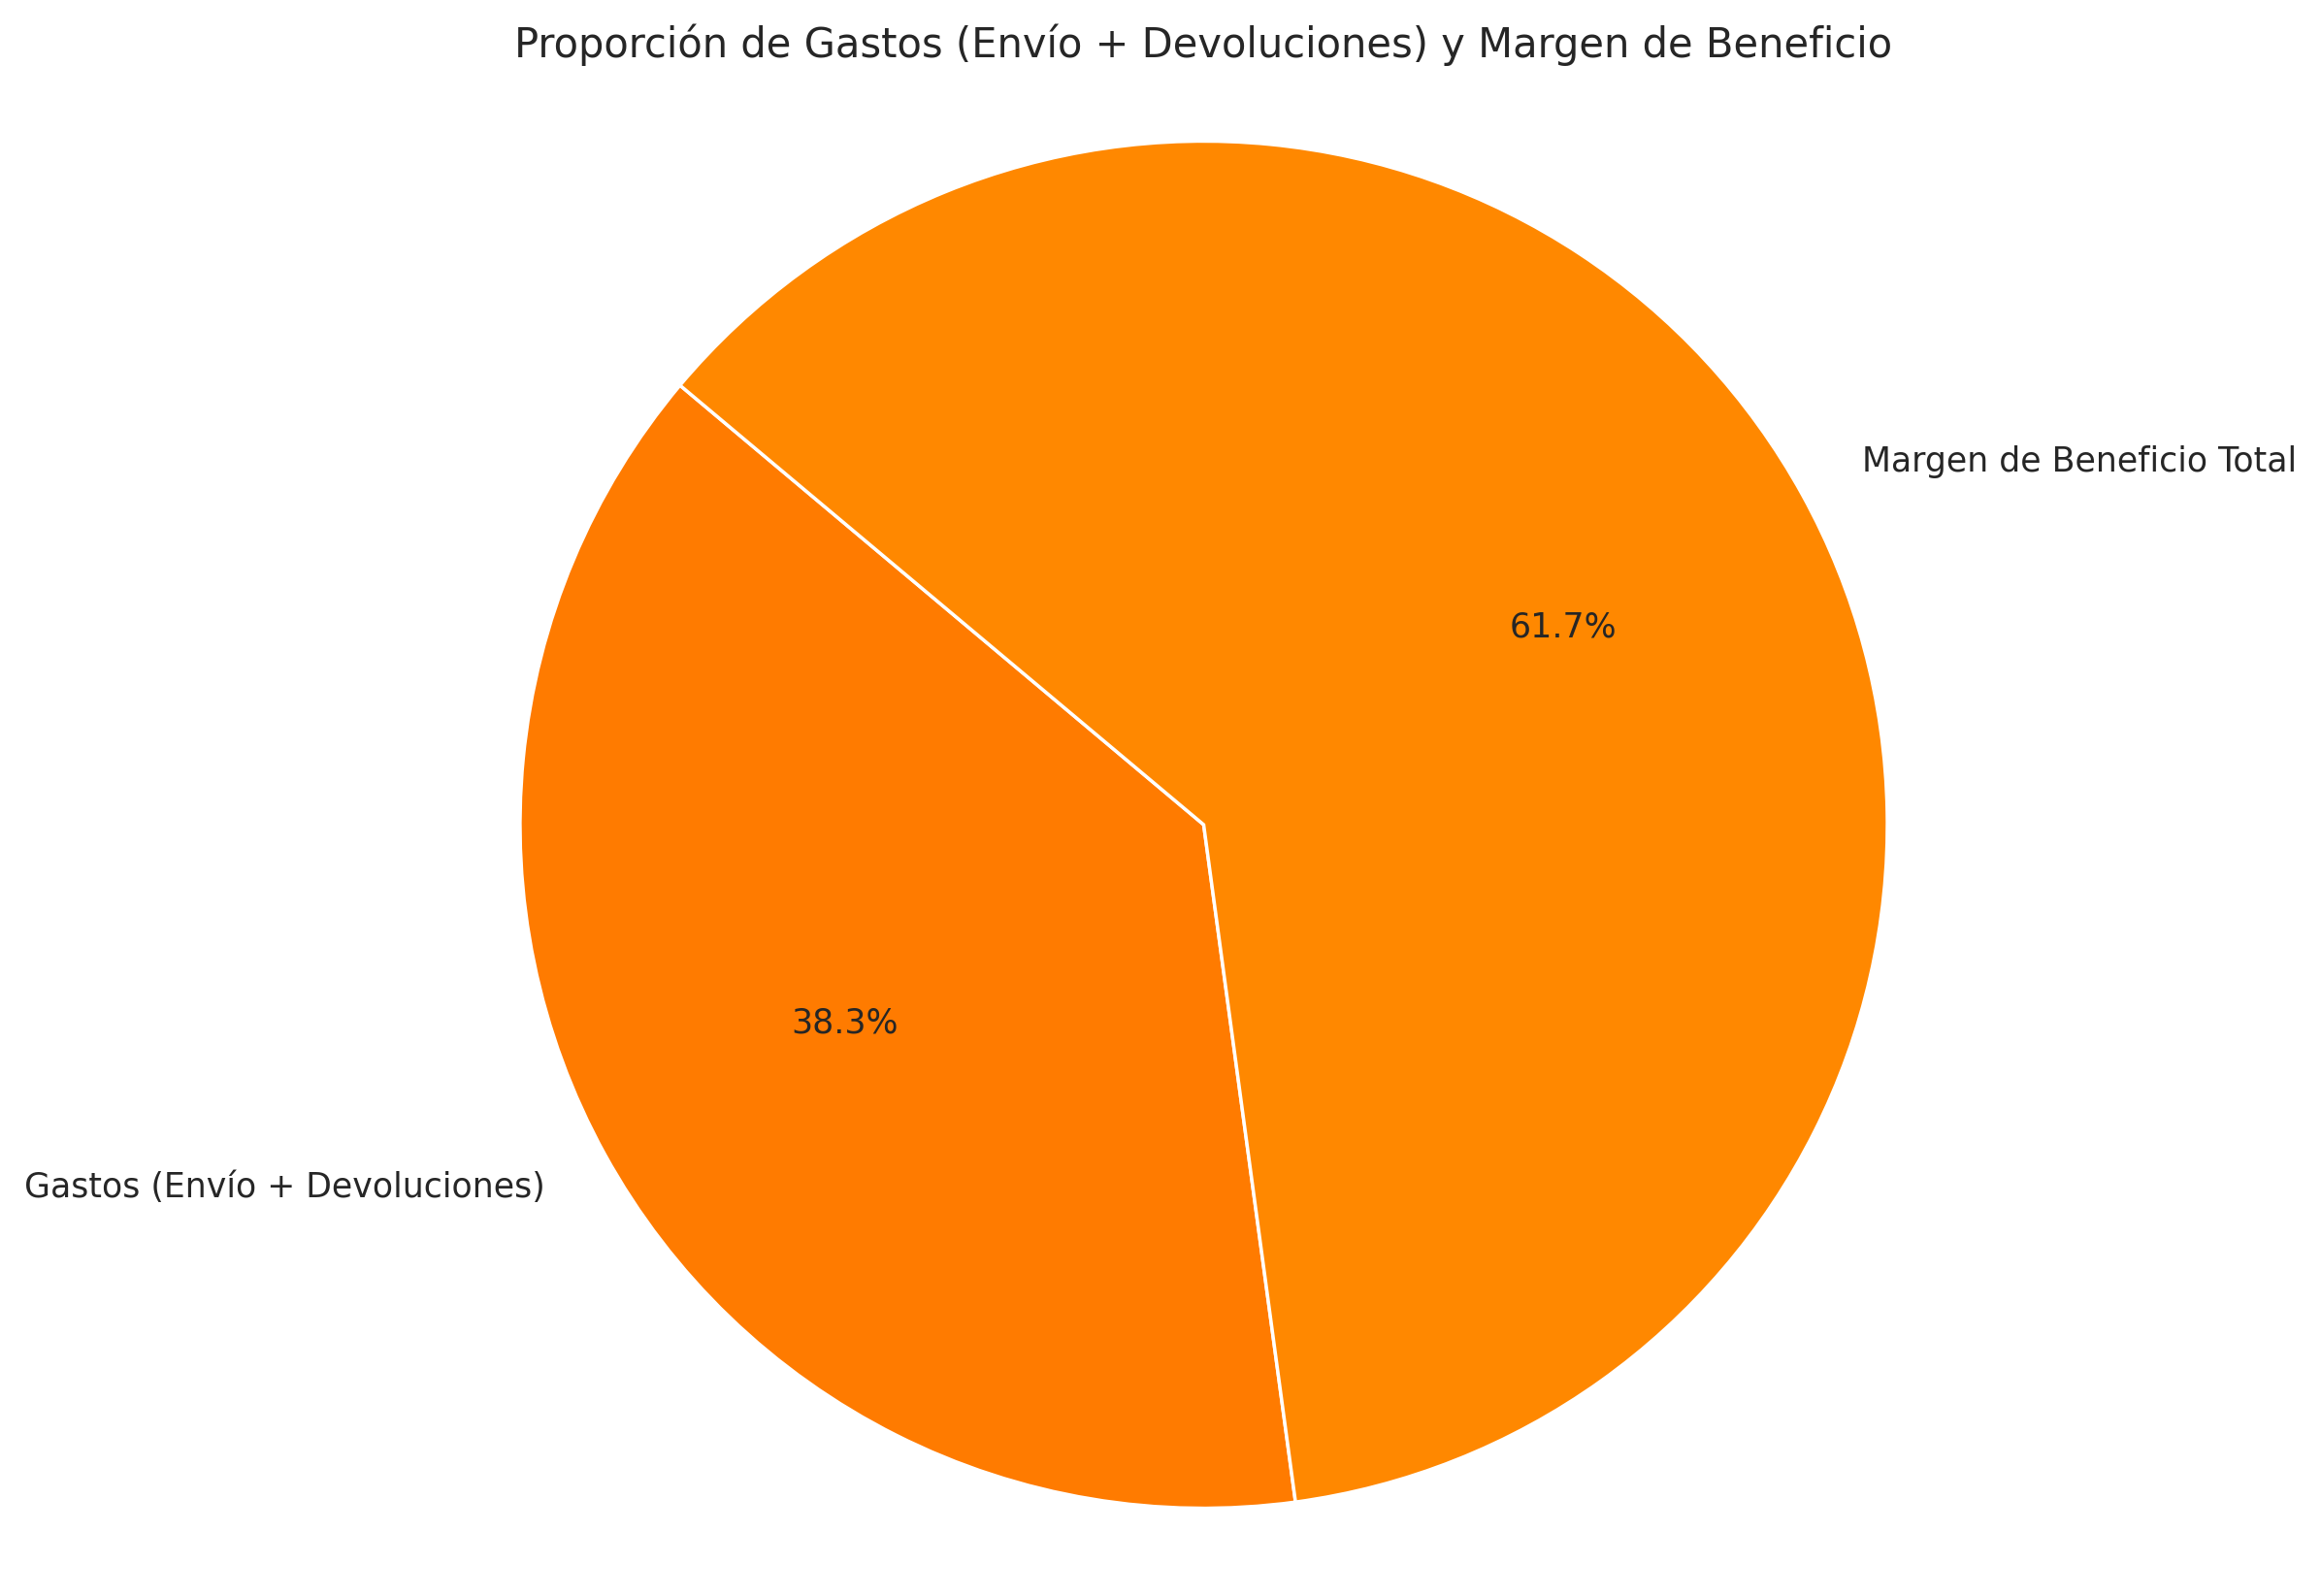

In [ ]:
# Ventas totales
print("\nVenta totales:")
print(f"{Ventas_total:.2f}")

# Ticket promedio
print("\nTicket promedio:")
print(f"{Venta_promedio:.2f}")


fig, axes = plt.subplots(1, 2, figsize=(20, 6))
Resumen_categoría_sorted = Resumen_categoría.sort_values(by='margen_promedio_venta', ascending=False)

# Gráfico de cantidad de artículos vendidos y devueltos por categoría en el primer subplot
Resumen_categoría_sorted[['margen_promedio_venta']].plot(kind='bar',stacked=True,ax=axes[0],color=custom_palette_5[4:6])
axes[0].set_title('Margen de ganancias promedio por categoría')
axes[0].set_xlabel('Categoría')
axes[0].set_ylabel('Margen promedio (%)')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='x')


# Ordenar Resumen_region por ventas netas de forma descendente
Resumen_region_sorted = Resumen_region.sort_values(by='margen_promedio_venta', ascending=False)

# Gráfico de ventas totales y devoluciones por región en el segundo subplot
Resumen_region_sorted[['margen_promedio_venta']].plot(kind='bar', stacked=True, ax=axes[1], color=custom_palette_5)
axes[1].set_title('Margen de ganancias promedio por Región')
axes[1].set_xlabel('Región')
axes[1].set_ylabel('Margen promedio (%)')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(axis='x')
axes[1].ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Margen de ganancias por mes
plt.figure(figsize=(12, 6)) # Corregido: figsize como argumento
plt.plot(Datos_Ventas_Temporales.index, Datos_Ventas_Temporales['margen_ganancias'].values, color=custom_palette_5[0]) # Corregido: referenciar columna del DataFrame
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes y Año')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualizar el margen de beneficio promedio por rango de descuento
plt.figure(figsize=(12, 6))
sns.barplot(x='rango_de_descuento', y='profit_margin', data=margen_de_ganancia_por_descuento, palette=custom_palette_5[:7], hue='rango_de_descuento', legend=False)
plt.title('Margen de Beneficio Promedio por Rango de Descuento')
plt.xlabel('Rango de Descuento')
plt.ylabel('Margen de Beneficio Promedio')
plt.grid(axis='y')
plt.show()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(proporciones_financieras, labels=proporciones_financieras.index, autopct='%1.1f%%', startangle=140, colors=custom_palette_5)
plt.title('Proporción de Gastos (Envío + Devoluciones) y Margen de Beneficio')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### **Resumen de Resultados - Área Financiera**

El análisis financiero revela la estructura económica del e-commerce y permite identificar áreas de mejora. Los resultados clave son los siguientes:

*   **Ventas Totales y Ticket Promedio:** Se registró un ingreso total de **\$5,865,293.01**, con un ticket promedio por pedido de **\$170.01**. Estos datos establecen la magnitud de las operaciones comerciales.

*   **Categorías y Regiones Rentables:**
    *   Las categorías de productos muestran diferencias significativas en su margen de ganancia promedio. **Electrónica** (más del 50%), **Hogar** (más del 45%) y **Deportes** (más del 35%) son las más rentables, aportando una mayor contribución al beneficio.
    *   En contraste, los márgenes de ganancia promedio por región son relativamente similares, indicando una estrategia de precios consistente a nivel geográfico.

*   **Comportamiento de Márgenes en el Tiempo:** El margen de ganancias total se ha mantenido relativamente estable, oscilando entre \$35,000 y \$45,000 mensuales. Sin embargo, el gráfico de la serie temporal no muestra patrones estacionales claros, lo que sugiere la necesidad de un análisis temporal más detallado para identificar tendencias y mejorar la comprensión de la dinámica de los márgenes a lo largo del tiempo.

*   **Impacto de los Descuentos:** El análisis confirma que **los descuentos tienen un impacto negativo directo en el margen de beneficio promedio**. A medida que se incrementa el rango de descuento aplicado, el margen de beneficio promedio tiende a disminuir. Esto subraya la importancia de gestionar estratégicamente las promociones para proteger la rentabilidad.

*   **Proporción de Gastos vs. Margen:** La comparación entre los gastos operativos (costos de envío y devoluciones) y el margen de beneficio total muestra que el margen es considerablemente mayor que estos gastos. Esto es un indicador positivo, aunque es importante recordar que el análisis completo de rentabilidad debería incluir también otros costos operativos de la cadena de suministro.

En resumen, el área financiera muestra un volumen de ventas saludable y categorías de alta rentabilidad. La gestión de descuentos es crucial para mantener los márgenes, y se recomienda un análisis más profundo de las tendencias temporales y la inclusión de otros costos para obtener una imagen completa de la rentabilidad neta.

## **Área Logística - Entregas y Devoluciones**

En esta parte se analiza el desempeño operativo del e-commerce.  
Se revisan los tiempos promedio de entrega, los costos de envío y las tasas de devolución para identificar ineficiencias logísticas.  
La información permitirá determinar si existen regiones con retrasos sistemáticos, altos costos o correlación entre el tiempo de entrega y la devolución del pedido.

**Objetivo descriptivo:** evaluar la eficiencia de la cadena logística y su impacto en la rentabilidad y satisfacción del cliente.

1.   ¿Cuál es el tiempo promedio de entrega por región?
3.   ¿Qué relación existe relación entre el tiempo de entrega y las devoluciones?
4.   ¿Cuál es el impacto del costo de envío en los márgenes?
5.   ¿Qué regiones concentran más devoluciones y costos de envío?
6.   ¿Qué factores predicen un pedido devuelto?


## **Cálculos Específicos del Análisis**

Esta sección contiene los cálculos detallados y la preparación de datos específica para cada una de las áreas de análisis presentadas posteriormente. Estos cálculos se basan en los DataFrames generados a partir del procesamiento inicial de los datos.

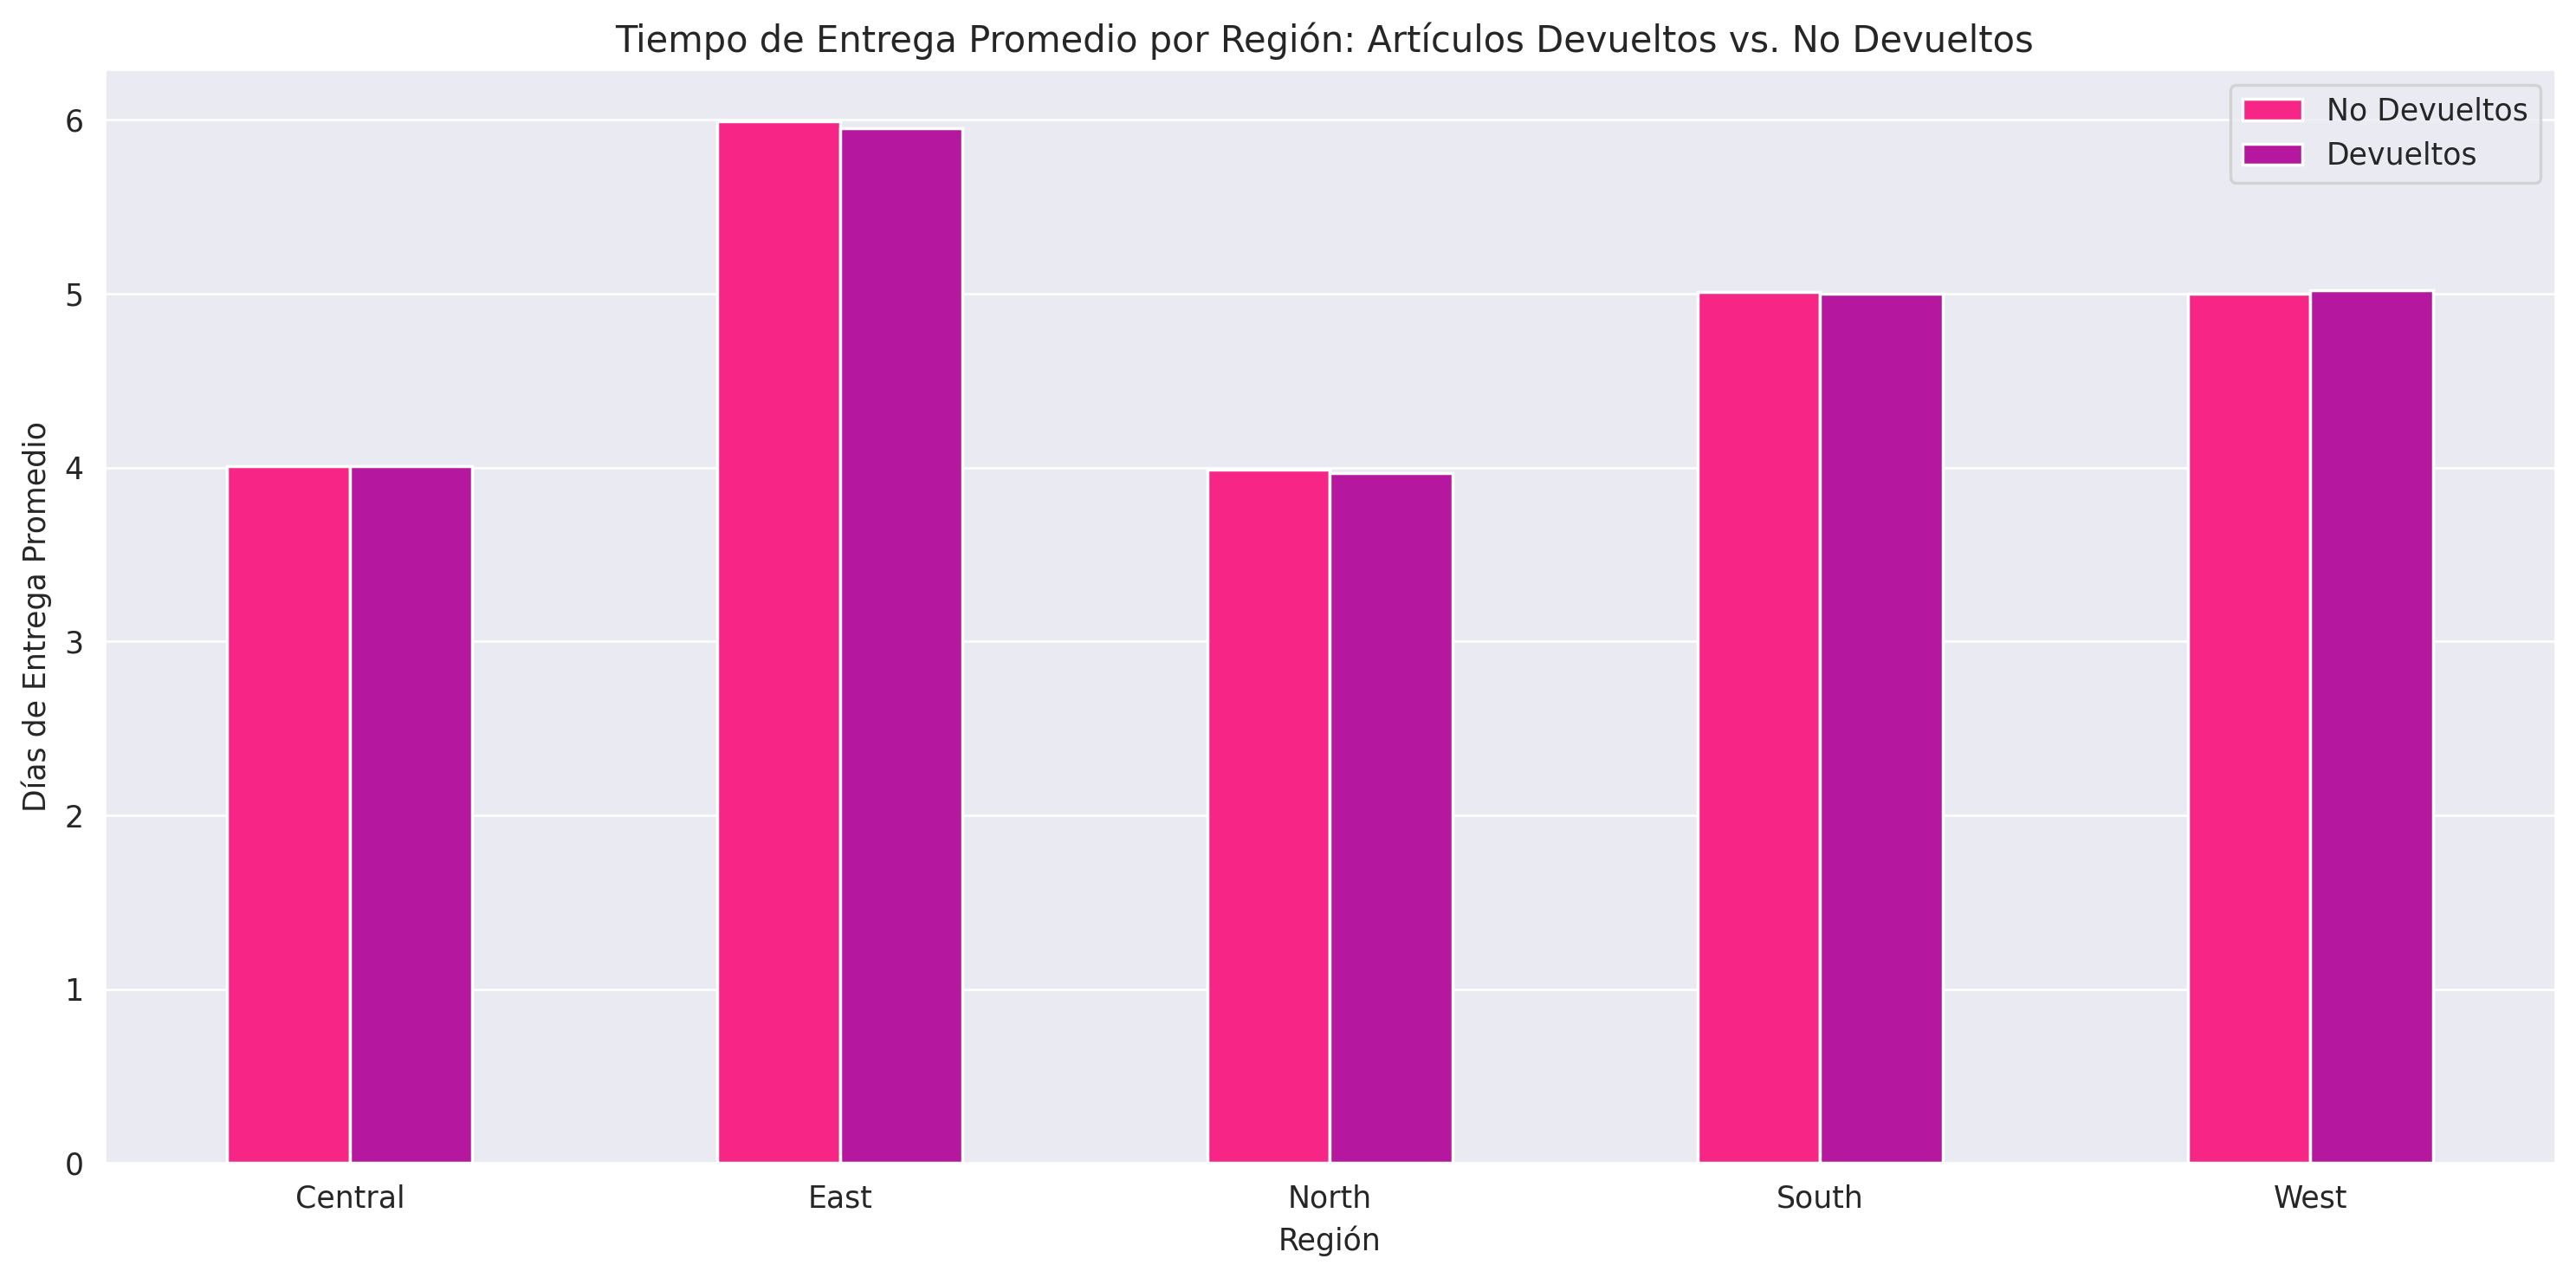

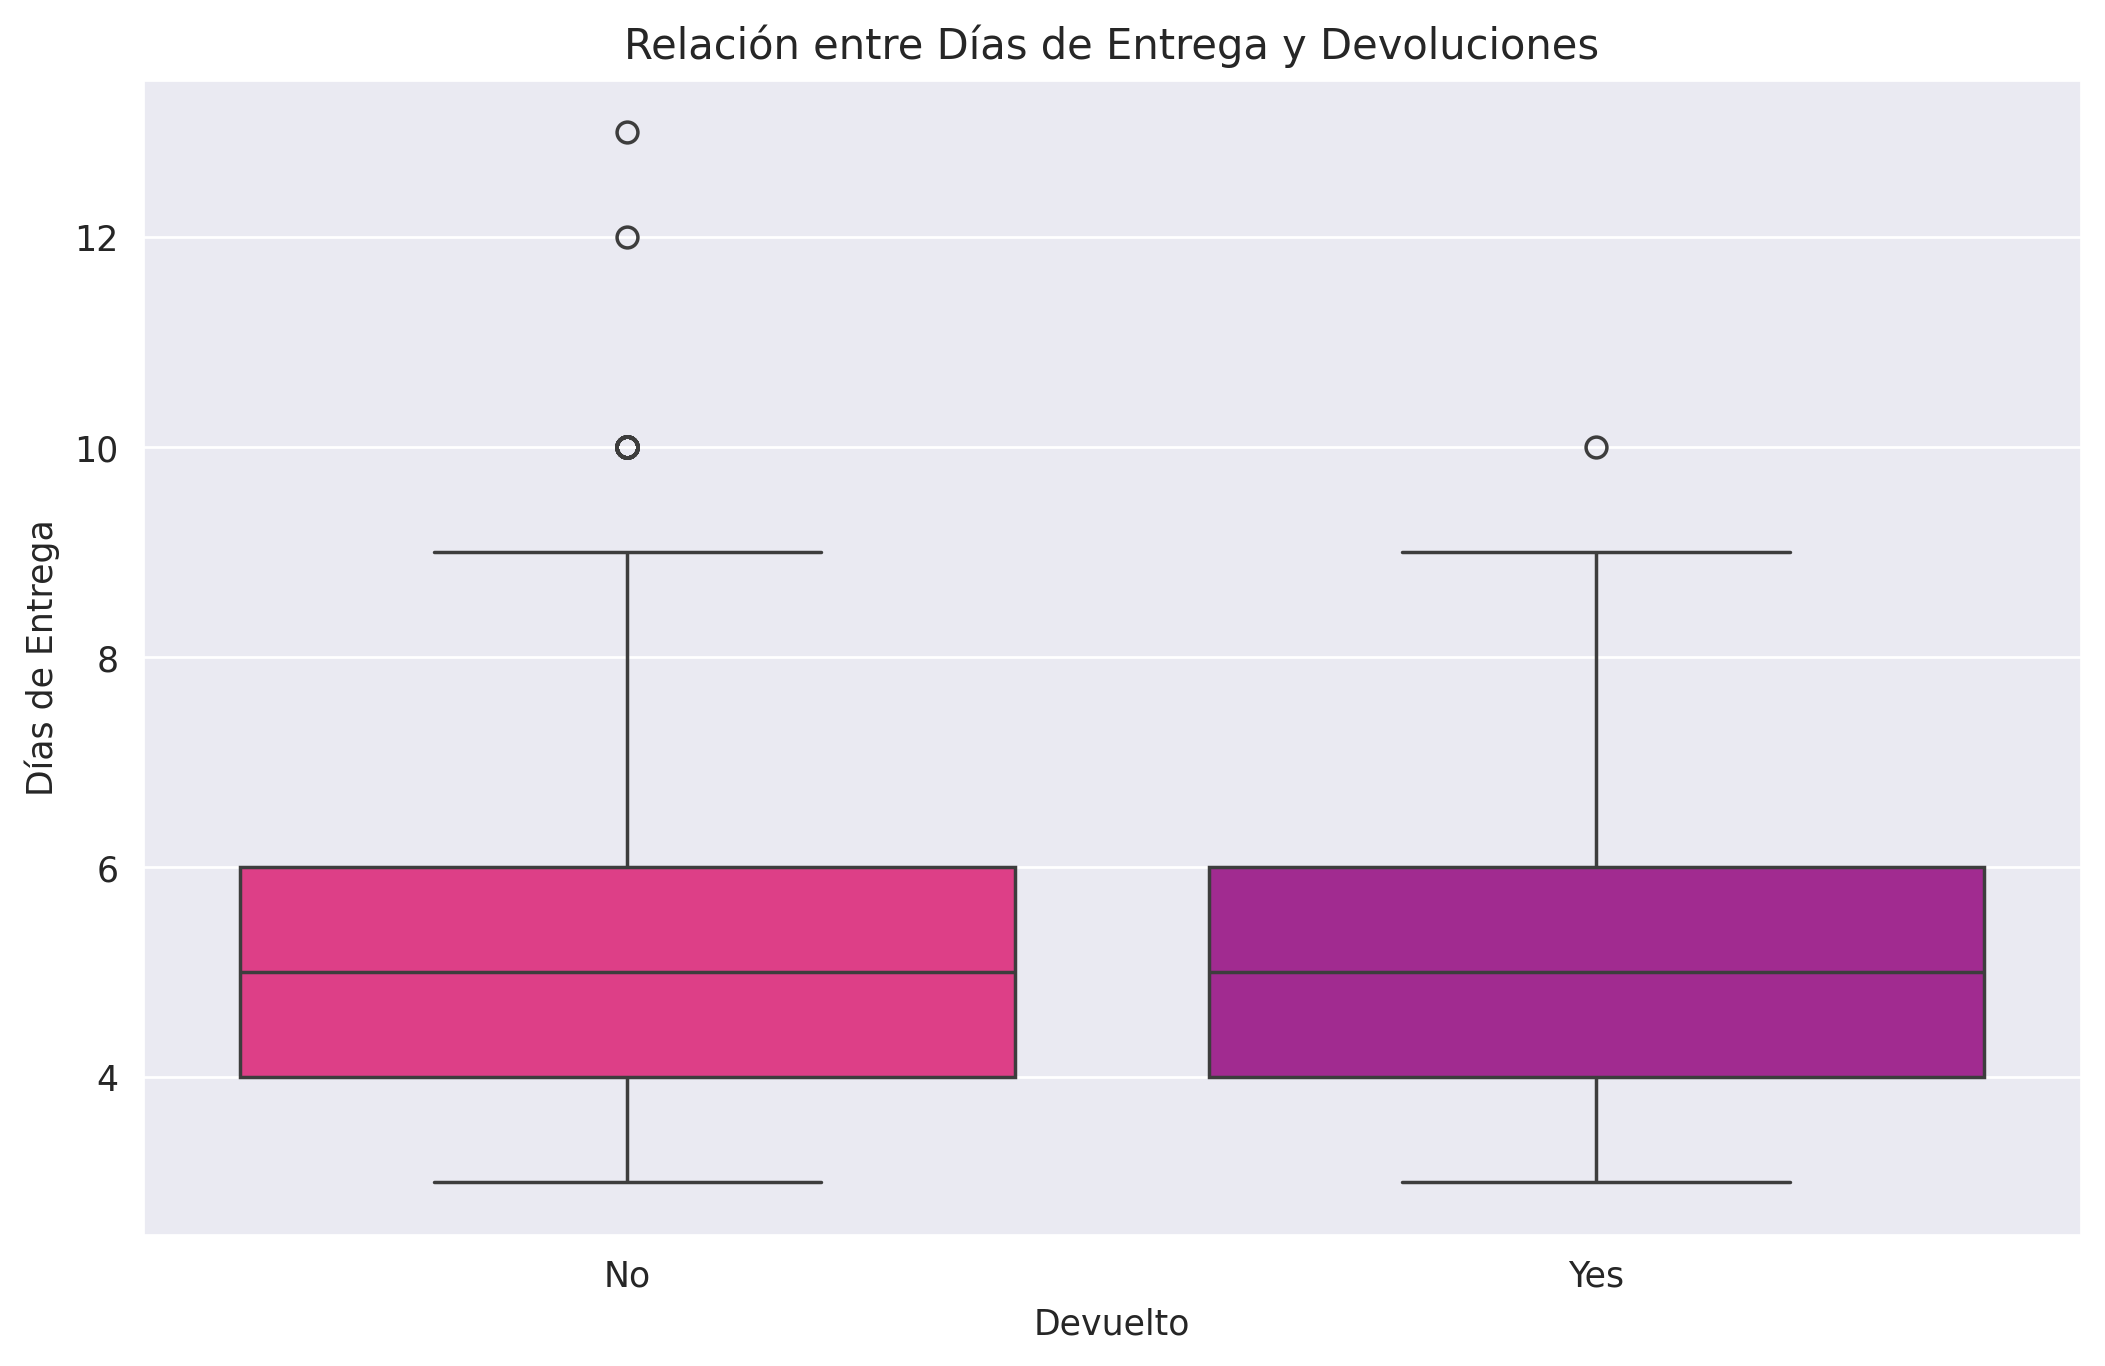

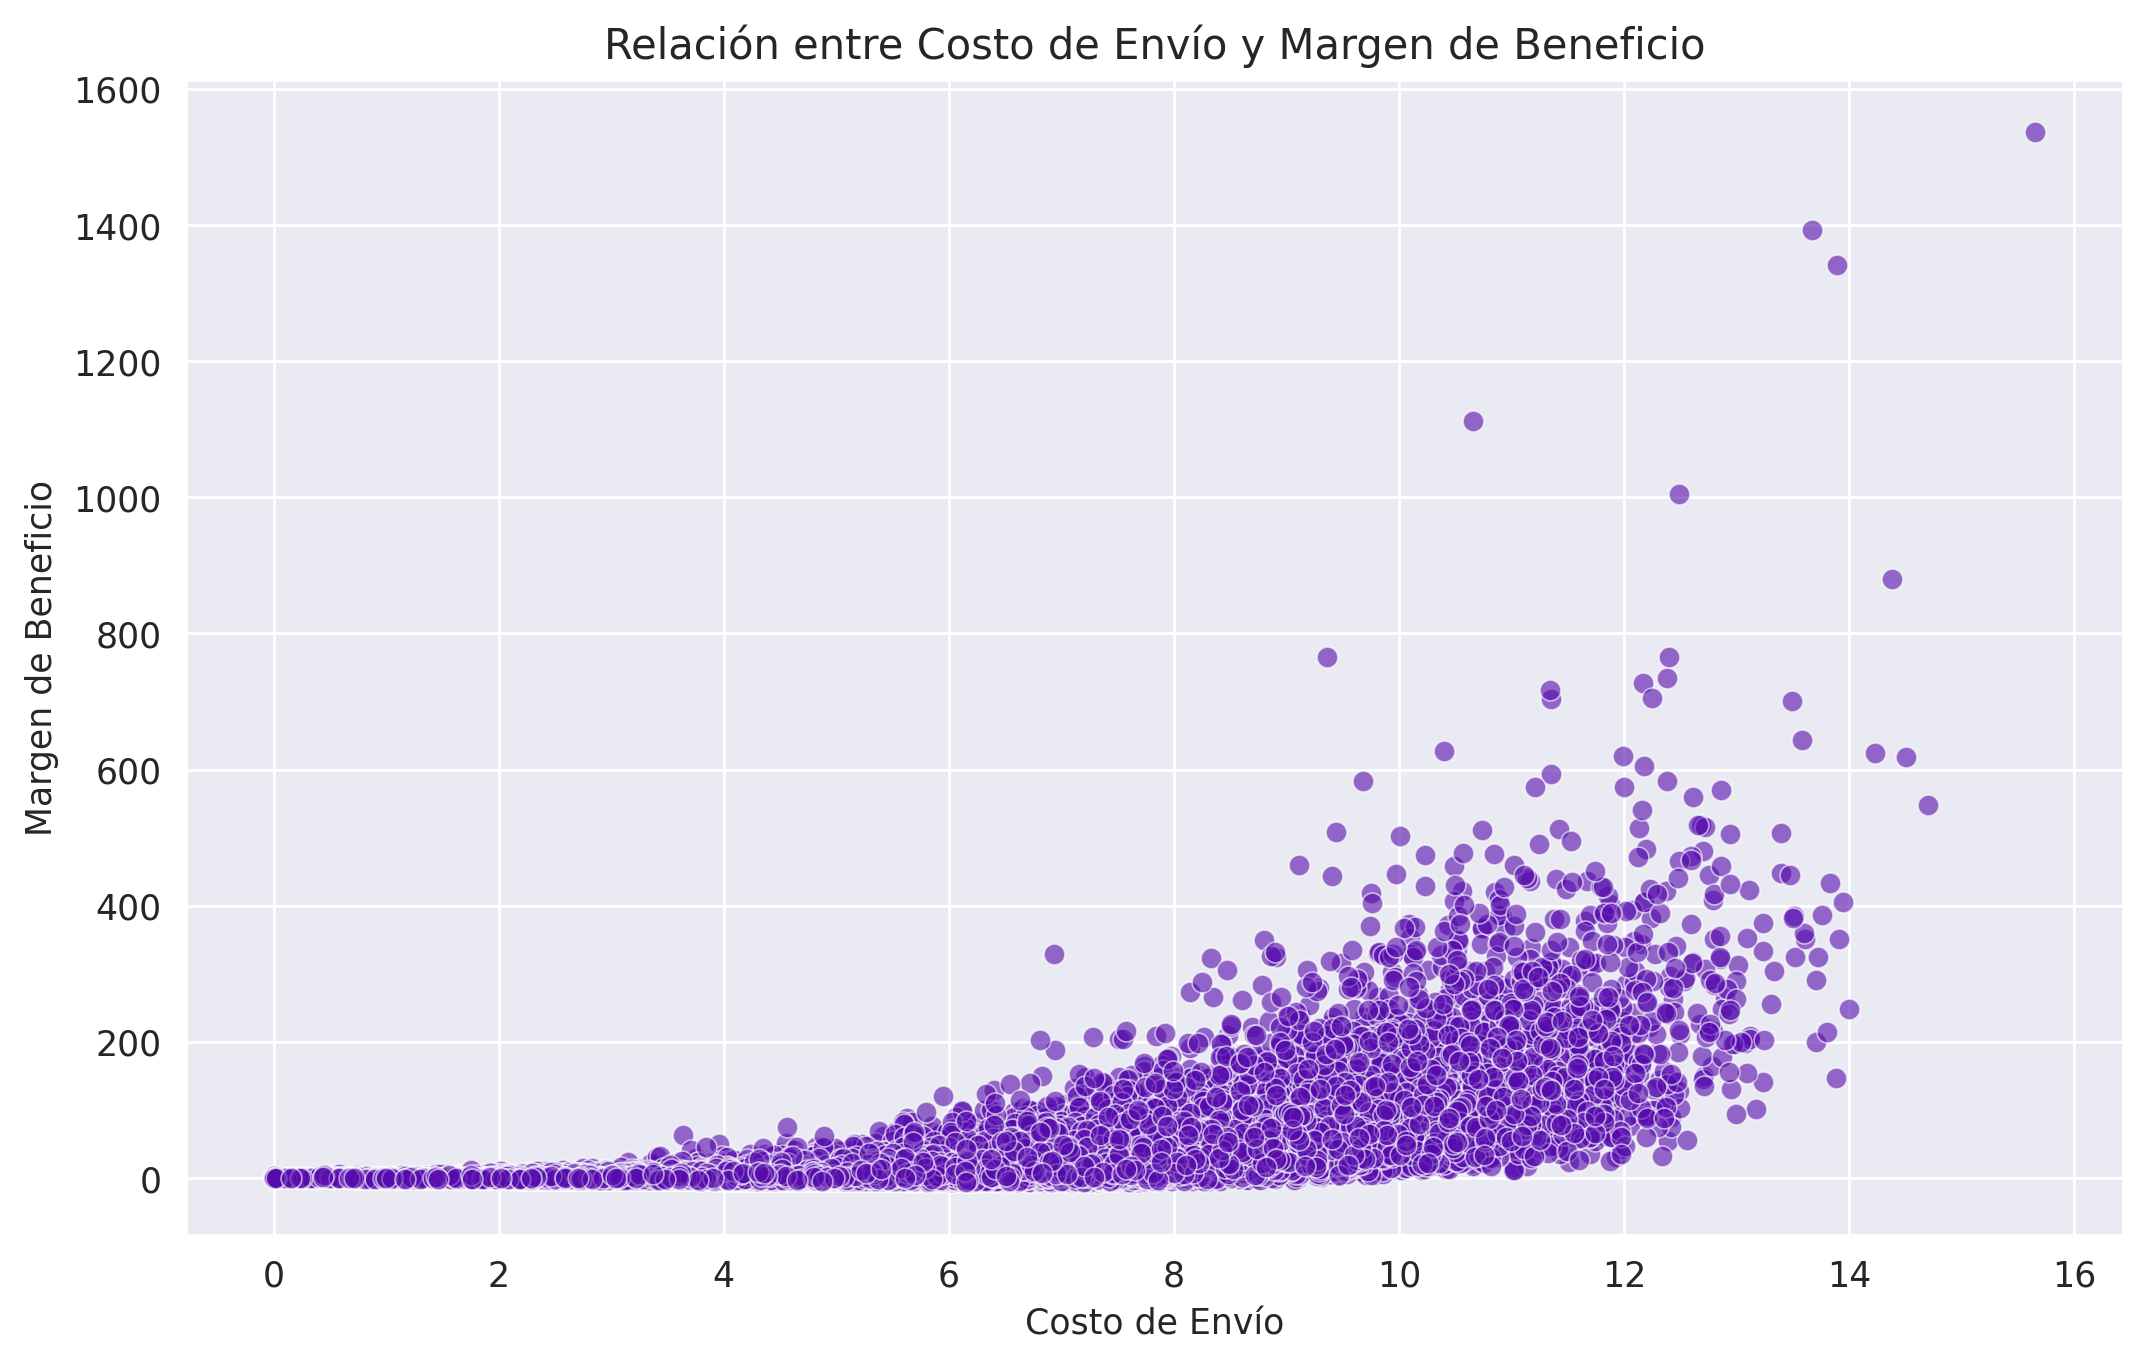

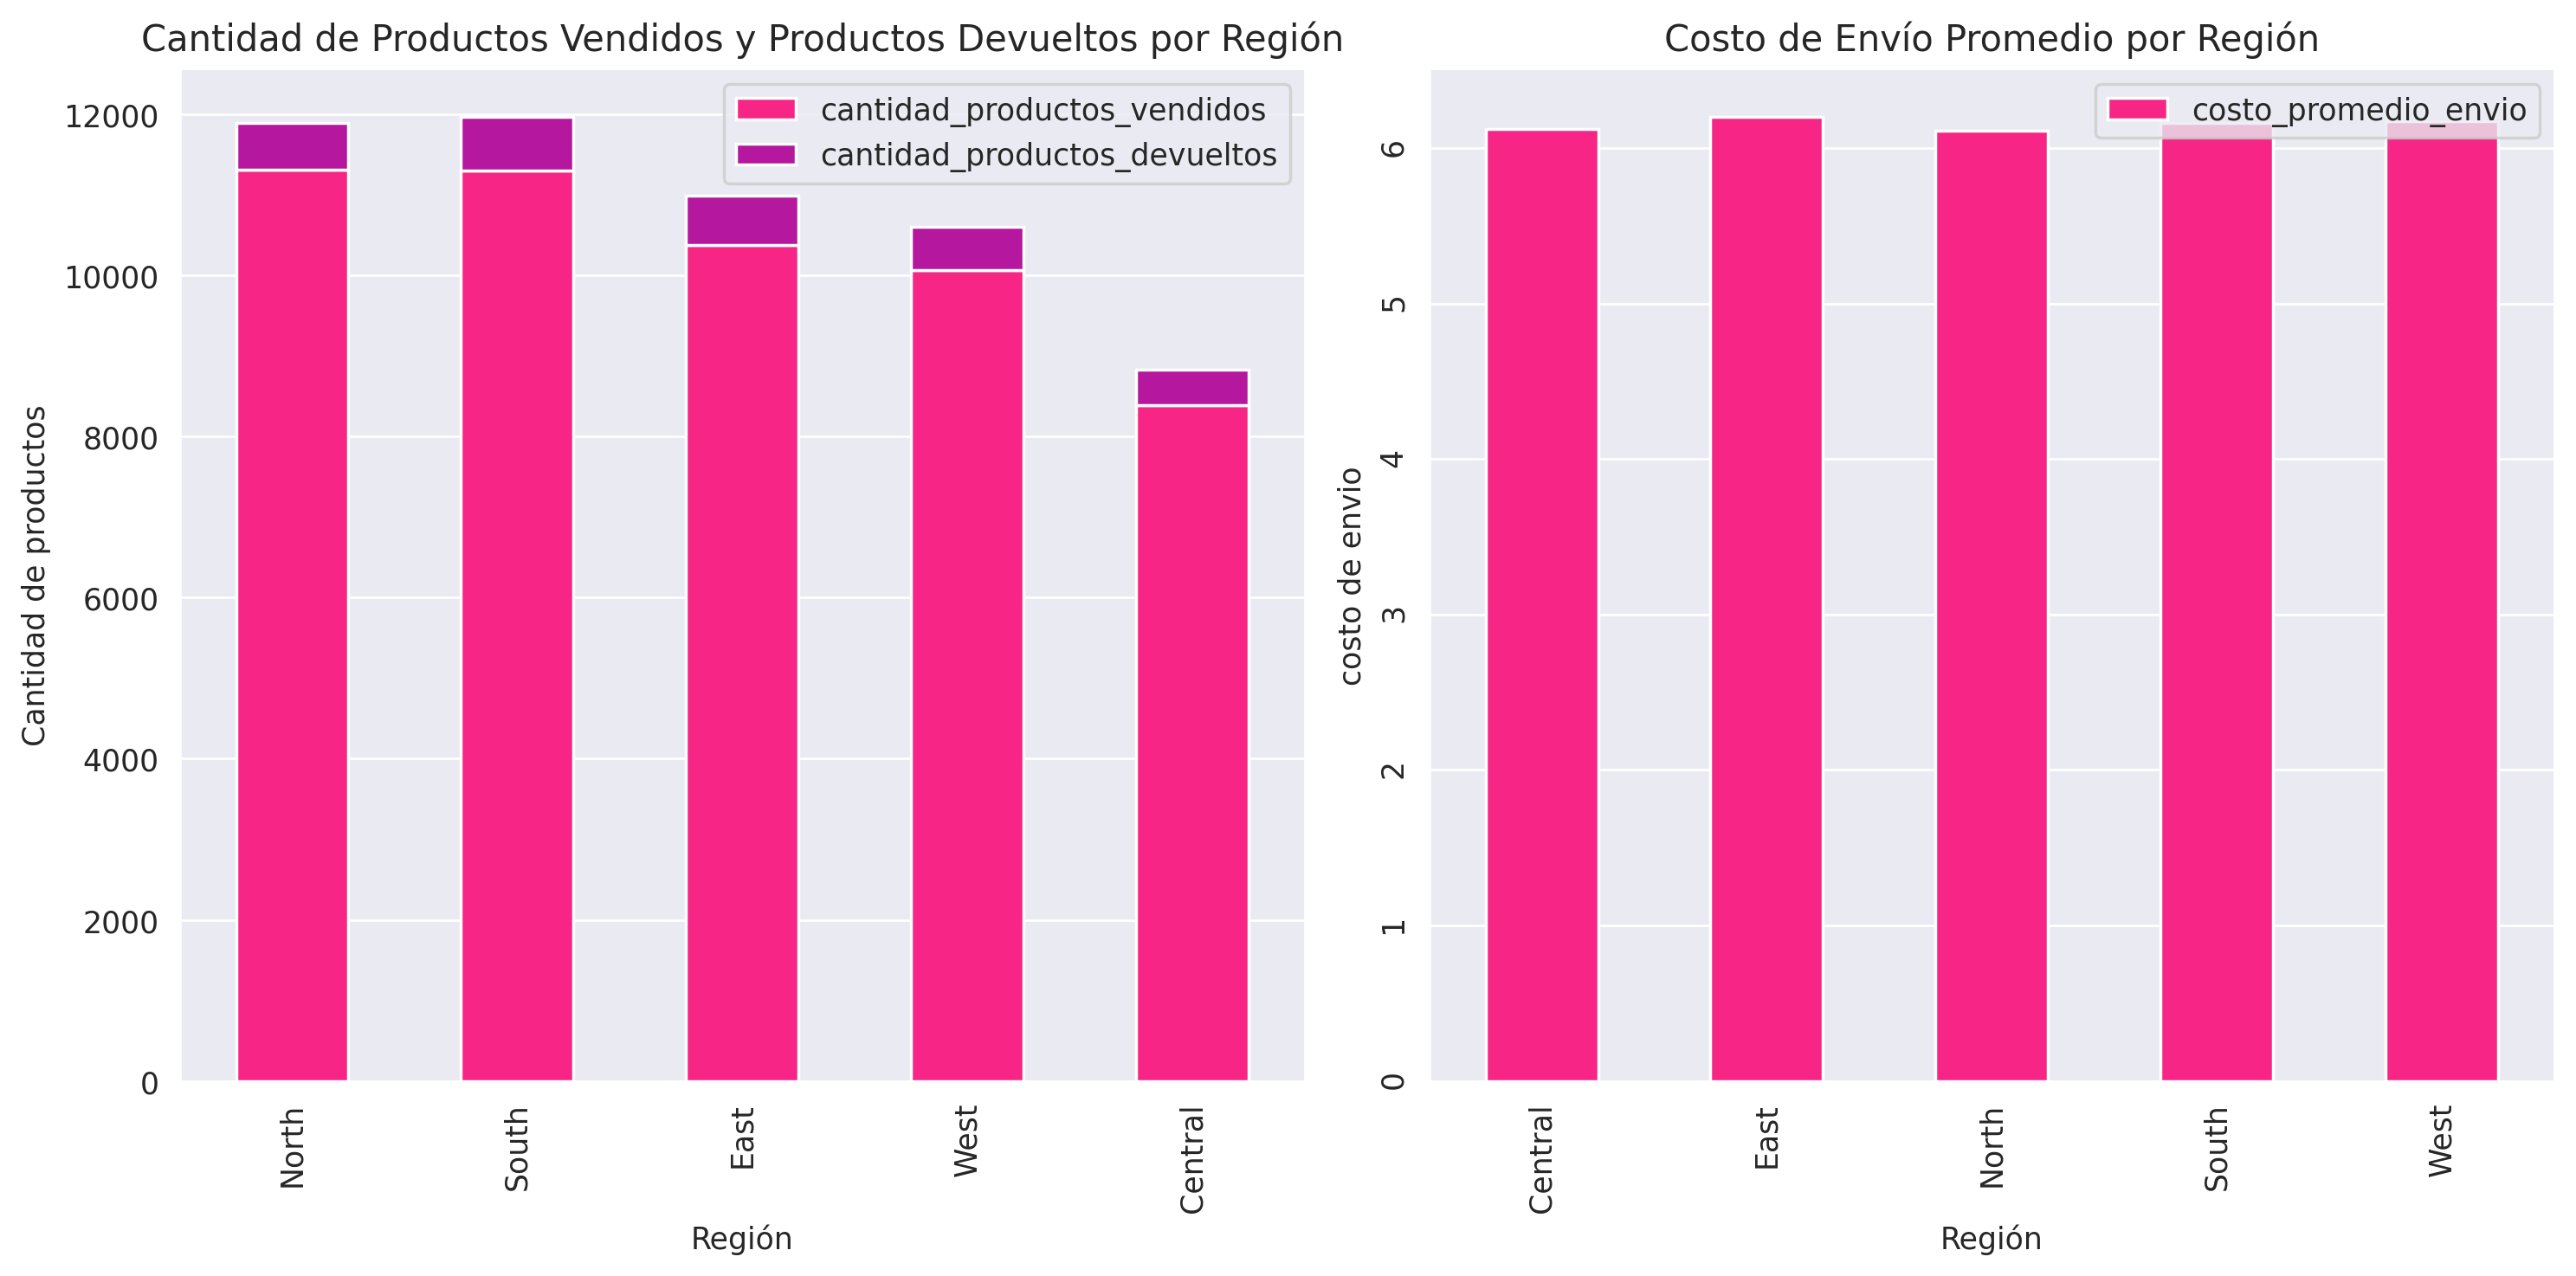

In [ ]:
# Relación entre el tiempo de entrega y devoluciones
Resumen_region[['dias_entrega_promedio_articulos_no_devueltos','dias_entrega_promedio_articulos_devueltos']].plot(kind='bar',figsize=(12,6),color=[custom_palette_6[0], custom_palette_6[1]])
plt.title('Tiempo de Entrega Promedio por Región: Artículos Devueltos vs. No Devueltos ')
plt.xlabel('Región')
plt.ylabel('Días de Entrega Promedio')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.legend(['No Devueltos','Devueltos'])
plt.tight_layout()
plt.show()


# Visualize the relationship between delivery time and returns
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='returned', y='delivery_time_days', palette=custom_palette_6[:2], hue='returned', legend=False)
plt.title('Relación entre Días de Entrega y Devoluciones')
plt.xlabel('Devuelto')
plt.ylabel('Días de Entrega')
plt.show()

# Gráfica de dispersión de la relación entre Margen de Ganancia vs Costos de envío
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='shipping_cost', y='profit_margin', alpha=0.6, color=custom_palette_6[3])
plt.title('Relación entre Costo de Envío y Margen de Beneficio')
plt.xlabel('Costo de Envío')
plt.ylabel('Margen de Beneficio')
plt.grid(True)
plt.show()


# Gráfico de cantidad de artículos vendidos y devueltos por región
fig,axes=plt.subplots(1,2,figsize=(20,6))
Resumen_region_sorted = Resumen_region.sort_values(by='cantidad_productos_vendidos', ascending=False)
Resumen_region_sorted[['cantidad_productos_vendidos', 'cantidad_productos_devueltos']].plot(kind='bar', stacked=True, ax=axes[0],figsize=(12, 6),color=[custom_palette_6[0], custom_palette_6[1]])
axes[0].set_title('Cantidad de Productos Vendidos y Productos Devueltos por Región')
axes[0].set_xlabel('Región')
axes[0].set_ylabel('Cantidad de productos')
axes[0].grid(axis='x')
axes[1].tick_params(axis='y',rotation=90)


# Gráfico de ventas totales y devoluciones por región
Resumen_region[['costo_promedio_envio']].plot(kind='bar', stacked=True, ax=axes[1],figsize=(12, 6),color=[custom_palette_6[0]])
axes[1].set_title('Costo de Envío Promedio por Región')
axes[1].set_xlabel('Región')
axes[1].set_ylabel('costo de envio')
axes[1].grid(axis='x')
axes[1].tick_params(axis='y',rotation=90)
plt.tight_layout()
plt.show()


### **Resumen de Resultados - Área Logística**

* **Tiempo Promedio de Entrega:** El análisis de los tiempos de entrega revela variaciones regionales. Las regiones **Norte** y **Centro** presentan un promedio de 4 días, mientras que **Sur** y **Oeste** tienen un promedio ligeramente mayor, de 5 días. La región **Este** registra el tiempo de entrega más extenso, con un promedio de casi 6 días. Esta diferencia podría impactar la satisfacción del cliente en la región Este.

* **Relación Entrega y Devoluciones:** Al comparar los tiempos de entrega de artículos devueltos y no devueltos por región, se observa una similitud notable en los promedios. Esto sugiere que el tiempo de entrega no parece ser un factor determinante en la propensión a la devolución de un artículo. Otros factores, como la calidad del producto o la precisión de la descripción en línea, podrían tener una influencia mayor.

* **Impacto del Costo de Envío:** Se identifica una correlación positiva entre el costo de envío y el margen de beneficio. Este fenómeno podría explicarse por los costos logísticos asociados a productos de mayor valor o volumen (como electrónica y artículos para el hogar), que tienden a tener precios más altos y, consecuentemente, mayores márgenes de beneficio. Es importante analizar si los costos de envío son proporcionales al valor o tipo de producto para optimizar la rentabilidad.

* **Regiones con Mayor Volumen de Ventas, Devoluciones y Costos de Envío:** La región **Sur** destaca tanto en la cantidad de productos vendidos como en el número de devoluciones. Le siguen en volumen de ventas y devoluciones, en orden descendente, las regiones **Norte, Este y Oeste**. La región **Central** presenta el menor volumen de ventas y, por ende, el menor número de devoluciones. Este patrón indica que el volumen de devoluciones está más asociado al volumen total de ventas por región que a factores logísticos intrínsecos de cada zona. Sin embargo, un análisis más profundo por región podría identificar particularidades logísticas (infraestructura, distancia) que afecten los costos o tiempos.

* **Factores de Predicción de Devoluciones:** No se encontraron relaciones directas significativas entre la cantidad de días de entrega, el costo de envío y la cantidad de productos devueltos. Esto sugiere la necesidad de explorar otros factores, posiblemente relacionados con la calidad del producto, la descripción del artículo, o las expectativas del cliente, para comprender mejor los motivos de devolución. Se podría considerar la implementación de encuestas de satisfacción post-entrega para recopilar información adicional sobre los motivos de devolución.


## **Área Comercial - Ventas y Estacionalidad**

Este bloque examina el comportamiento de las ventas en el tiempo y su distribución por categorías y productos.  
Se busca entender la dinámica comercial del negocio: cuáles son los productos más vendidos, cómo varía la demanda según la temporada, y qué combinaciones de productos suelen adquirirse en conjunto.  
El análisis también permite identificar períodos de alta y baja demanda para optimizar estrategias de inventario y marketing.

**Objetivo descriptivo:** caracterizar los patrones de consumo y las tendencias comerciales del e-commerce.

1. ¿Cómo varían las ventas a lo largo del año?  
2. ¿Cuáles son las categorías o productos más vendidos?  
3. ¿Qué proporción del total generan los productos top 10?  
4. ¿Qué períodos muestran estacionalidad alta o baja?  

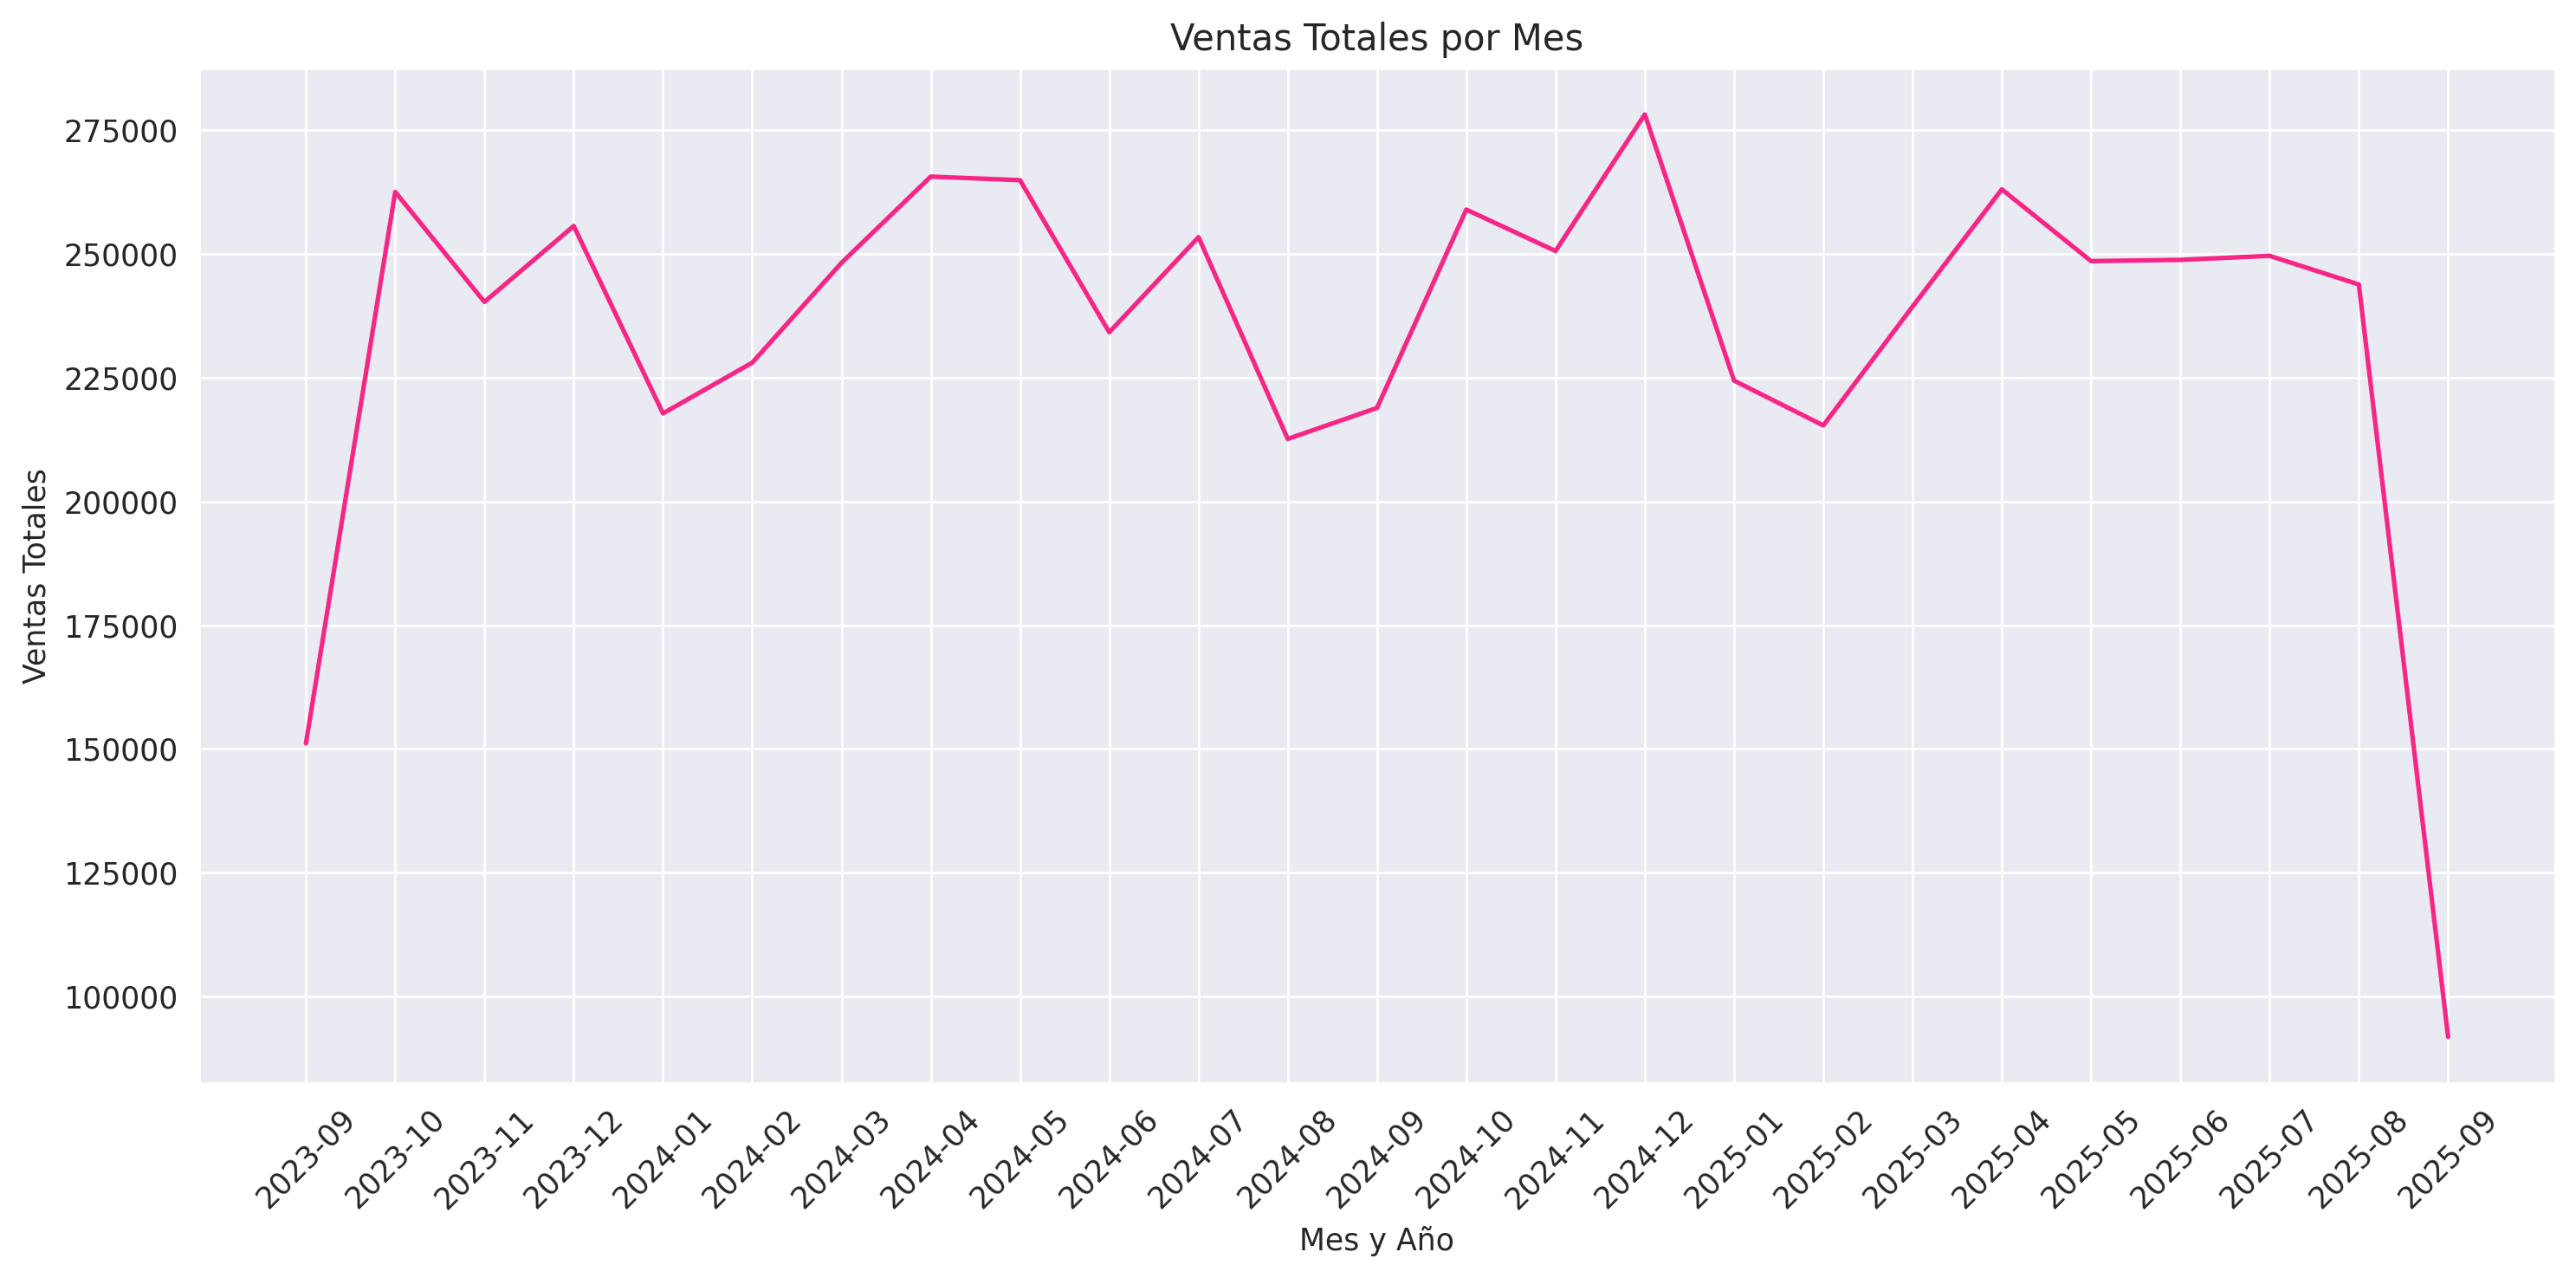

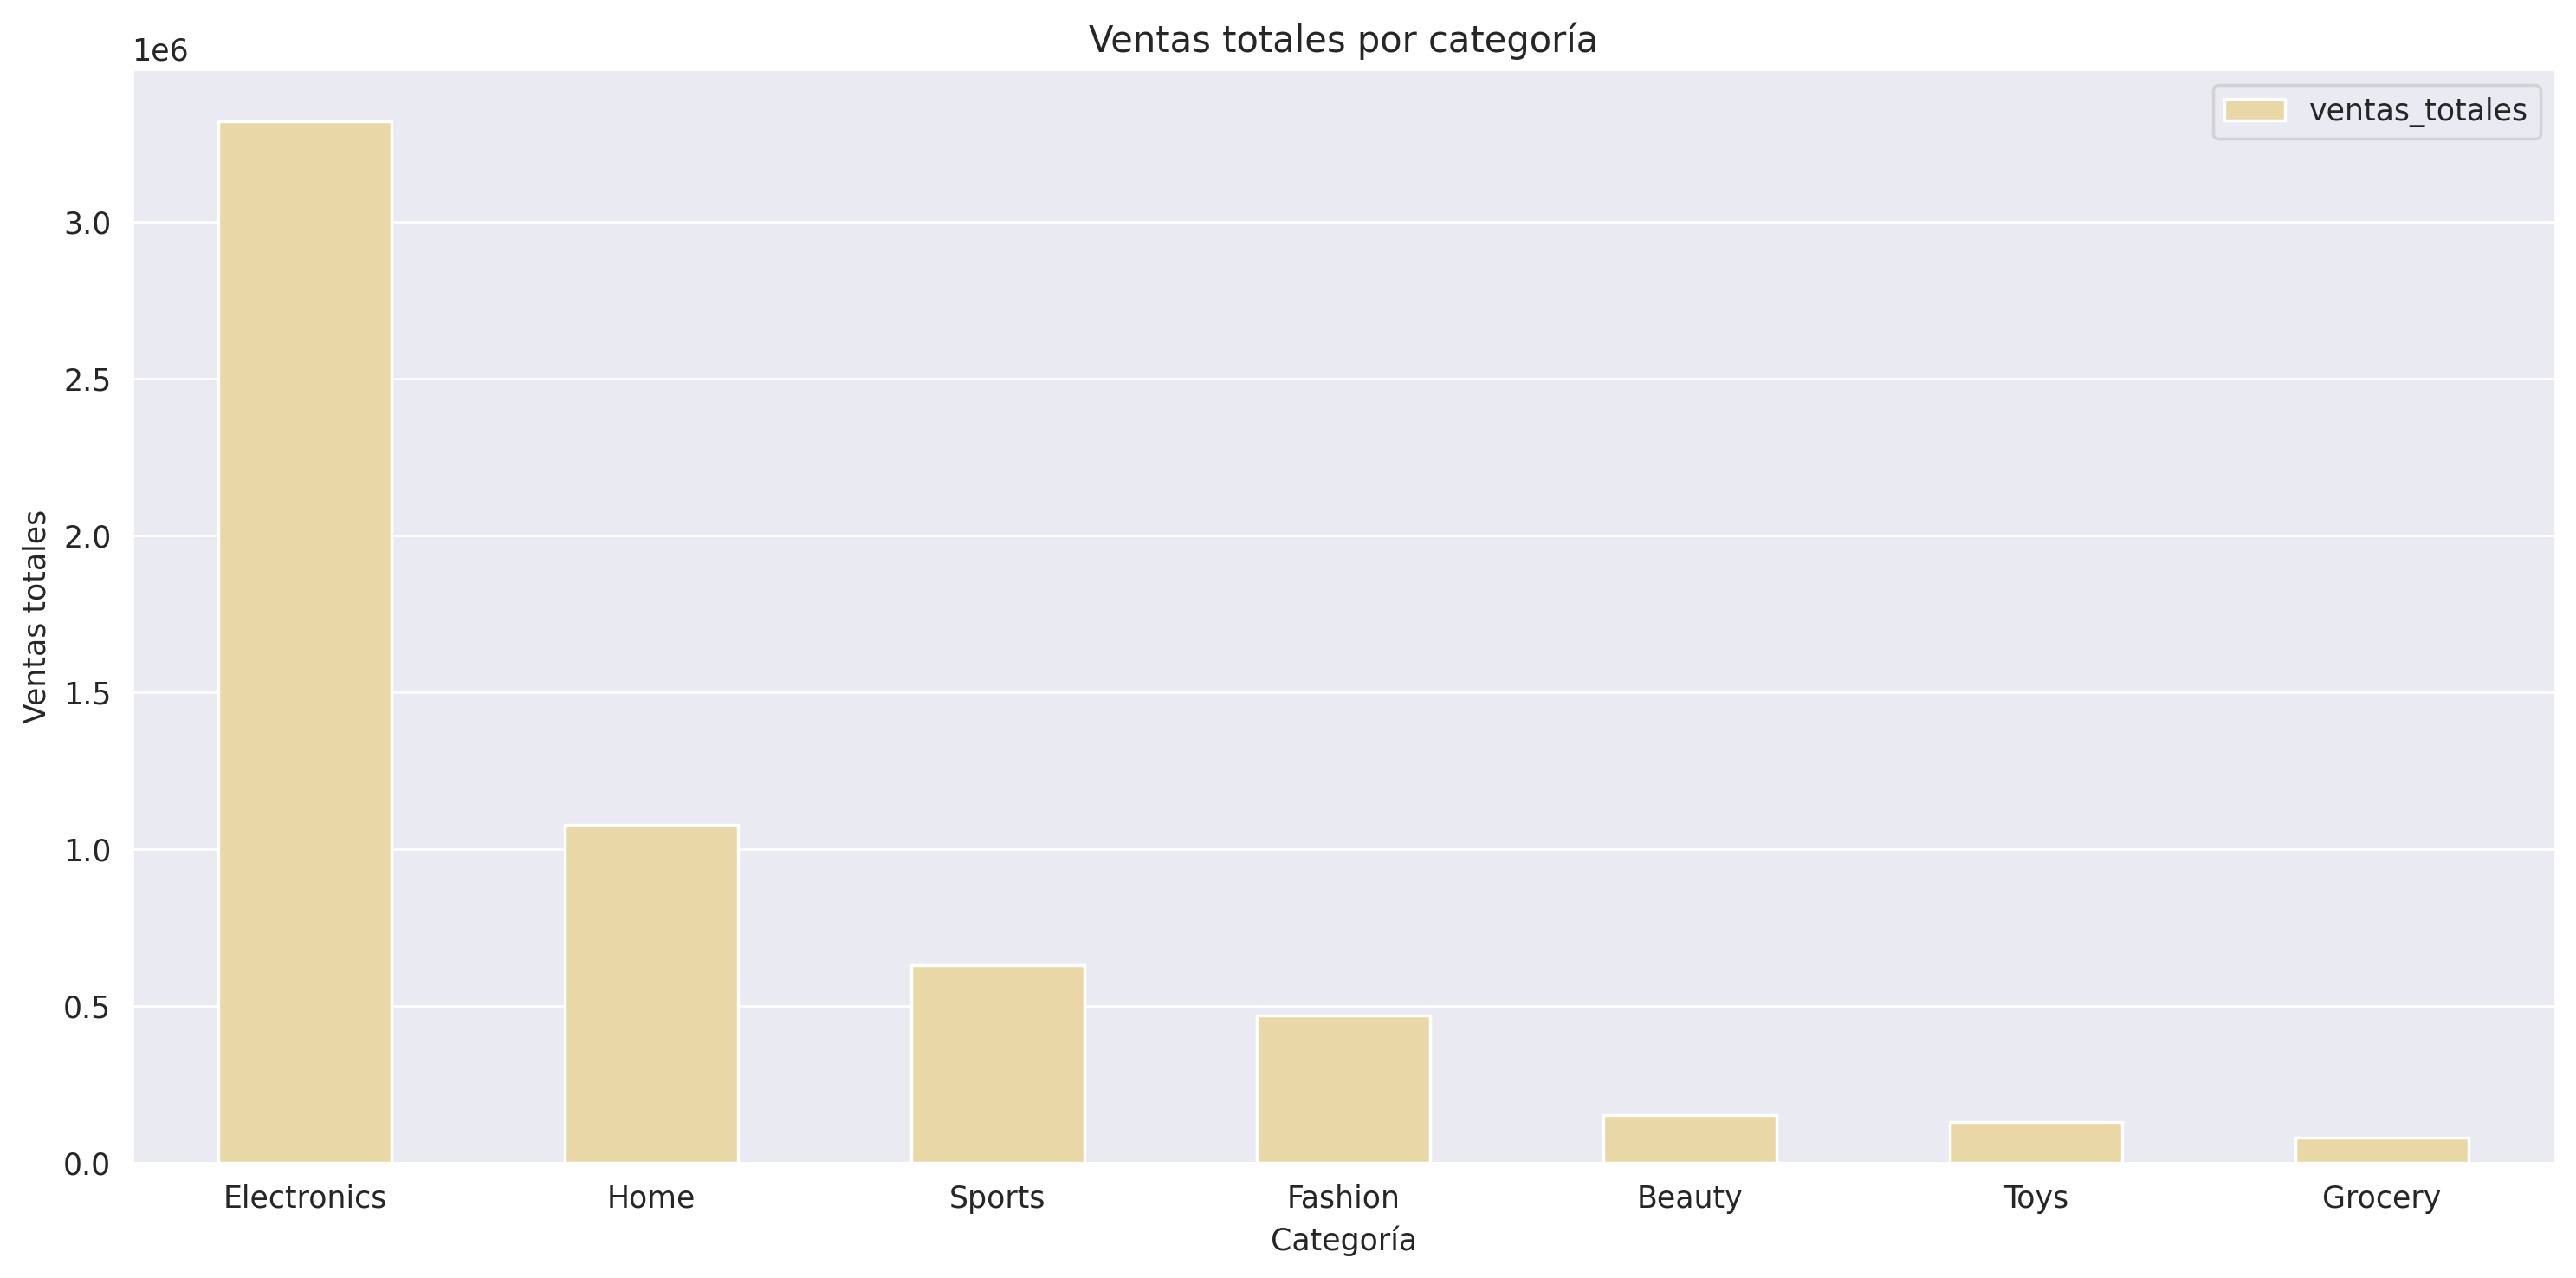

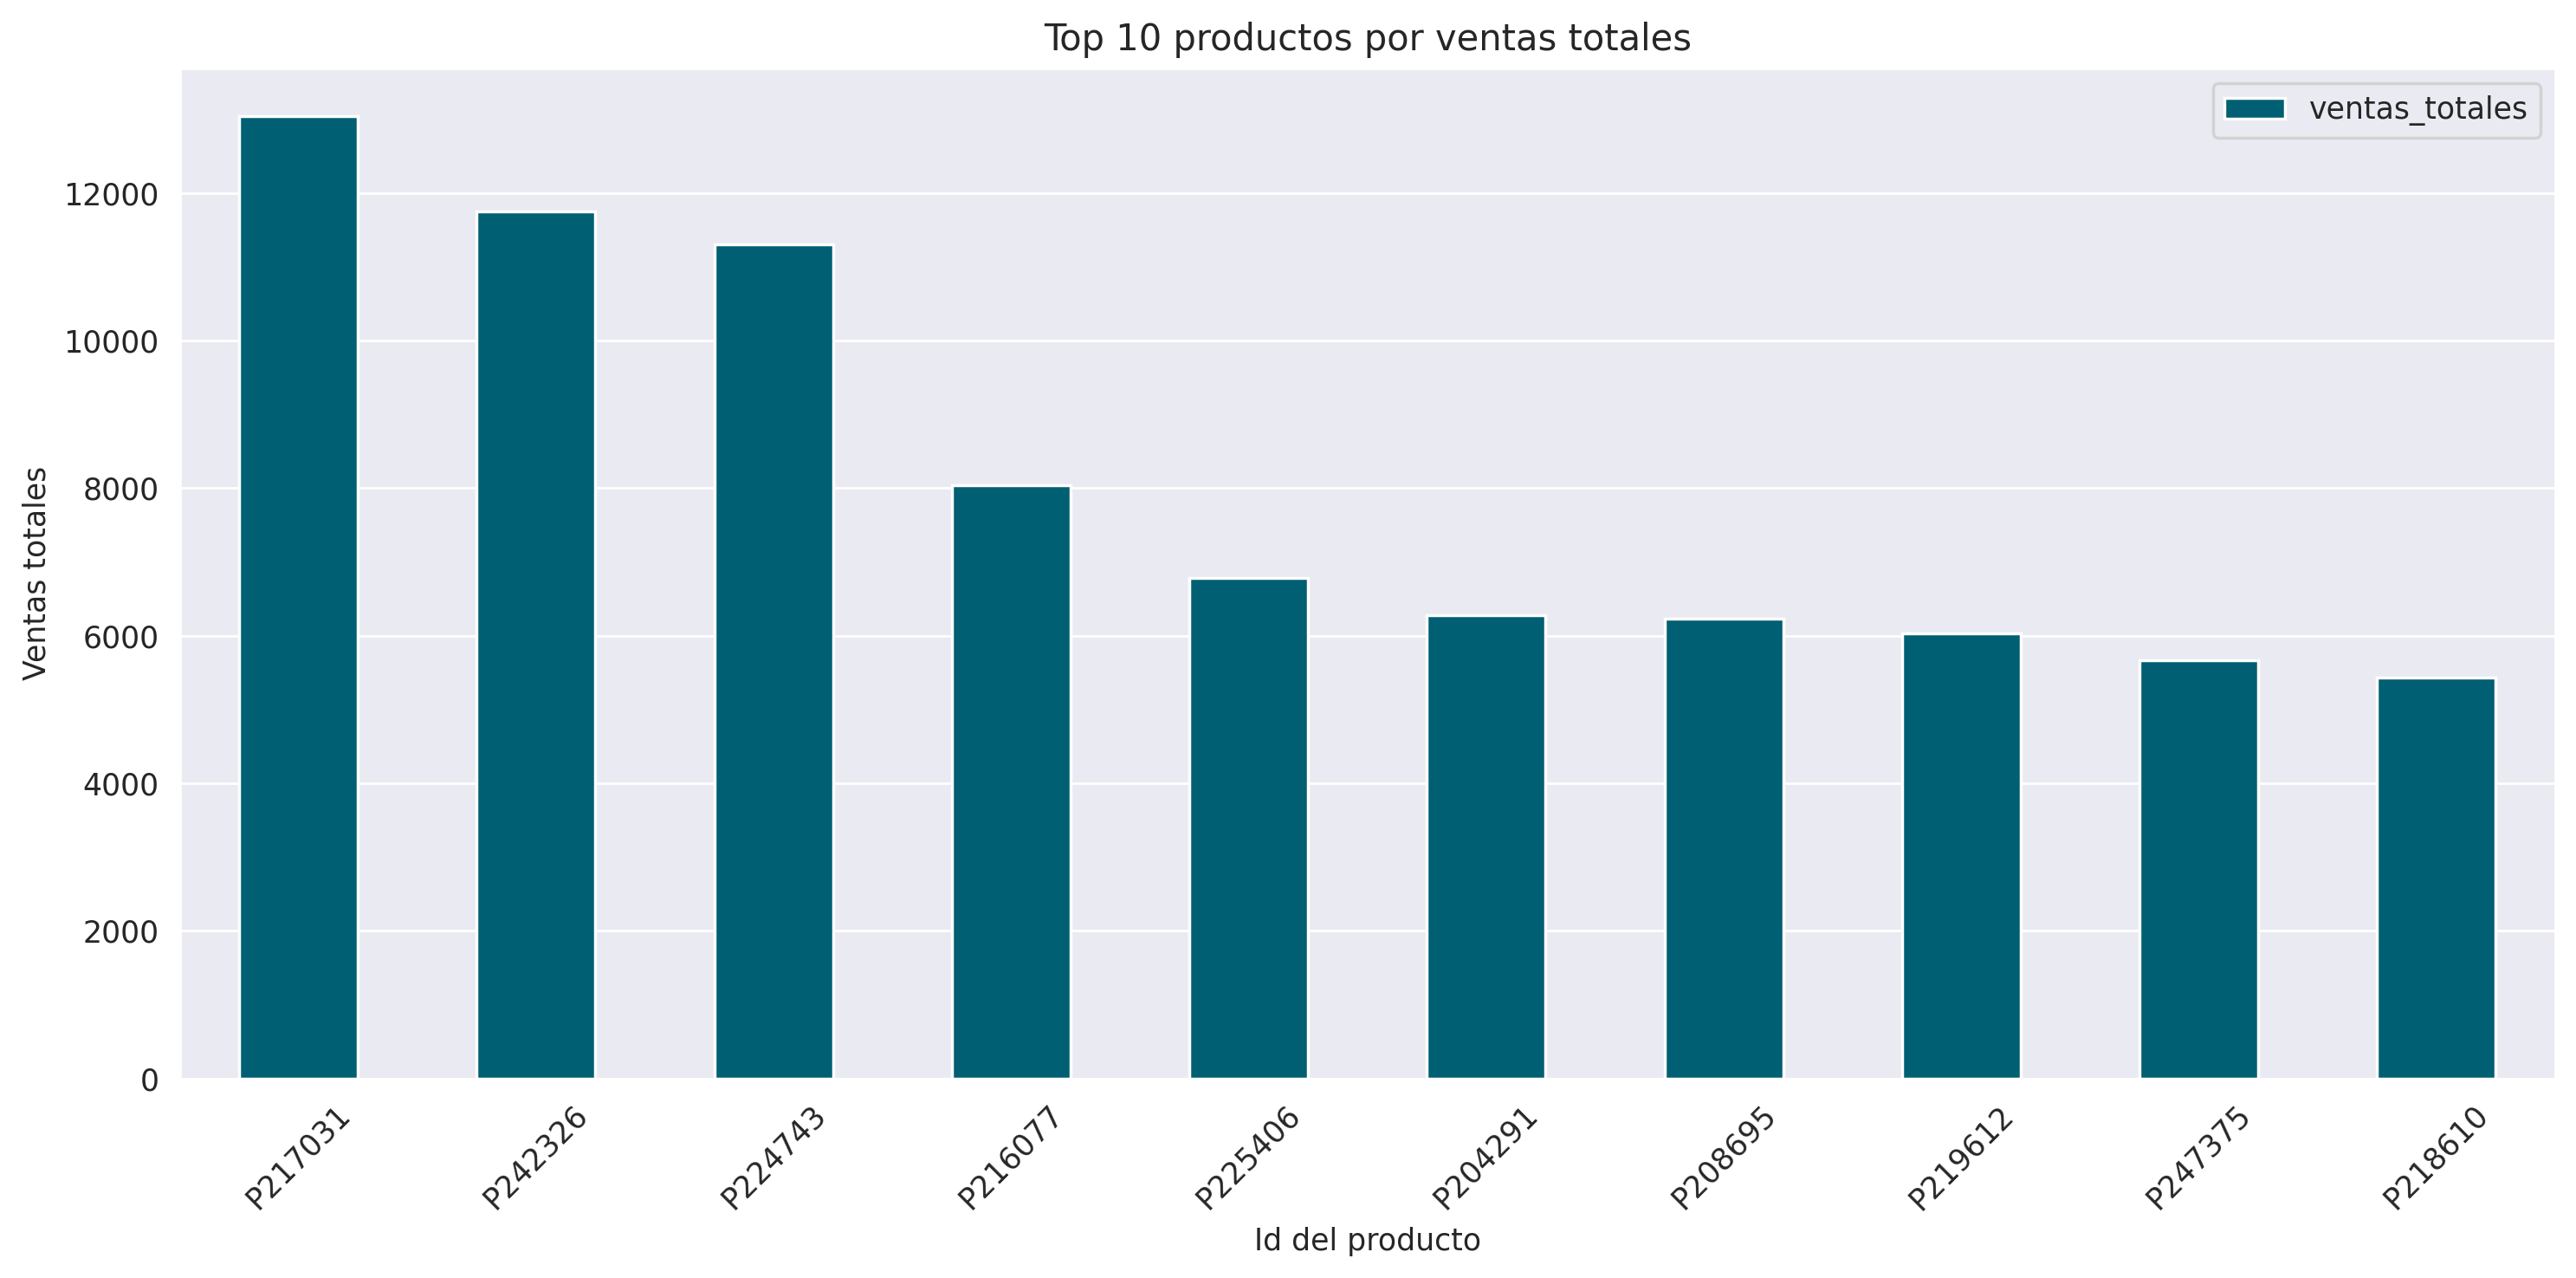

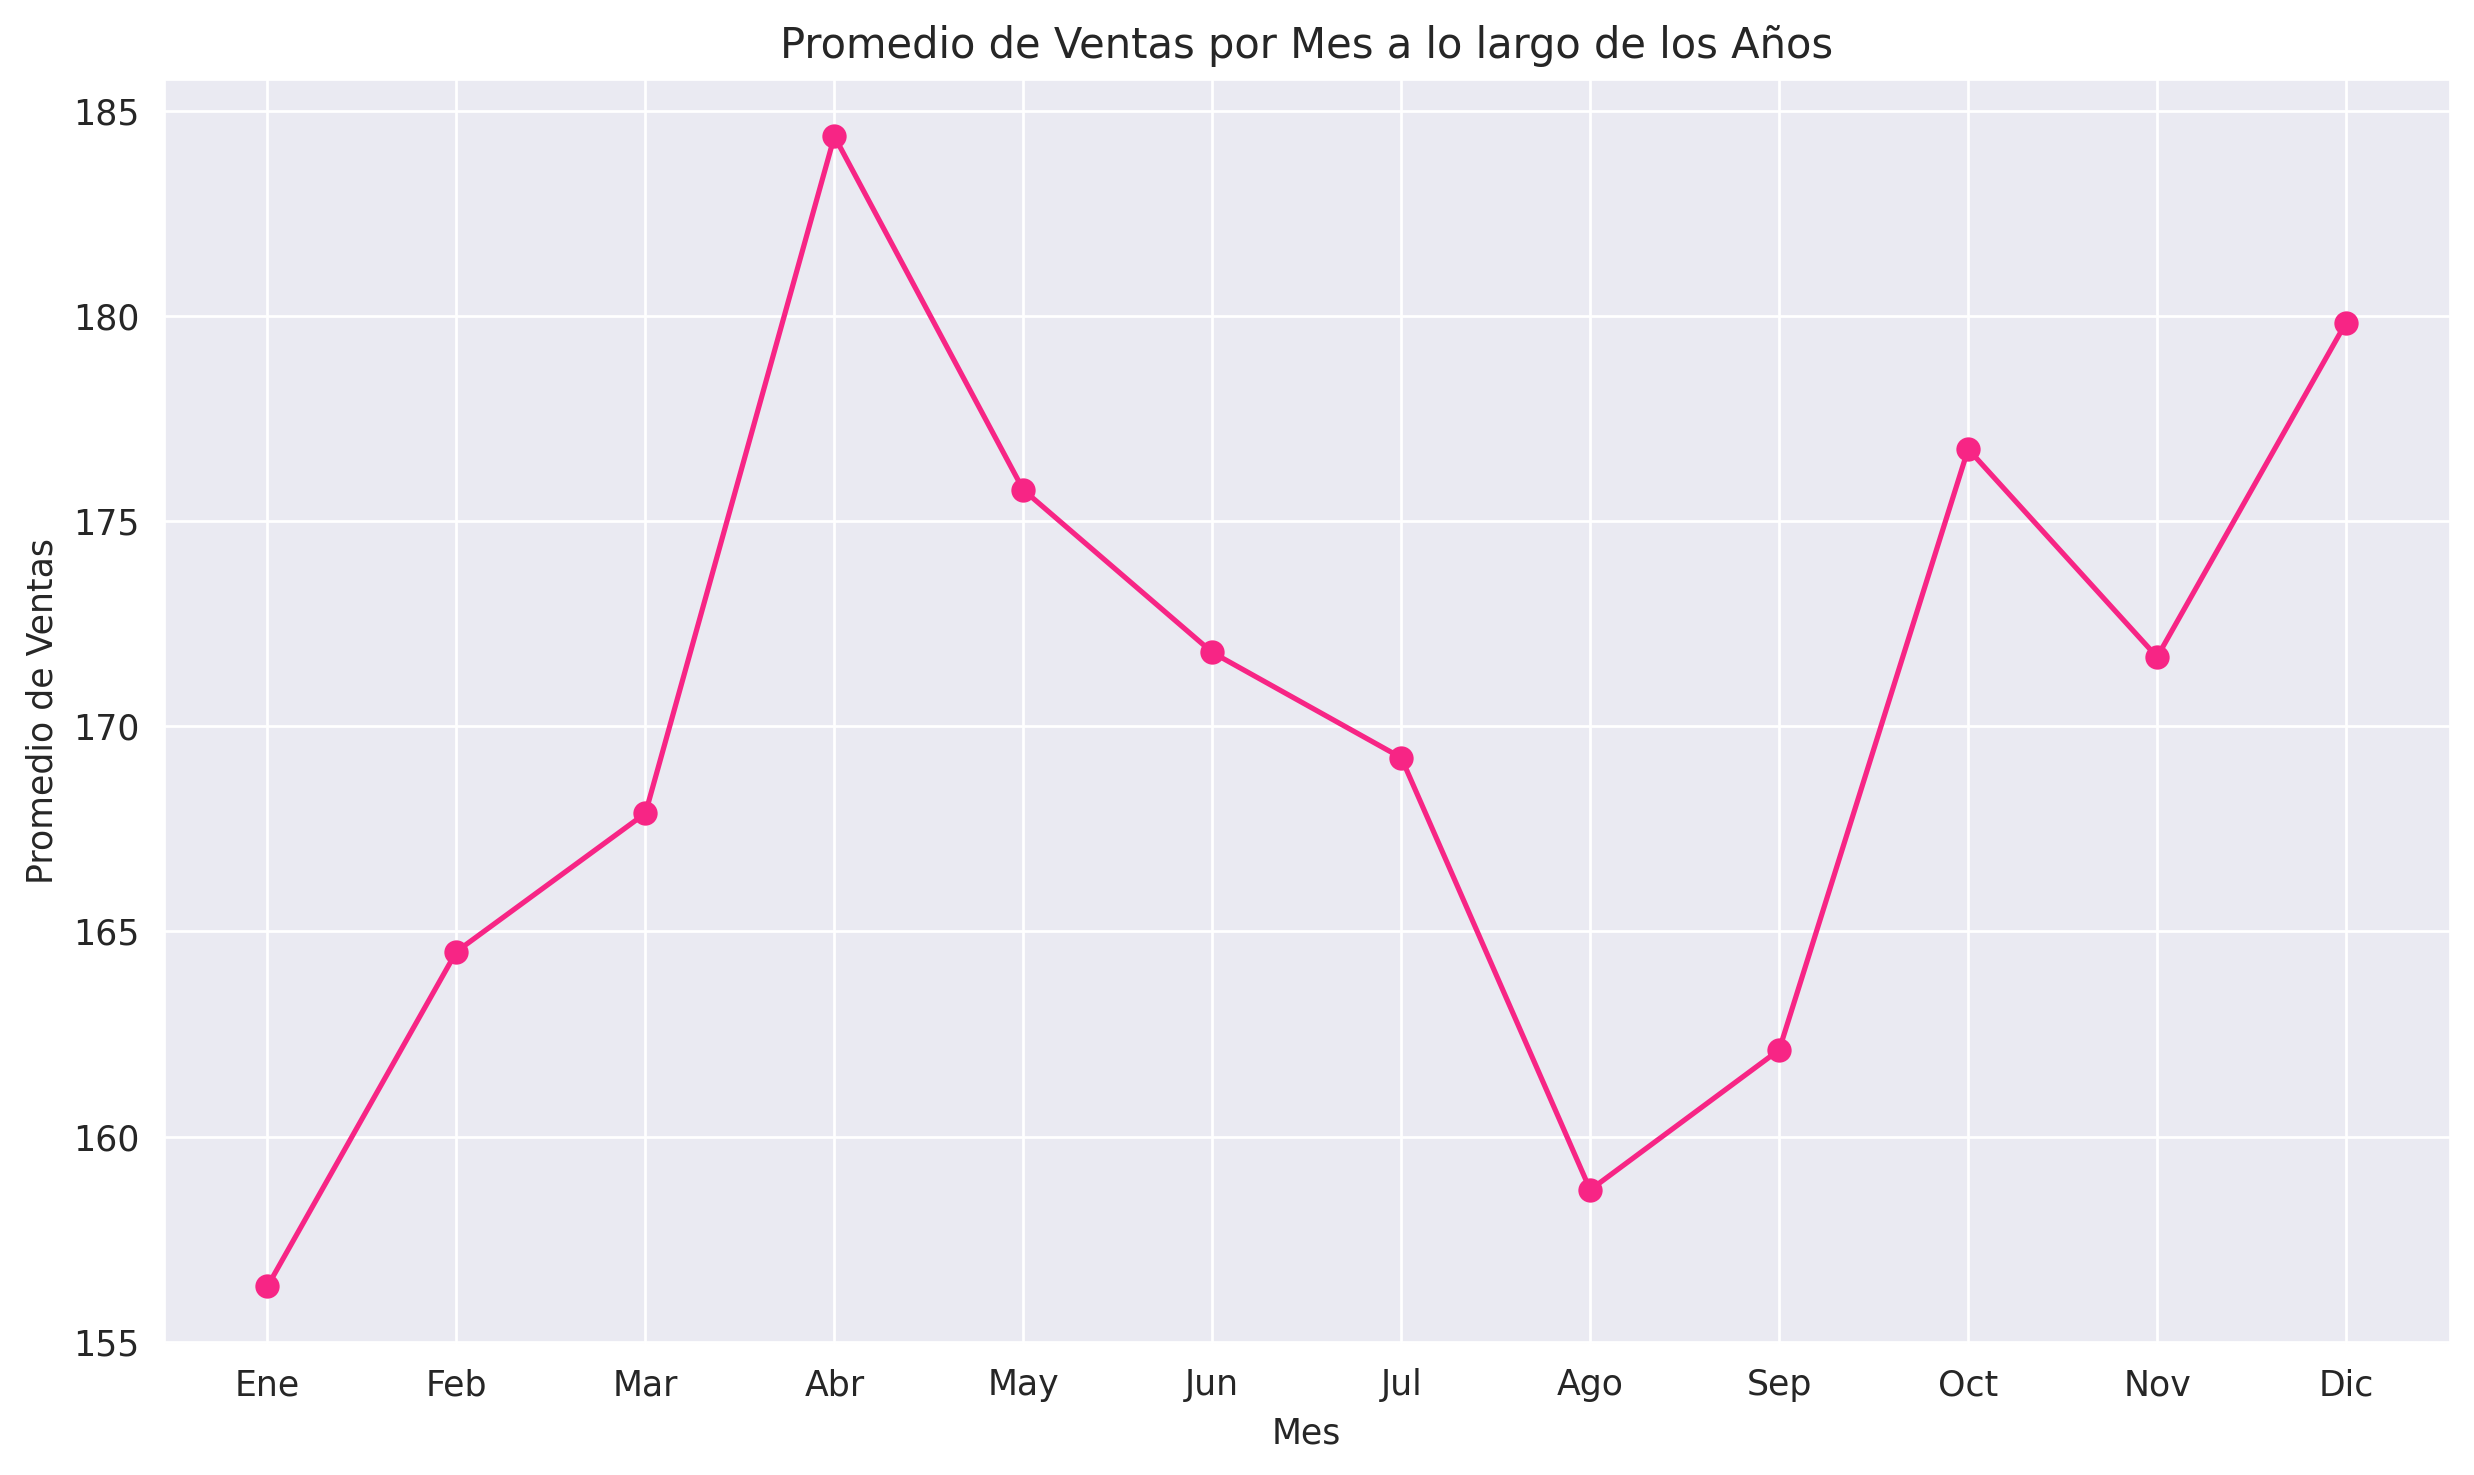

La proporción total de ventas generadas por el top 10 de productos es: 1.37%


In [ ]:
# Gráfica de ventas totales por mes a lo largo de los años
plt.figure(figsize=(12, 6)) # Corregido: figsize como argumento
plt.plot(Datos_Ventas_Temporales.index, Datos_Ventas_Temporales['ventas_totales'].values) # Corregido: referenciar columna del DataFrame
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes y Año')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfica de ventas totales por categoría en orden ascendentes
Resumen_categoría_sorted=Resumen_categoría.sort_values(by='ventas_totales',ascending=False)
Resumen_categoría_sorted[['ventas_totales']].plot(kind='bar',stacked=True,figsize=(12,6), color=custom_palette_1[4:6])
plt.title('Ventas totales por categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas totales')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Gráfica de los 10 productos más vendidos en orden ascendentes
Resumen_productos_sorted=Resumen_productos.sort_values(by='ventas_totales',ascending=False).head(10) # Sort and select top 10
Resumen_productos_sorted[['ventas_totales']].plot(kind='bar',stacked=True,figsize=(12,6), color=custom_palette_1[1:6])
plt.title('Top 10 productos por ventas totales')
plt.xlabel('Id del producto')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Gráfica que muestra la estacionalidad en temporadas altas y bajas
plt.figure(figsize=(10, 6))
plt.plot(average_monthly_sales.index, average_monthly_sales.values, marker='o')
plt.title('Promedio de Ventas por Mes a lo largo de los Años')
plt.xlabel('Mes')
plt.ylabel('Promedio de Ventas')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"La proporción total de ventas generadas por el top 10 de productos es: {proportion_top_10:.2%}")

### **Resumen de Resultados - Área Comercial**

El análisis del área comercial revela patrones de ventas y estacionalidad clave:

* **Variación de Ventas a lo largo del Año:** Las ventas a lo largo del año muestran fluctuaciones, con un notable aumento hacia finales de año, lo cual podría estar relacionado con festividades como Navidad y Año Nuevo, seguido de un descenso a principios de año. A pesar de estas tendencias, las ventas no presentan una periodicidad clara, lo que sugiere la necesidad de un análisis más profundo para identificar estacionalidad y otras características relevantes.
* **Categorías y Productos Más Vendidos:** Las categorías con mayores ventas son, de manera evidente, **Electrónica**, seguida por **Hogar**, **Deportes** y **Moda**. En menor medida se encuentran **Belleza**, **Juguetes** y **Comestibles**. Se aprecian claramente las tendencias actuales del mercado. Se recomienda analizar los nichos específicos de las categorías principales para determinar estrategias que aumenten su rentabilidad y fomenten la fidelización de los clientes.
* **Proporción del Total de Productos Top 10:** La proporción de las ventas totales generada por el Top 10 de productos es del **1.37%**. Aunque este porcentaje puede parecer pequeño, representa una contribución considerable a las ventas totales.
* **Períodos de Estacionalidad Alta o Baja:** En promedio, los meses con mayor volumen de ventas son **Abril**, seguido por **Diciembre, Octubre y Noviembre**. La estacionalidad más baja se observa en **Enero y Agosto**.

En resumen, el área comercial presenta un desempeño diferenciado por categorías y productos, con una concentración notable en Electrónica, Hogar y Deportes. Las ventas muestran fluctuaciones estacionales, siendo el fin de año un período de alta actividad. La gestión estratégica de los productos top y la adaptación a las tendencias estacionales son fundamentales para optimizar el rendimiento comercial.

## **Descripción de los consumidores - Segmentación y Valor**  

sta sección se centra en el perfil y comportamiento de los clientes.  
Se exploran variables demográficas (edad, género, región) y métricas de comportamiento como frecuencia de compra, monto promedio y recencia (RFM).  
También se busca identificar los segmentos más rentables y aquellos con potencial de fidelización o riesgo de abandono.  
El análisis permitirá entender quiénes son los principales impulsores del negocio.

**Objetivo descriptivo:** perfilar a los clientes y clasificar su valor para estrategias de retención y crecimiento.


1. ¿Cómo se distribuyen los clientes por edad, género y región?  
2. ¿Qué proporción son nuevos vs recurrentes?  
3. ¿Cómo se agrupan los clientes por comportamiento (clustering)?  
4. ¿Quiénes son los clientes más valiosos según RFM (Recency, Frequency, Monetary)?
5. ¿Cómo se distribuye el Valor de Vida del Cliente (CLTV) histórico entre los diferentes segmentos de clientes identificados por el clustering?
6. ¿Qué cohortes muestran mayor retención?  


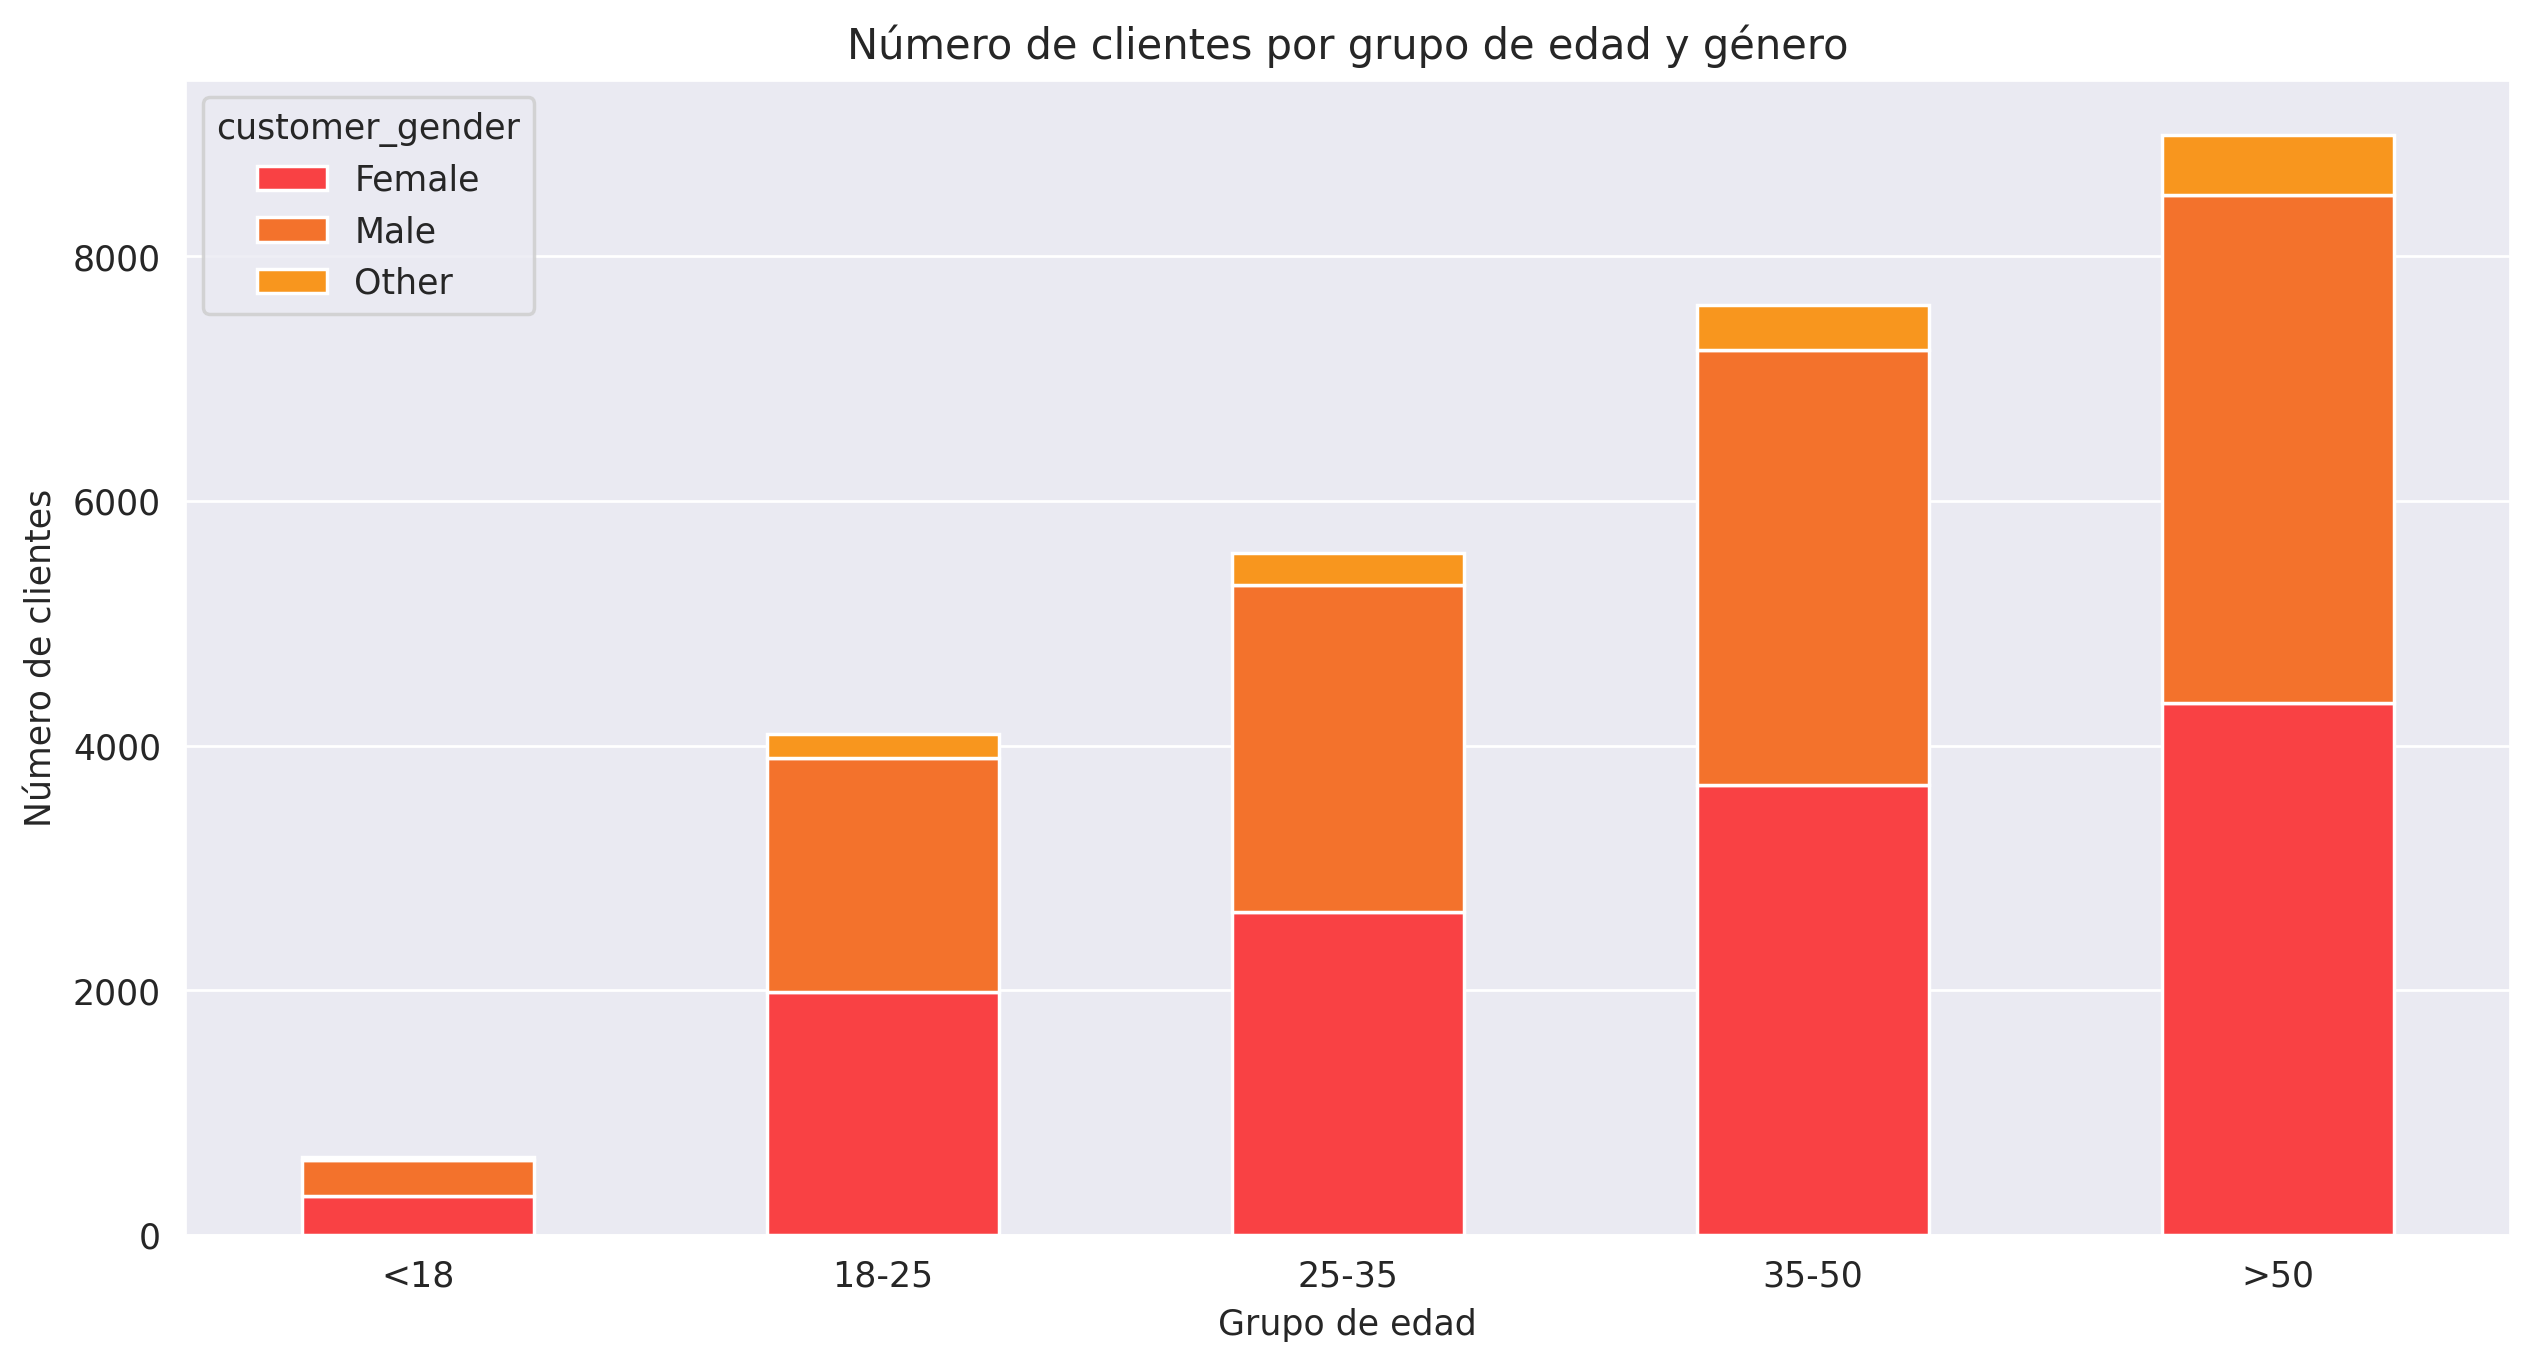

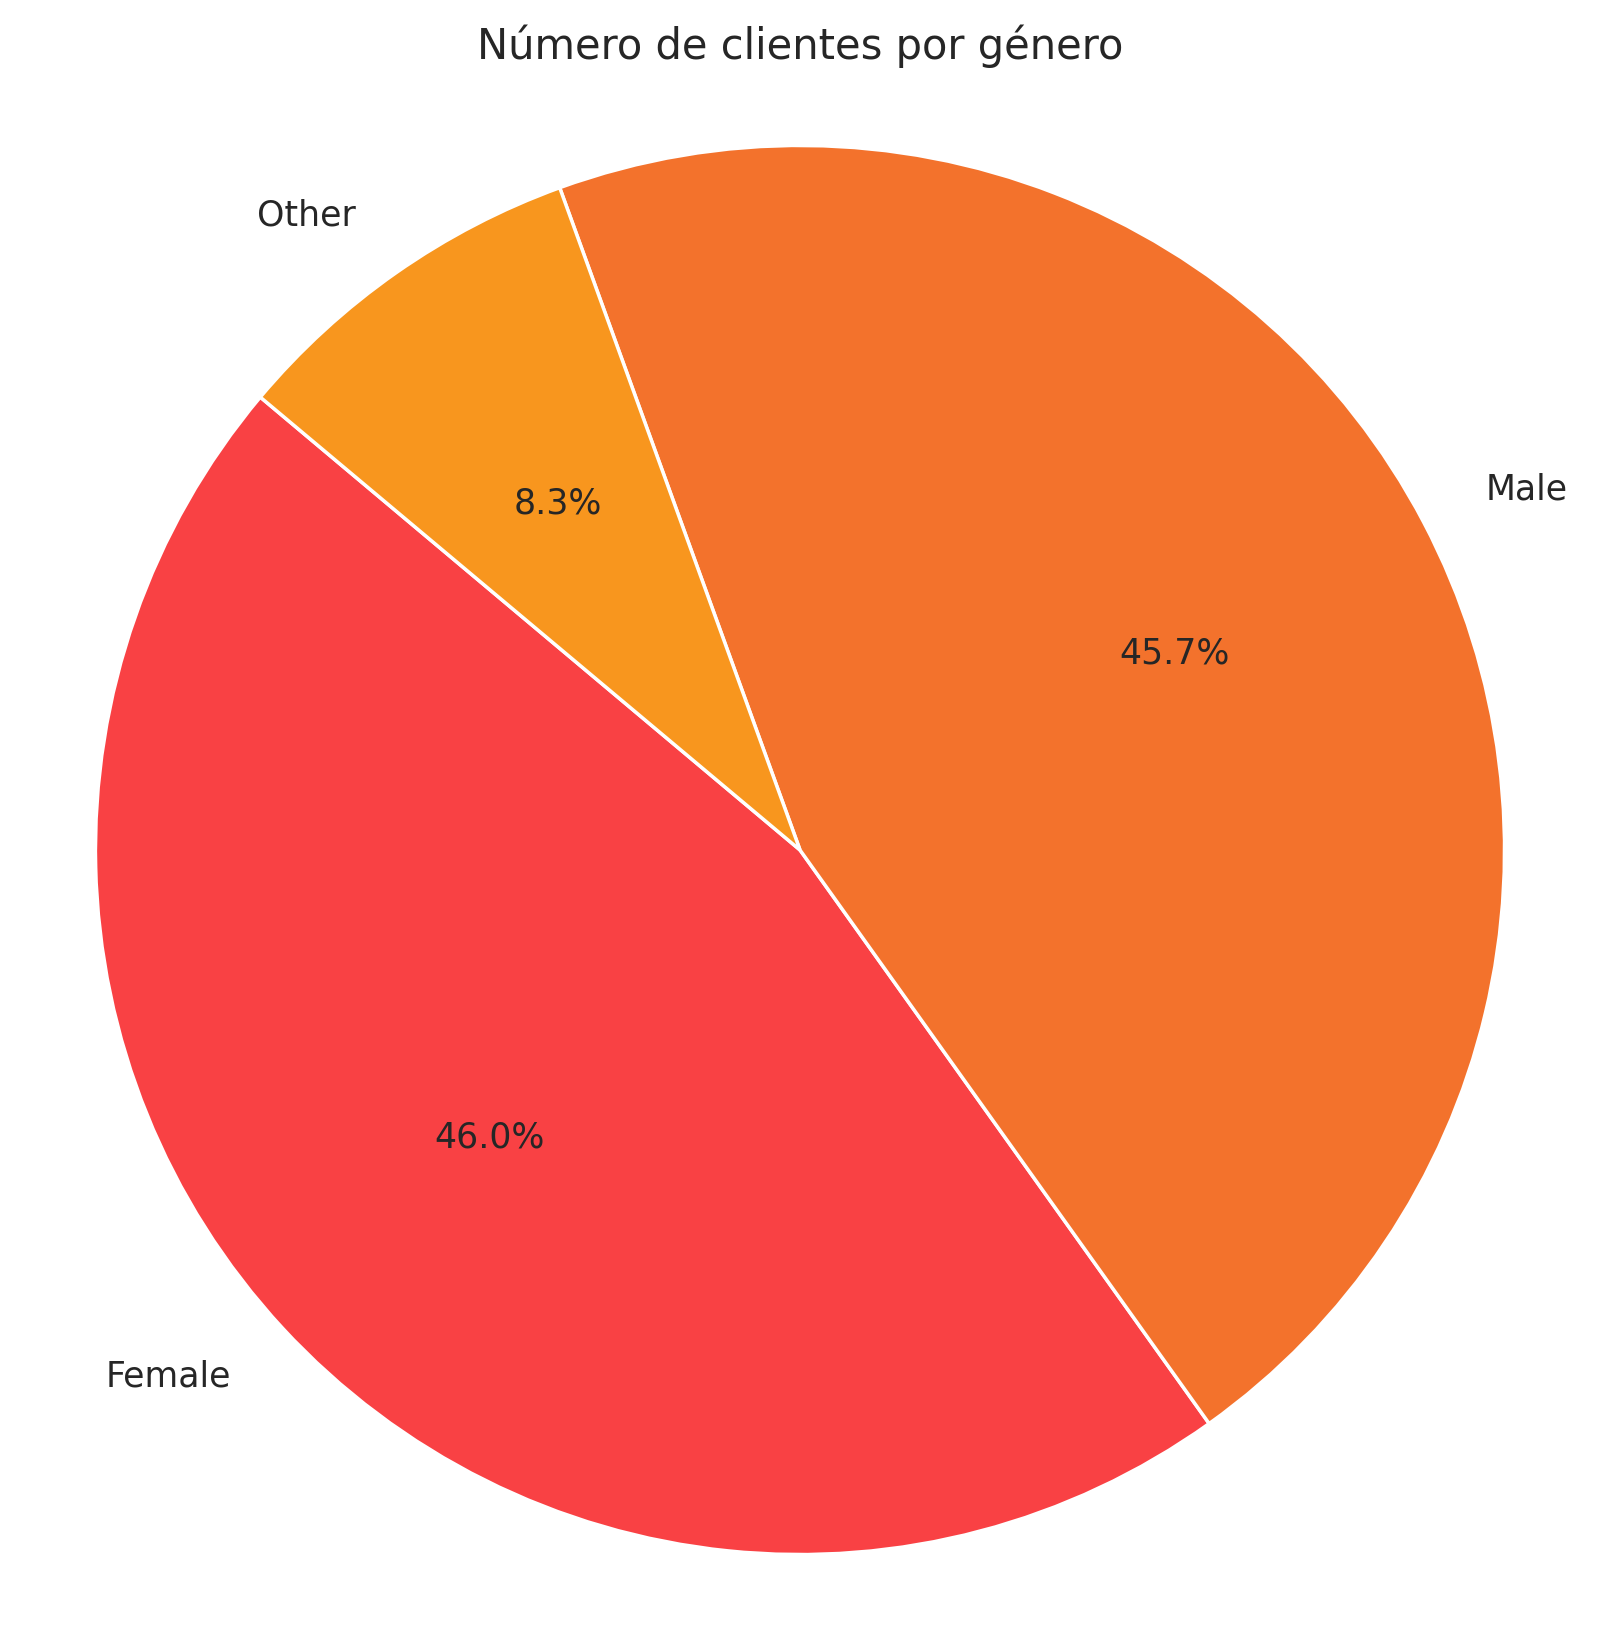

Número total de clientes únicos: 15283
Número de clientes recurrentes (con más de una compra): 7428
Número de clientes nuevos (con una sola compra): 475
Proporción de clientes recurrentes: 93.99%


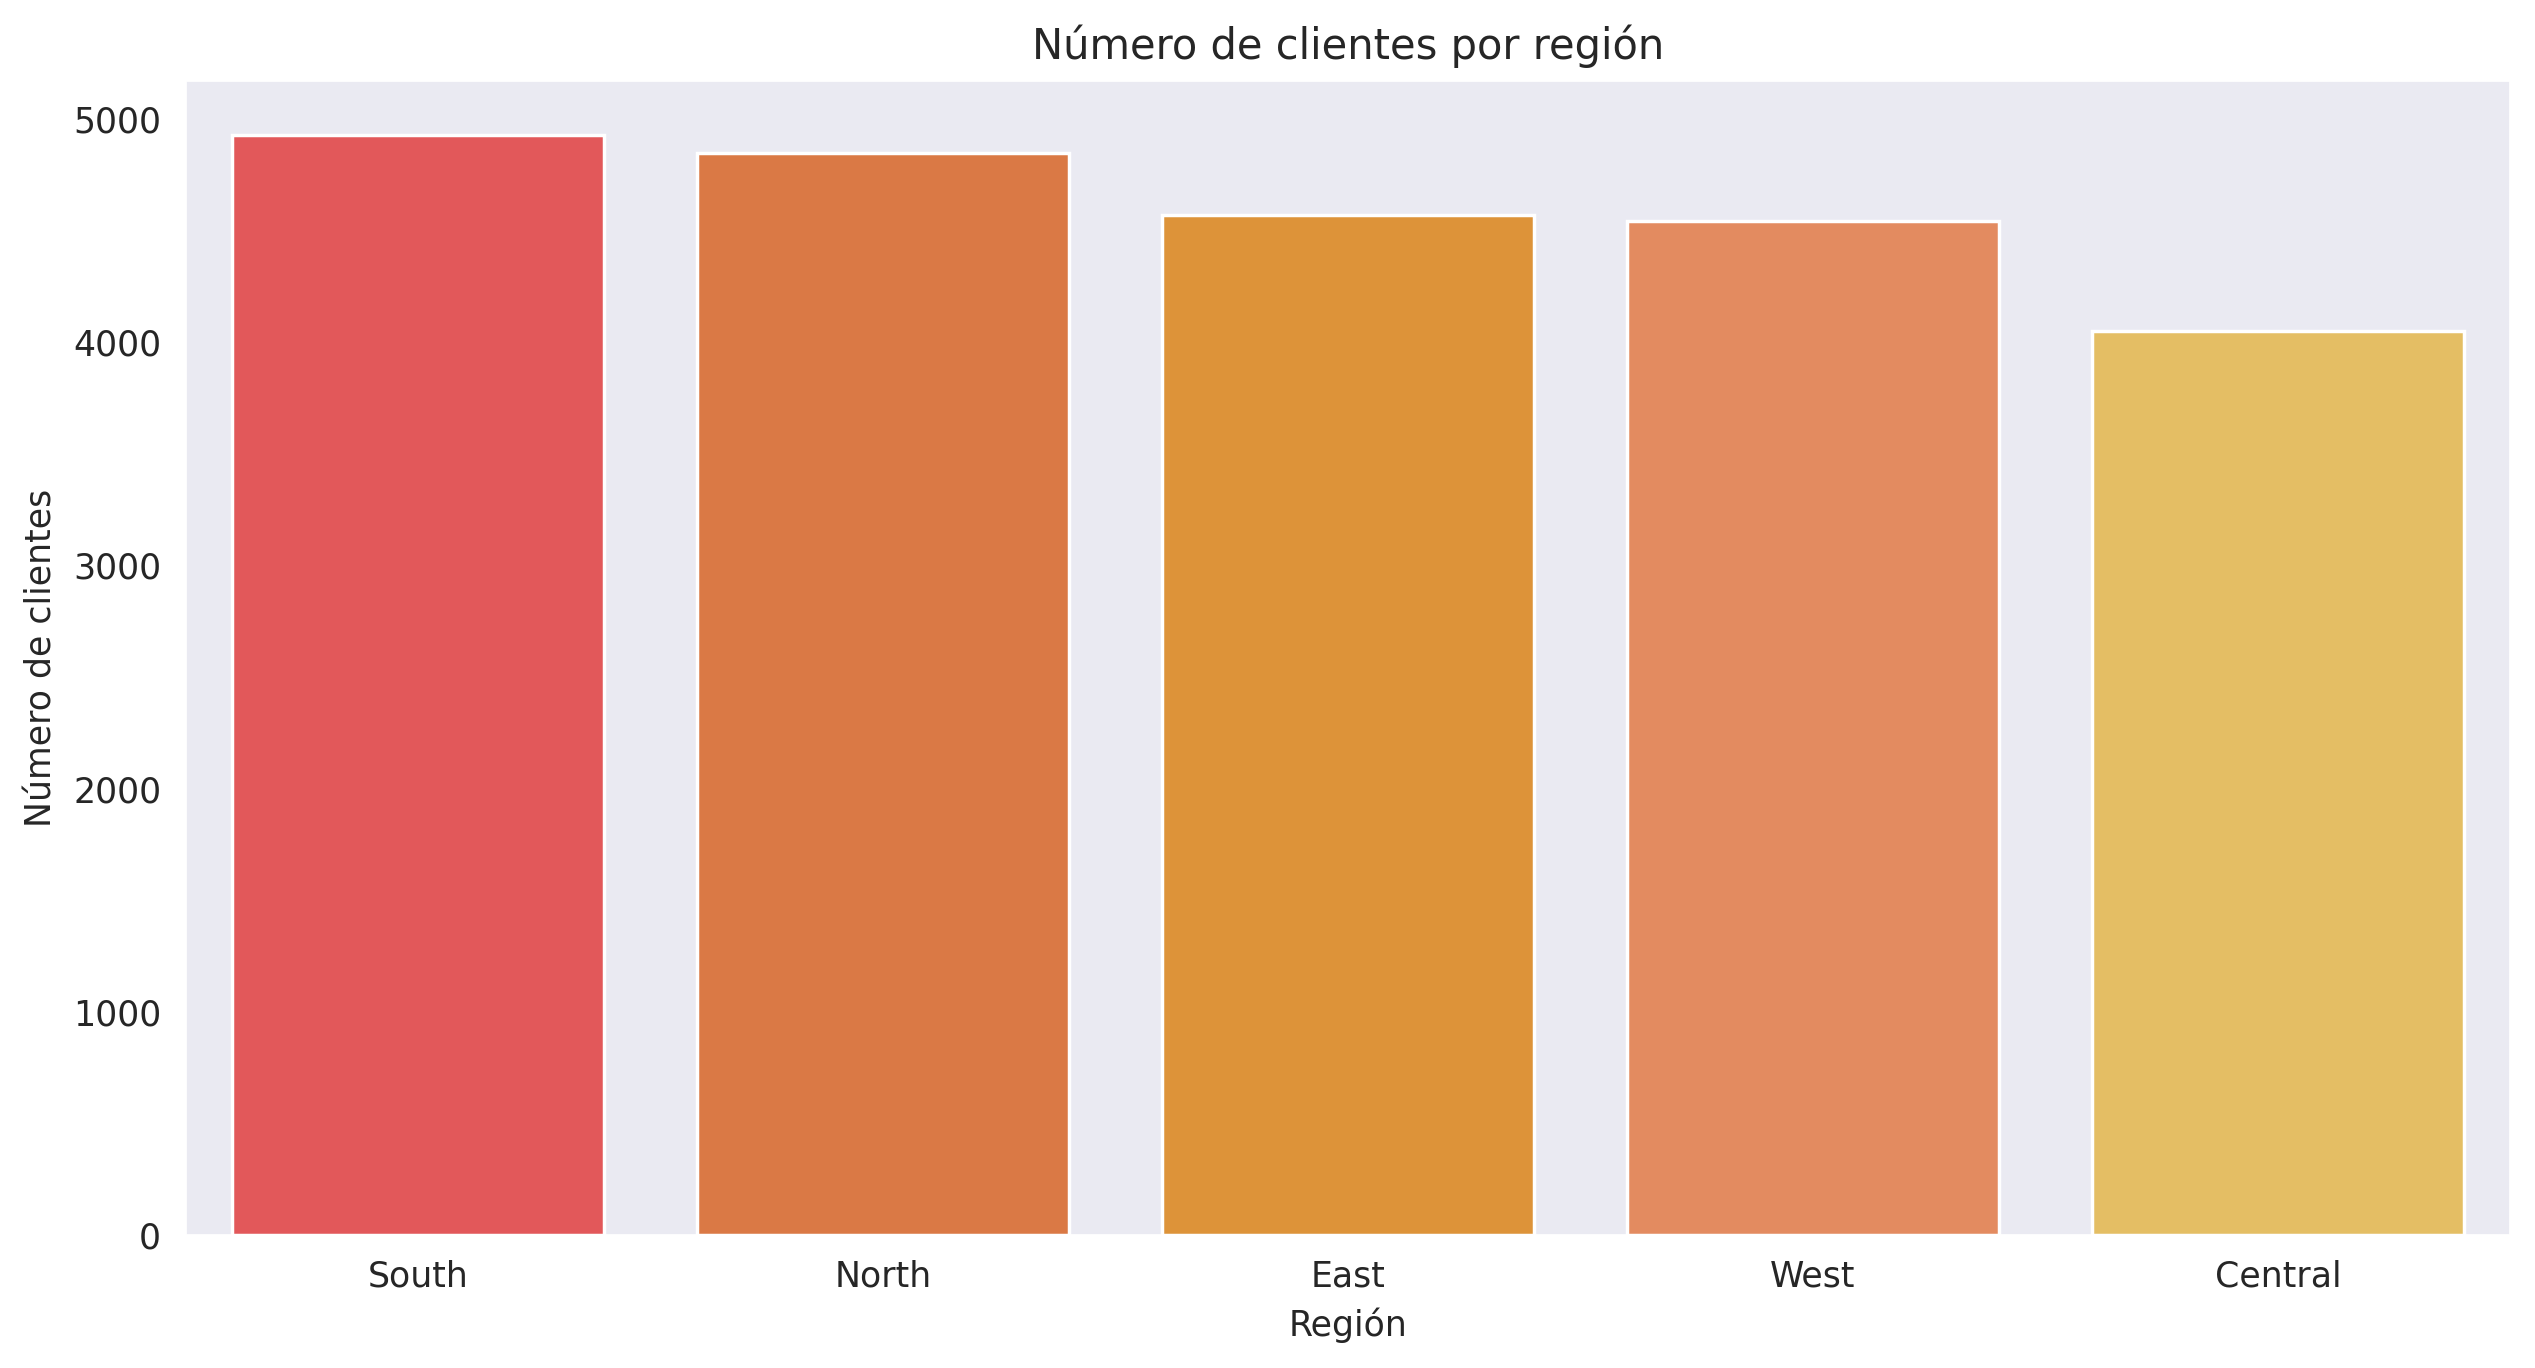

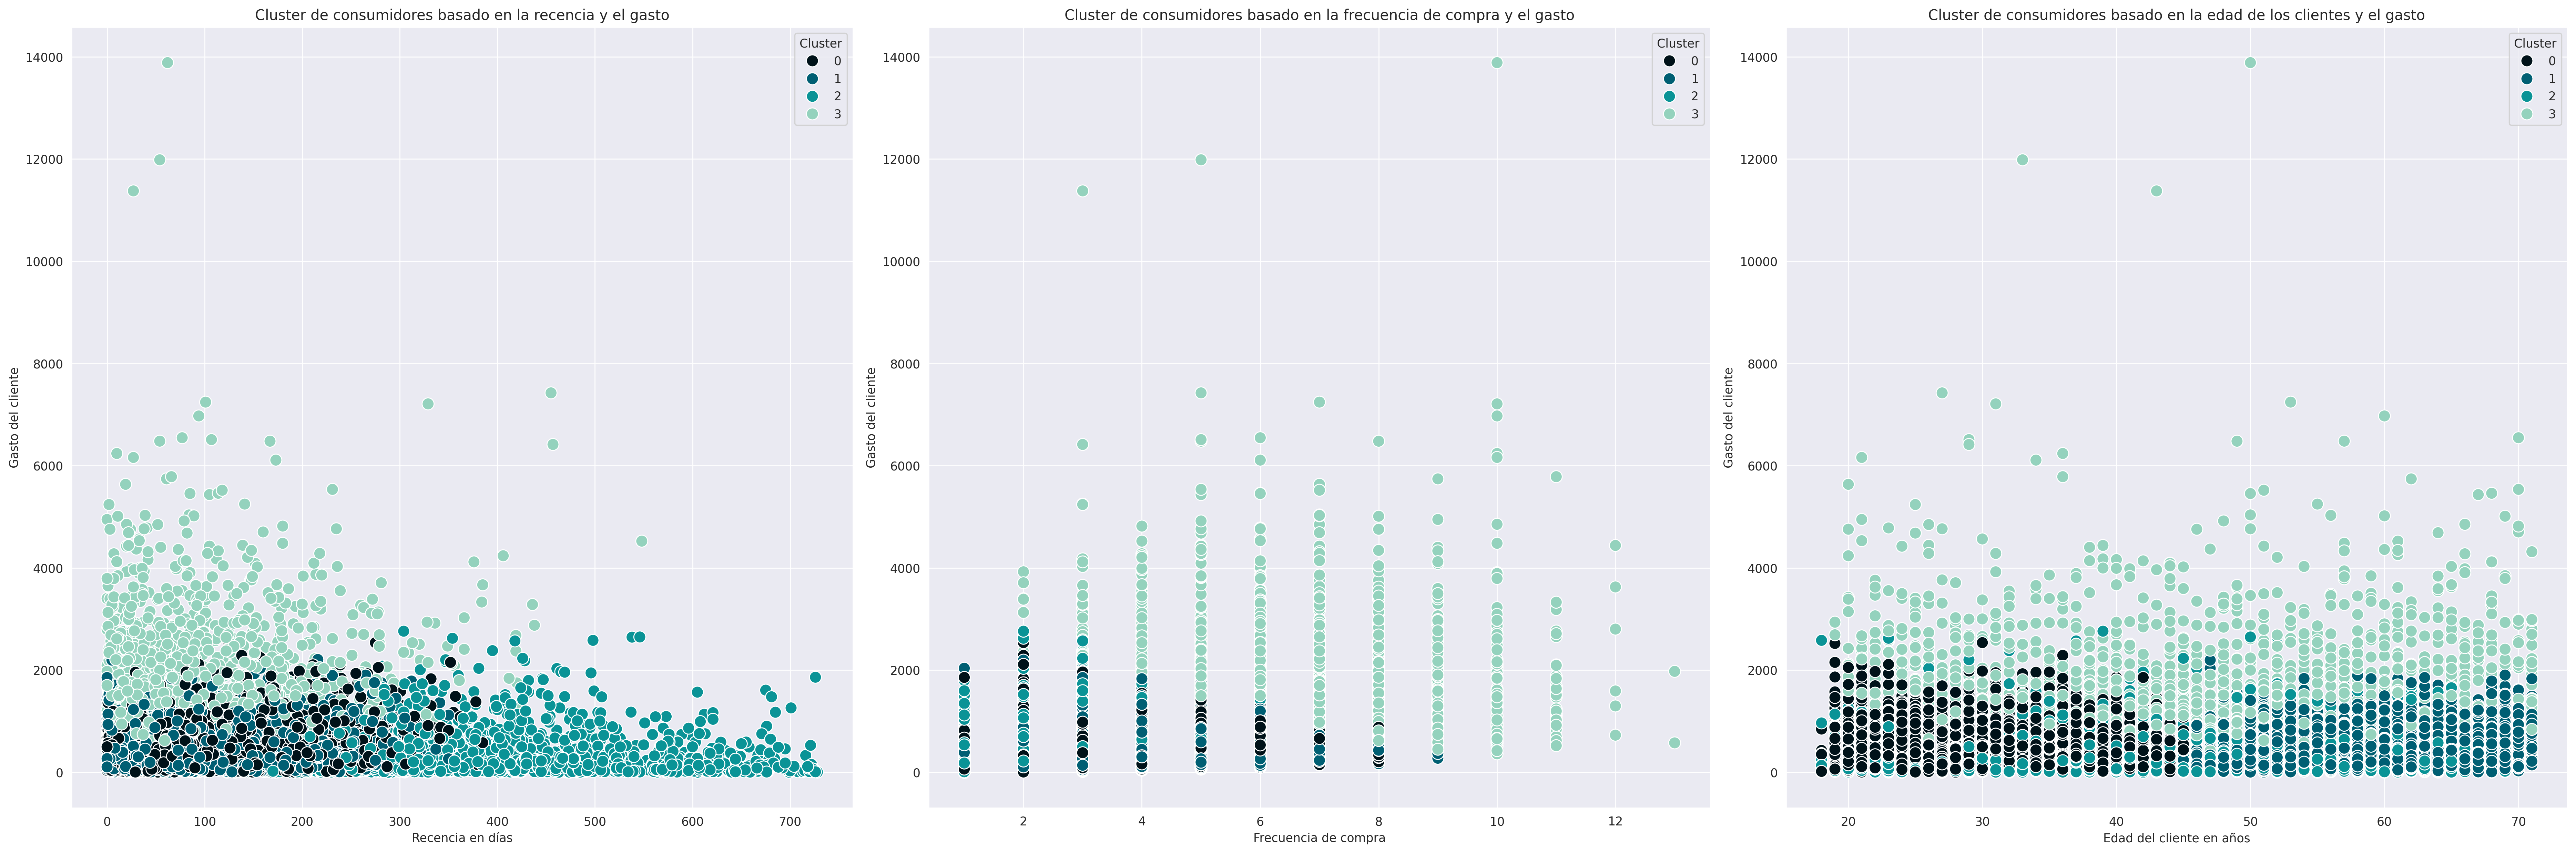


Características de cada cluster:


recencia  frecuencia_compra  gasto_cliente  edad_ultima_compra
Cluster                                                                
0          109.13               4.27         549.46               31.20
1          109.35               4.18         512.28               58.57
2          412.42               2.41         364.18               44.25
3           87.68               7.04        2018.04               45.78

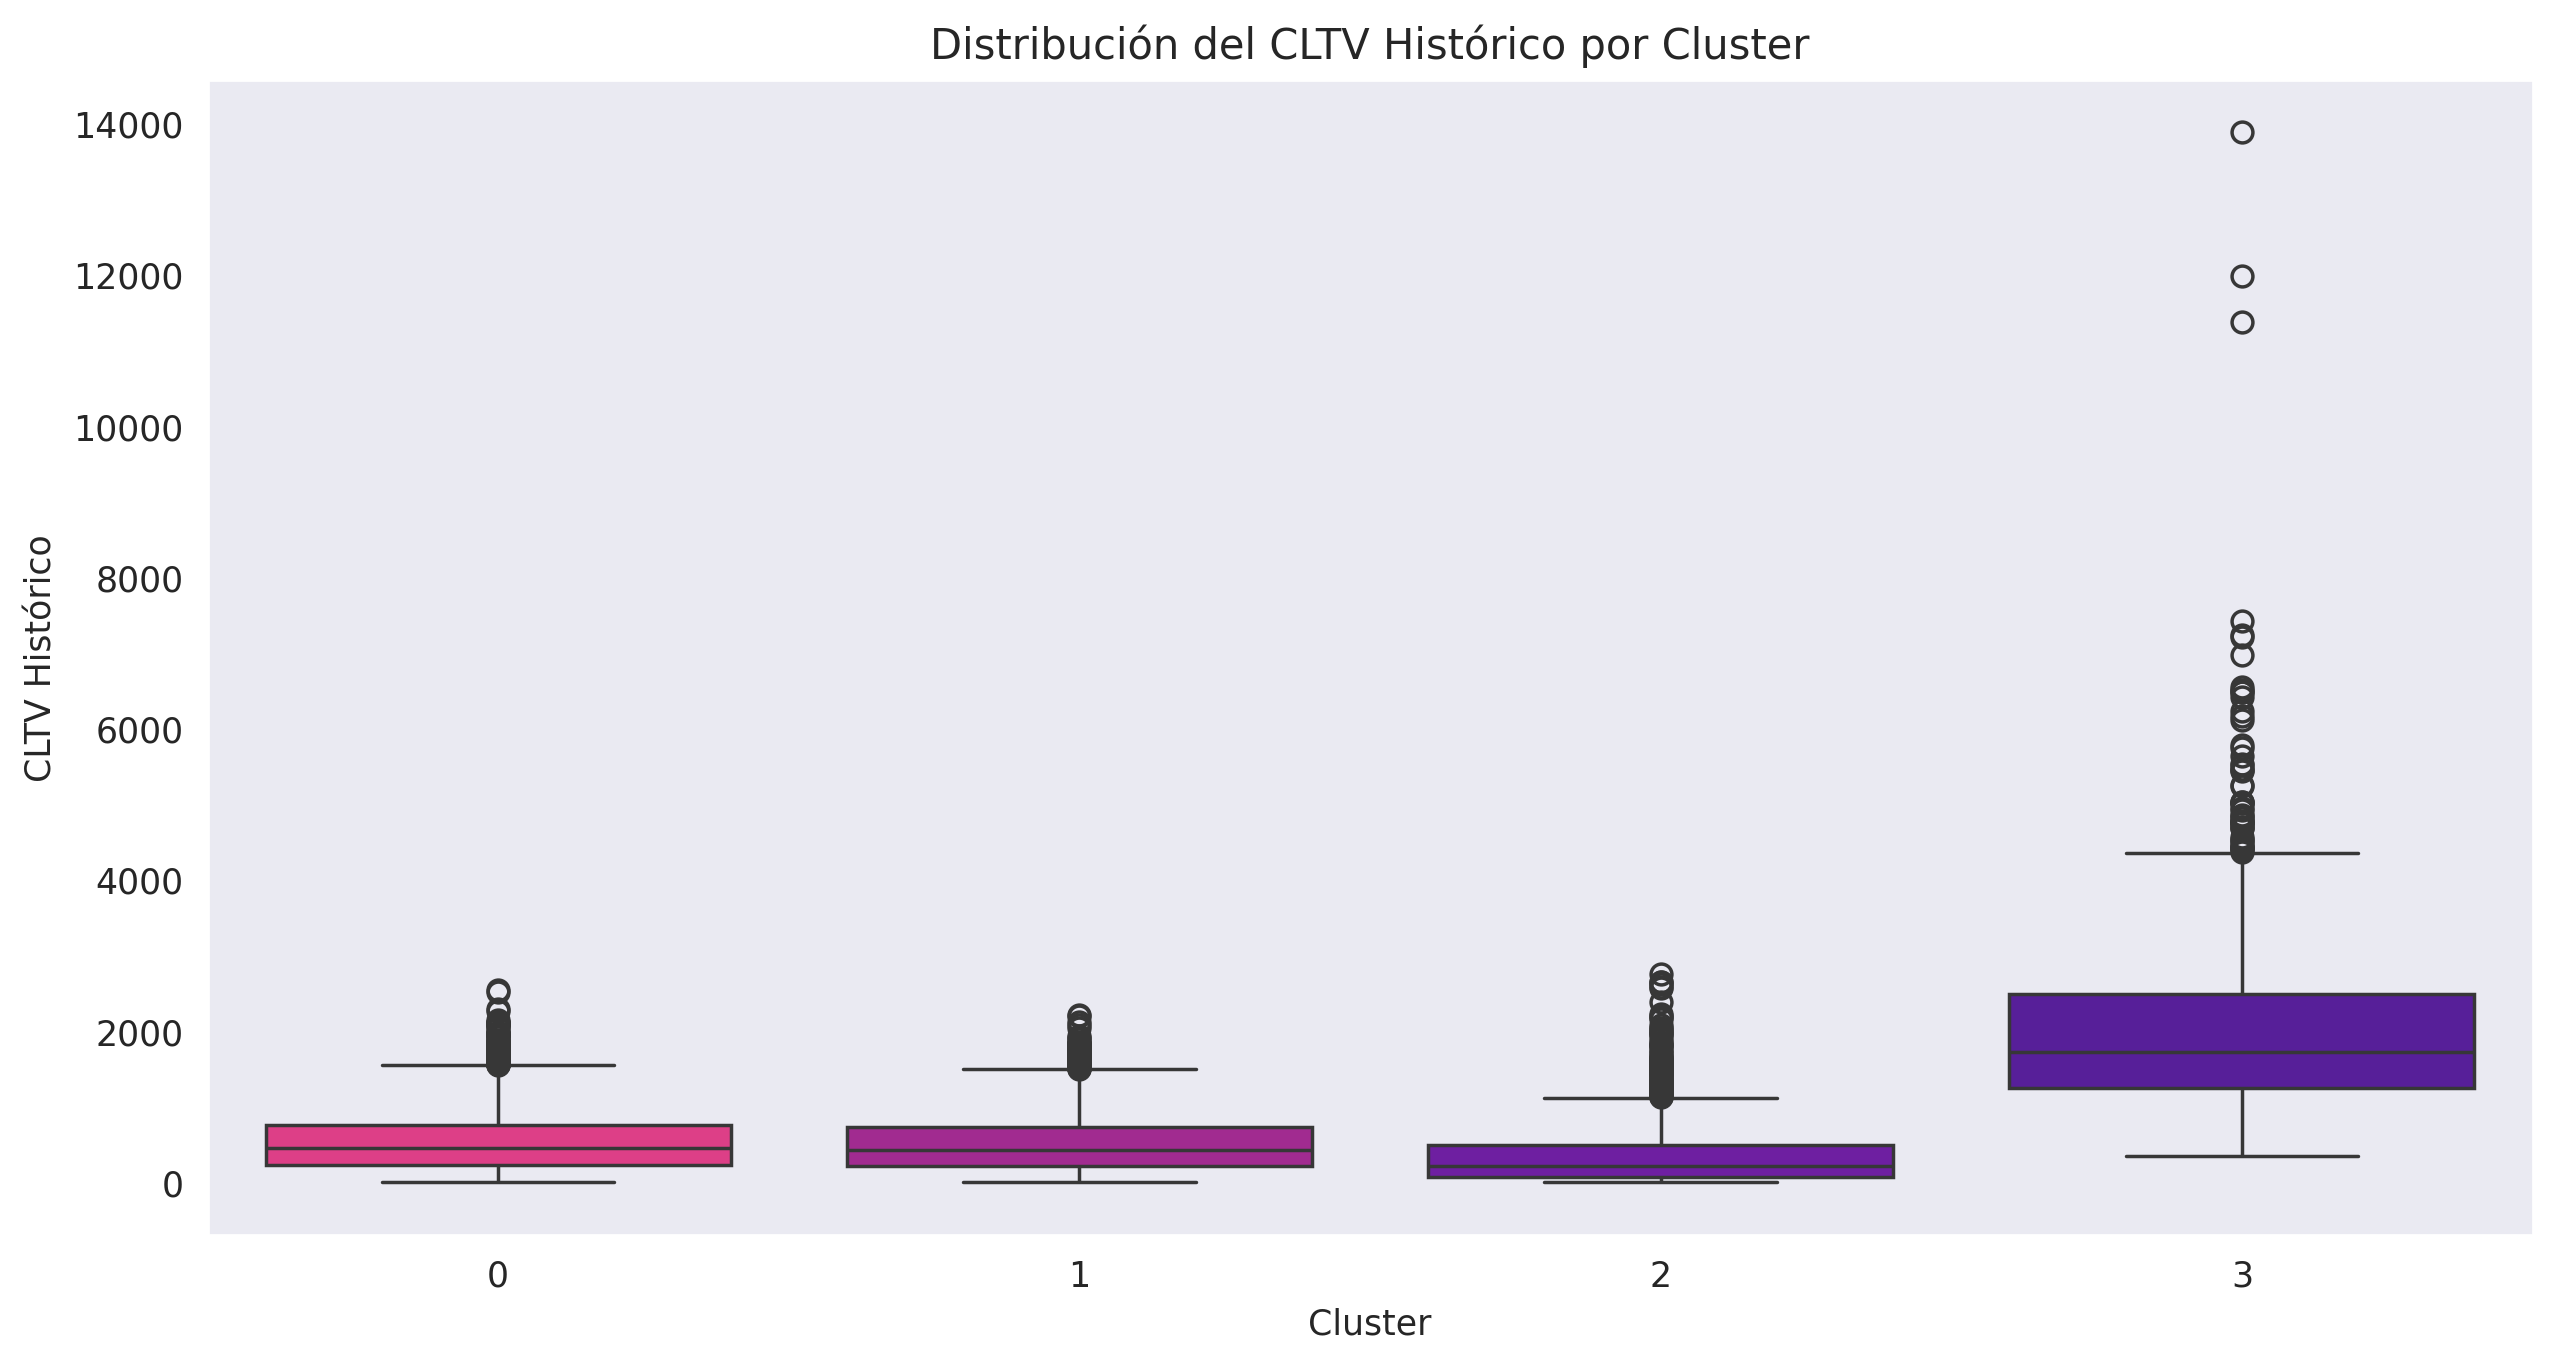

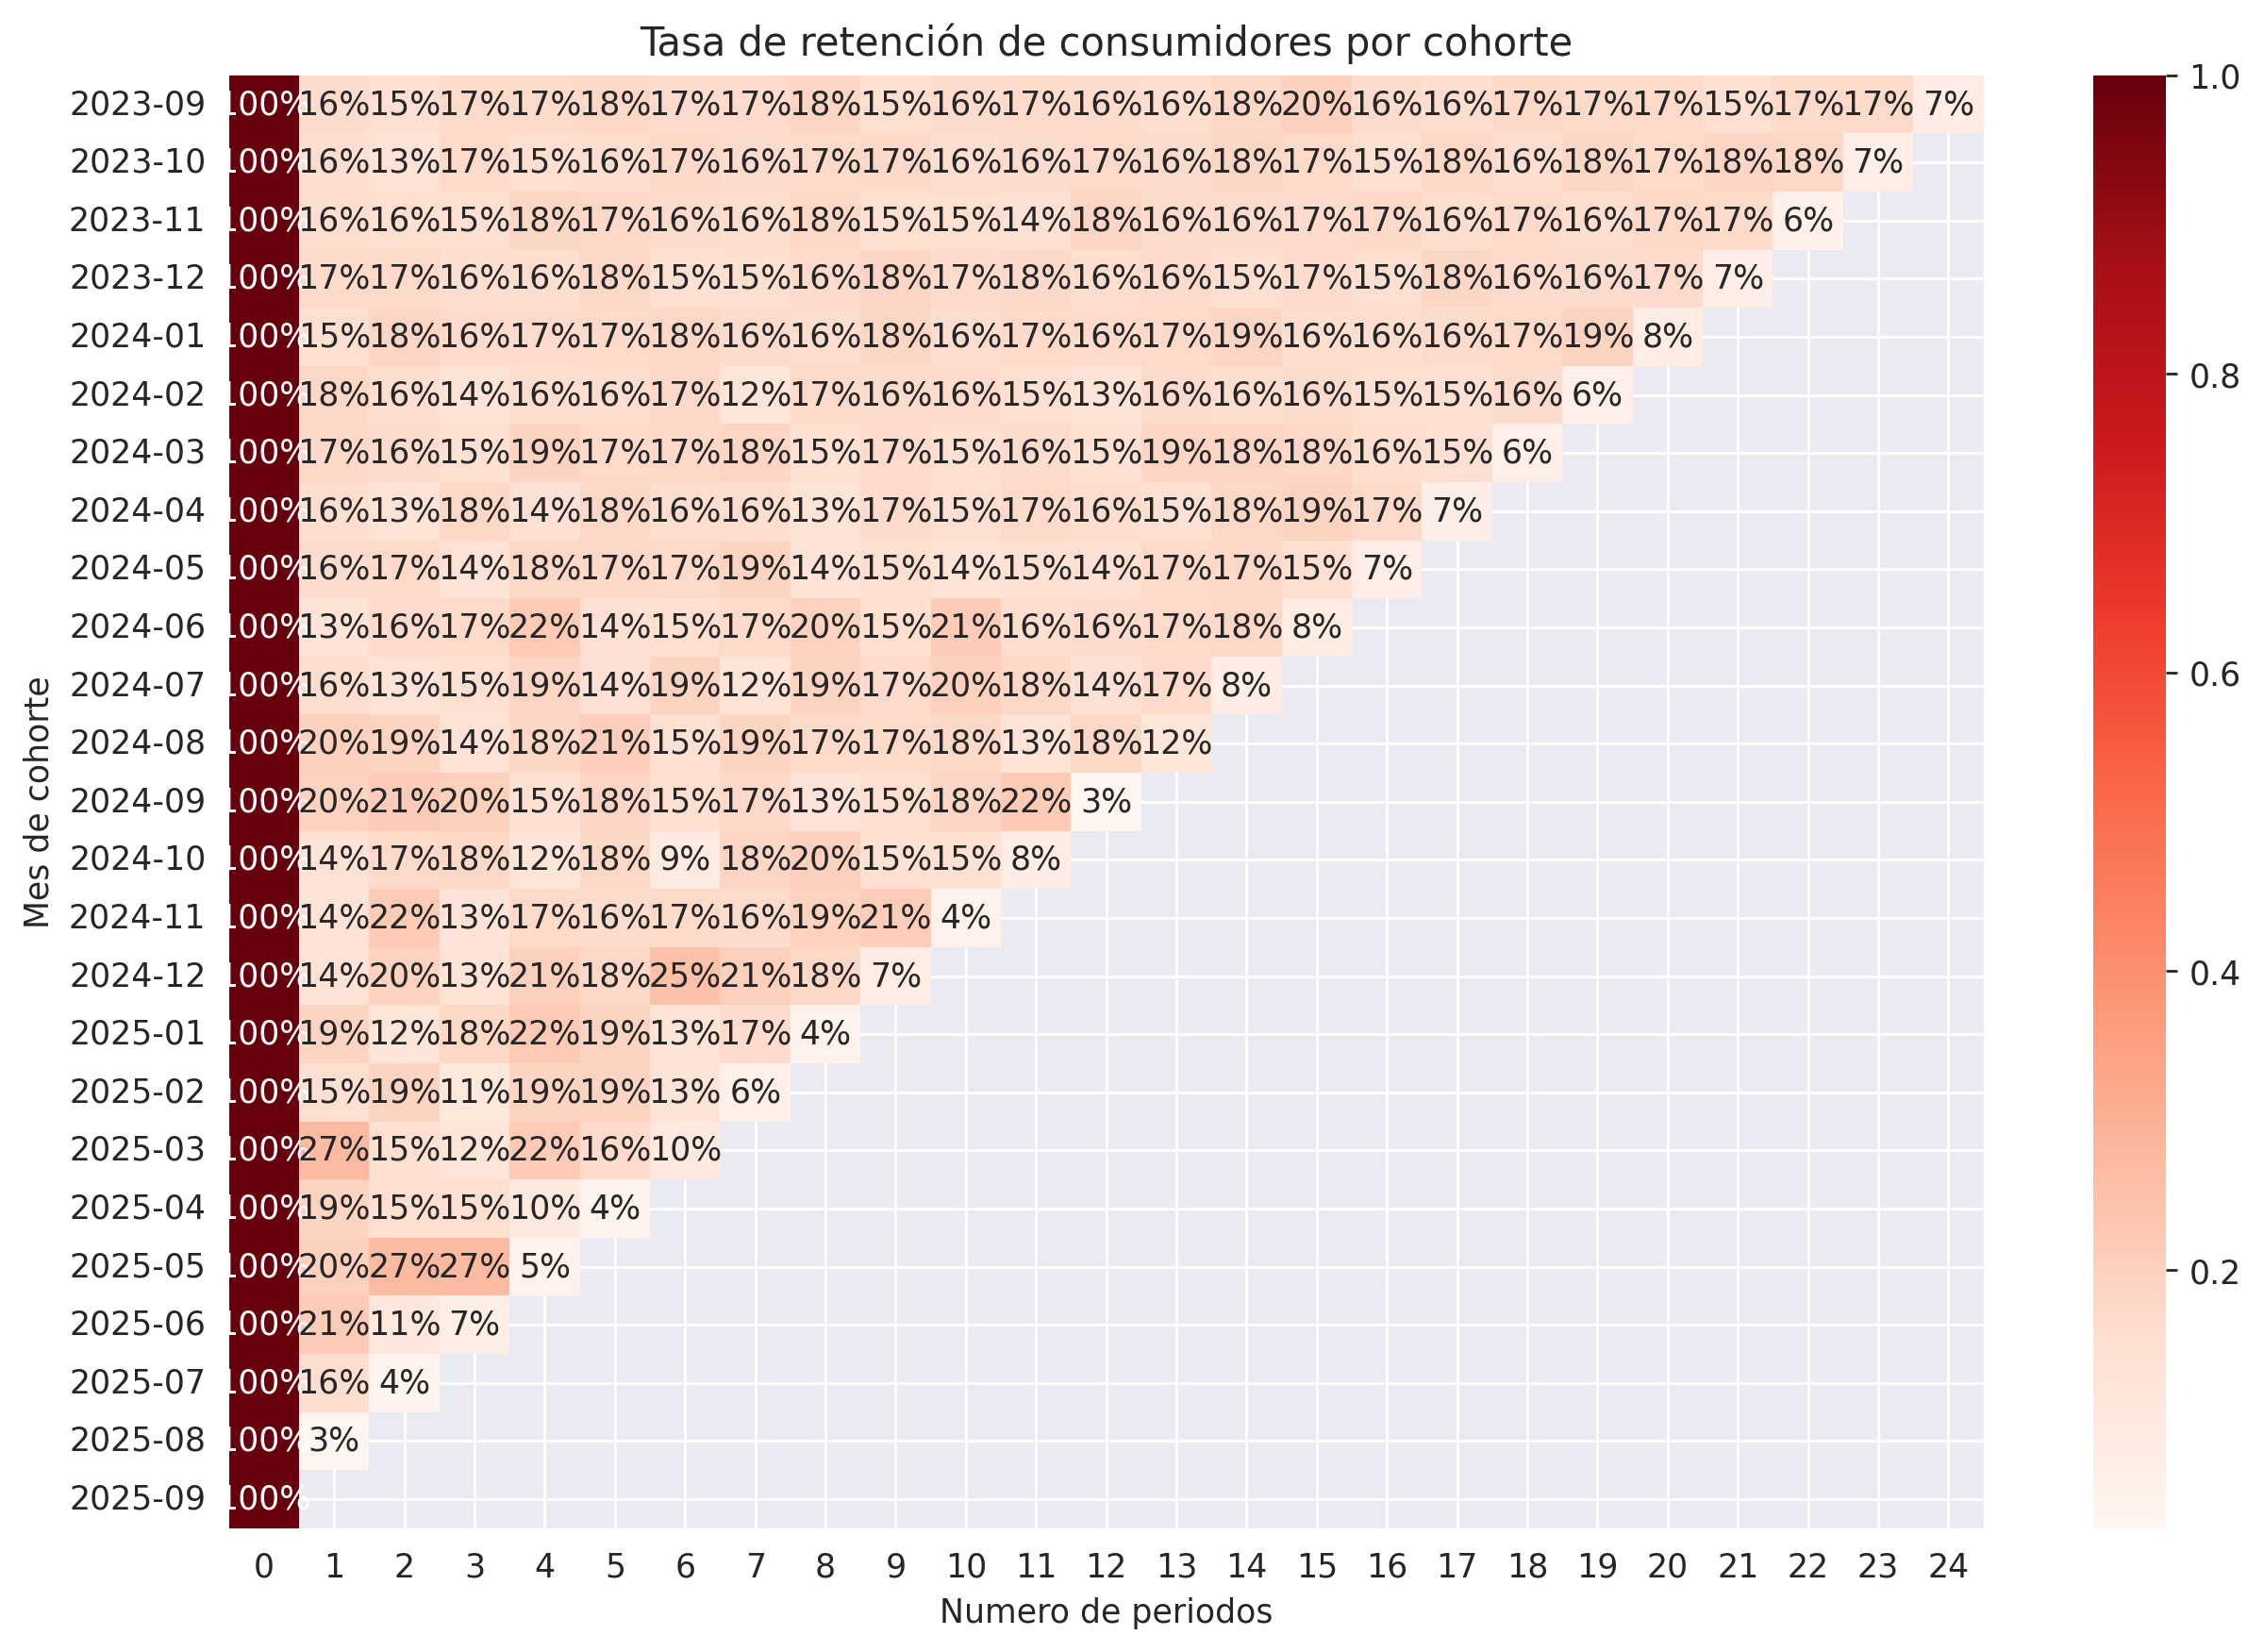

In [ ]:
# Gráfico de número de clientes por grupo de edad y género
clientes_por_genero_edad.plot(kind='bar', stacked=True, figsize=(12, 6), color=custom_palette_2) # Used custom_palette_3
plt.title('Número de clientes por grupo de edad y género')
plt.xlabel('Grupo de edad')
plt.ylabel('Número de clientes')
plt.grid(axis='x')
plt.xticks(rotation=0)
plt.show()

# Gráfico de cantidad de clientes por género
plt.figure(figsize=(8, 8))
plt.pie(Resumen_consumidores['numero_clientes'], labels=Resumen_consumidores.index, autopct='%1.1f%%', startangle=140, colors=custom_palette_2) # Corrected: Directly pass custom_palette_3 to colors
plt.title('Número de clientes por género')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print(f"Número total de clientes únicos: {Resumen_consumidores.numero_clientes.sum()}")
print(f"Número de clientes recurrentes (con más de una compra): {customers_multiple_purchases}")
print(f"Número de clientes nuevos (con una sola compra): {new_customers}")
print(f"Proporción de clientes recurrentes: {proportion_recurrent:.2%}")

# Sort Resumen_region by numero_clientes in descending order
Resumen_region_sorted_clientes = Resumen_region.sort_values(by='numero_clientes', ascending=False)
# Plot the sorted data using seaborn.barplot for distinct colors
plt.figure(figsize=(12, 6))
sns.barplot(x=Resumen_region_sorted_clientes.index, y='numero_clientes', data=Resumen_region_sorted_clientes, palette=custom_palette_2[:len(Resumen_region_sorted_clientes)], hue=Resumen_region_sorted_clientes.index, legend=False) # Used seaborn.barplot and custom_palette_2
plt.title('Número de clientes por región')
plt.xlabel('Región')
plt.ylabel('Número de clientes')
plt.grid(axis='y') # Changed grid axis to y for bar plot
plt.xticks(rotation=0)
plt.show()

# Presentación de gráficos obtenidos por Clusterización a través de K-Means

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

sns.scatterplot(x='recencia',y='gasto_cliente',hue='Cluster',data=Resumen_consumidores_compras, palette=custom_palette_1[:n_clusters],s=100,ax=axes[0])
axes[0].set_title('Cluster de consumidores basado en la recencia y el gasto')
axes[0].set_xlabel('Recencia en días')
axes[0].set_ylabel('Gasto del cliente')

sns.scatterplot(x='frecuencia_compra',y='gasto_cliente',hue='Cluster',data=Resumen_consumidores_compras,palette=custom_palette_1[:n_clusters],s=100, ax=axes[1])
axes[1].set_title('Cluster de consumidores basado en la frecuencia de compra y el gasto')
axes[1].set_xlabel('Frecuencia de compra')
axes[1].set_ylabel('Gasto del cliente')

sns.scatterplot(x='edad_ultima_compra',y='gasto_cliente',hue='Cluster',data=Resumen_consumidores_compras, palette=custom_palette_1[:n_clusters],s=100, ax=axes[2])
axes[2].set_title('Cluster de consumidores basado en la edad de los clientes y el gasto')
axes[2].set_xlabel('Edad del cliente en años')
axes[2].set_ylabel('Gasto del cliente')

plt.tight_layout()
plt.show()

# Analizar las características de cada cluster
print("\nCaracterísticas de cada cluster:")
display(Resumen_consumidores_compras.groupby('Cluster')[['recencia','frecuencia_compra','gasto_cliente','edad_ultima_compra']].mean().round(2)) # Corrected indexing

# Visualizar la distribución del CLTV histórico por cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='CLTV_historico', data=Resumen_consumidores_compras, palette=custom_palette_6[:n_clusters], hue='Cluster', legend=False)
plt.title('Distribución del CLTV Histórico por Cluster')
plt.xlabel('Cluster')
plt.ylabel('CLTV Histórico')
plt.grid(axis='y')
plt.show()

# Gráfico de la tasa de retención
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_retencion, annot=True, fmt='.0%', cmap='Reds') # Keeping Blues for heatmap as it's standard
plt.title('Tasa de retención de consumidores por cohorte')
plt.xlabel('Numero de periodos')
plt.ylabel('Mes de cohorte')
plt.yticks(rotation=0)
plt.show()

### **Resumen de Resultados - Descripción de los Consumidores**

*   **Distribución Demográfica:** El análisis demográfico muestra que la cantidad de clientes tiende a aumentar con la edad, lo que podría sugerir una correlación entre la estabilidad económica y el volumen de compras. En cuanto al género, la distribución entre hombres y mujeres es casi equitativa, con una diferencia mínima. Existe un pequeño porcentaje de clientes que se identifican con otro género o no especificaron su género. Regionalmente, no hay grandes diferencias en la cantidad de clientes, aunque se observa un ligero descenso en las regiones Sur, Norte, Este, Oeste y Centro, en ese orden, lo que podría estar relacionado con la distancia o limitaciones logísticas.
*   **Clientes Nuevos vs. Recurrentes:** El análisis muestra que una gran proporción de clientes son recurrentes (**93.99%** de clientes únicos, con **7428** recurrentes y **475** nuevos). Esto indica una base de clientes leal, lo cual es positivo para el negocio.
*   **Segmentación por Comportamiento (Clustering):** Los resultados del clustering han clasificado a los consumidores en cuatro segmentos con características distintas. El Cluster 0 incluye consumidores de aproximadamente 31 años, con una recencia de 109 días, un gasto promedio de \$549 y una frecuencia de compra superior a 4. El Cluster 1 agrupa a consumidores de unos 58 años, con 109 días de recencia, un gasto promedio de \$512 y una frecuencia de compra superior a 4. El Cluster 2, con un cambio significativo, muestra consumidores de alrededor de 44 años, 412 días de recencia, un gasto promedio de $364 y una frecuencia de compra ligeramente superior a 2. Finalmente, el Cluster 3 presenta consumidores de aproximadamente 45 años, con una recencia de 87 días, un gasto promedio de \$2018 y una frecuencia de compra superior a 7.
*   **Clientes Más Valiosos (RFM):** El Cluster 3 representa el grupo de consumidores más valiosos según los criterios RFM, con la menor recencia, la mayor frecuencia de compra y el gasto promedio más alto (\$2018). Para este segmento, se recomiendan estrategias para fomentar la lealtad, como promociones exclusivas o envío gratuito.
*   **Distribución del Valor de Vida del Cliente (CLTV) Histórico por Cluster:** El análisis del CLTV histórico por cluster revela diferencias significativas en el valor que cada segmento ha aportado hasta ahora. El Cluster 3 se destaca claramente como el grupo con el CLTV histórico promedio más alto, lo que indica que estos clientes han realizado las compras de mayor valor total a lo largo del tiempo. Los Clusters 0 y 1 presentan un CLTV histórico promedio moderado, mientras que el Cluster 2 tiene el CLTV histórico promedio más bajo. El boxplot también muestra que el Cluster 3 no solo tiene un promedio más alto, sino también una mayor dispersión en el CLTV histórico y la presencia de outliers que representan a los clientes de mayor gasto individual. Esta distribución subraya la importancia estratégica del Cluster 3 como el segmento más valioso en términos de ingresos históricos.
*   **Retención por Cohortes:** La matriz de retención por cohortes muestra que la lealtad de los consumidores disminuye con el tiempo desde un 100% inicial. La tasa de retención se estabiliza en un rango del 10-30% durante la mayoría de los períodos, terminando en su mayoría entre el 5-10%.

## **Método de Pago y Comportamiento Asociado**

El análisis de los métodos de pago permite comprender las preferencias de los clientes y su efecto en la rentabilidad.  
Se examina la distribución de los pagos por tipo (tarjeta, transferencia, efectivo, etc.), y se comparan las tasas de devolución y los márgenes por método.  
También se evalúa si existen diferencias regionales o demográficas en las preferencias de pago.

**Objetivo descriptivo:** identificar patrones de comportamiento financiero y posibles fricciones en el proceso de pago.

1. ¿Qué métodos de pago son más utilizados por región y segmento?  
2. ¿Cómo varía la rentabilidad por método de pago?  
3. ¿Existen diferencias en la tasa de devoluciones según el método?  

/tmp/ipython-input-2297465404.py:3: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(x=Resumen_metodo_pago.index,y='numero_clientes',data=Resumen_metodo_pago,palette=custom_palette_1, hue=Resumen_metodo_pago.index, legend=False)


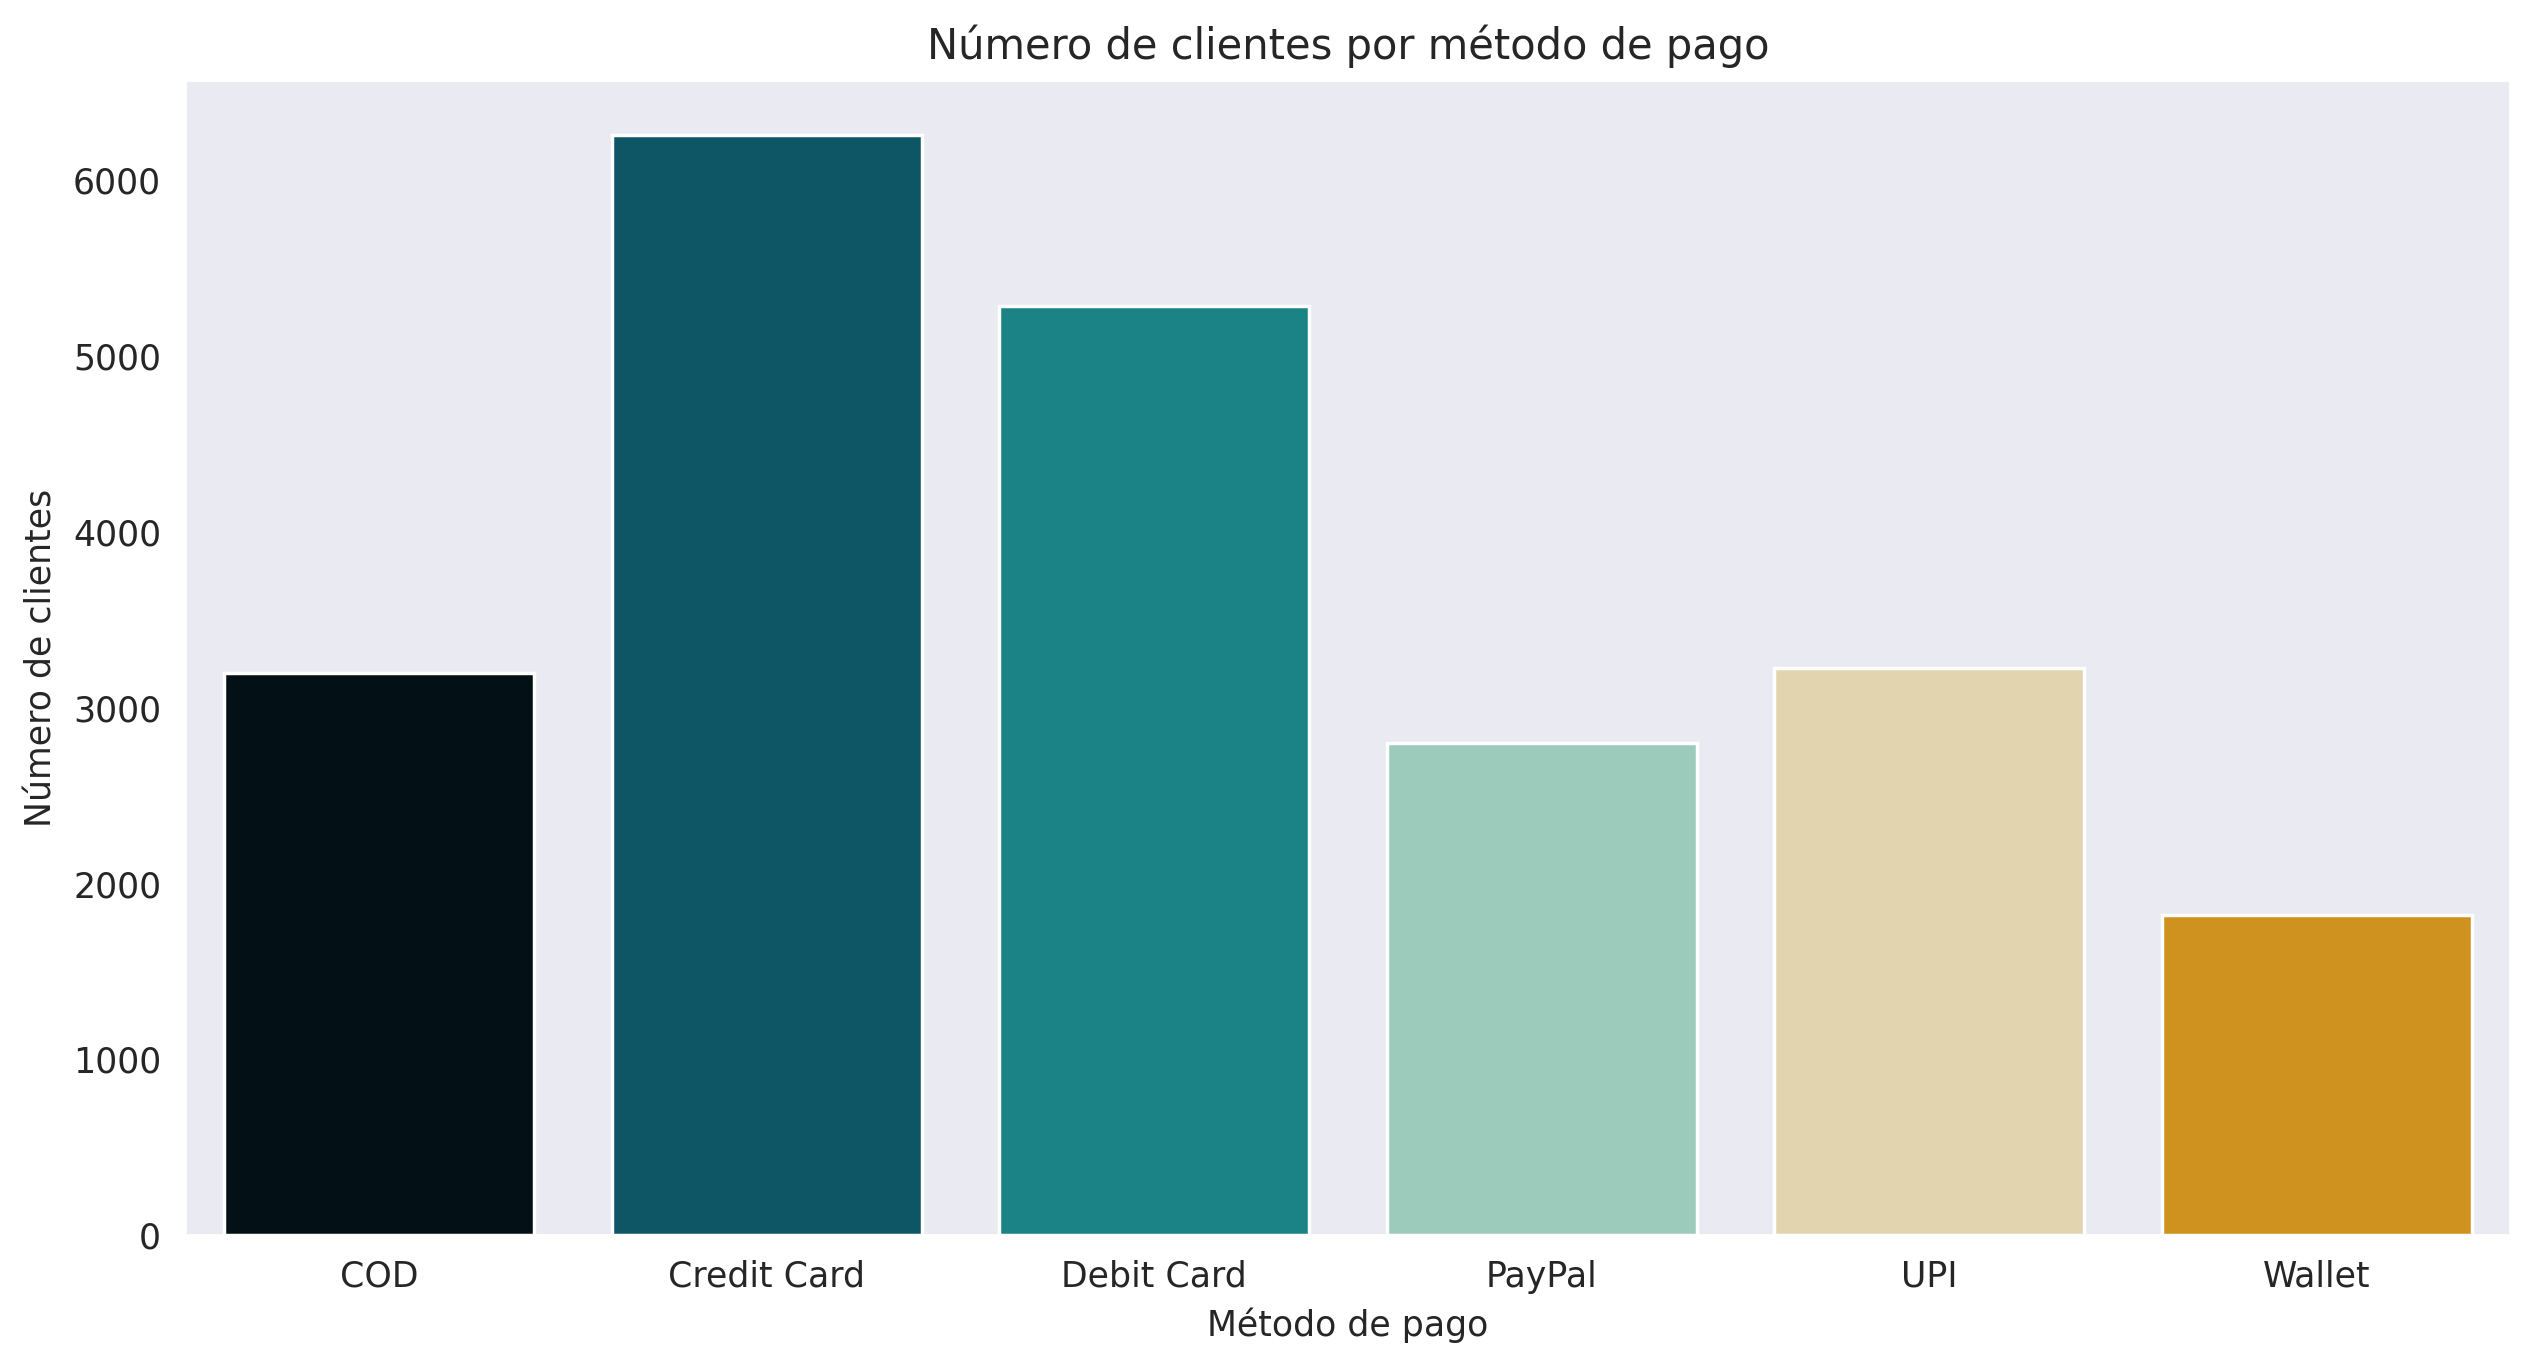

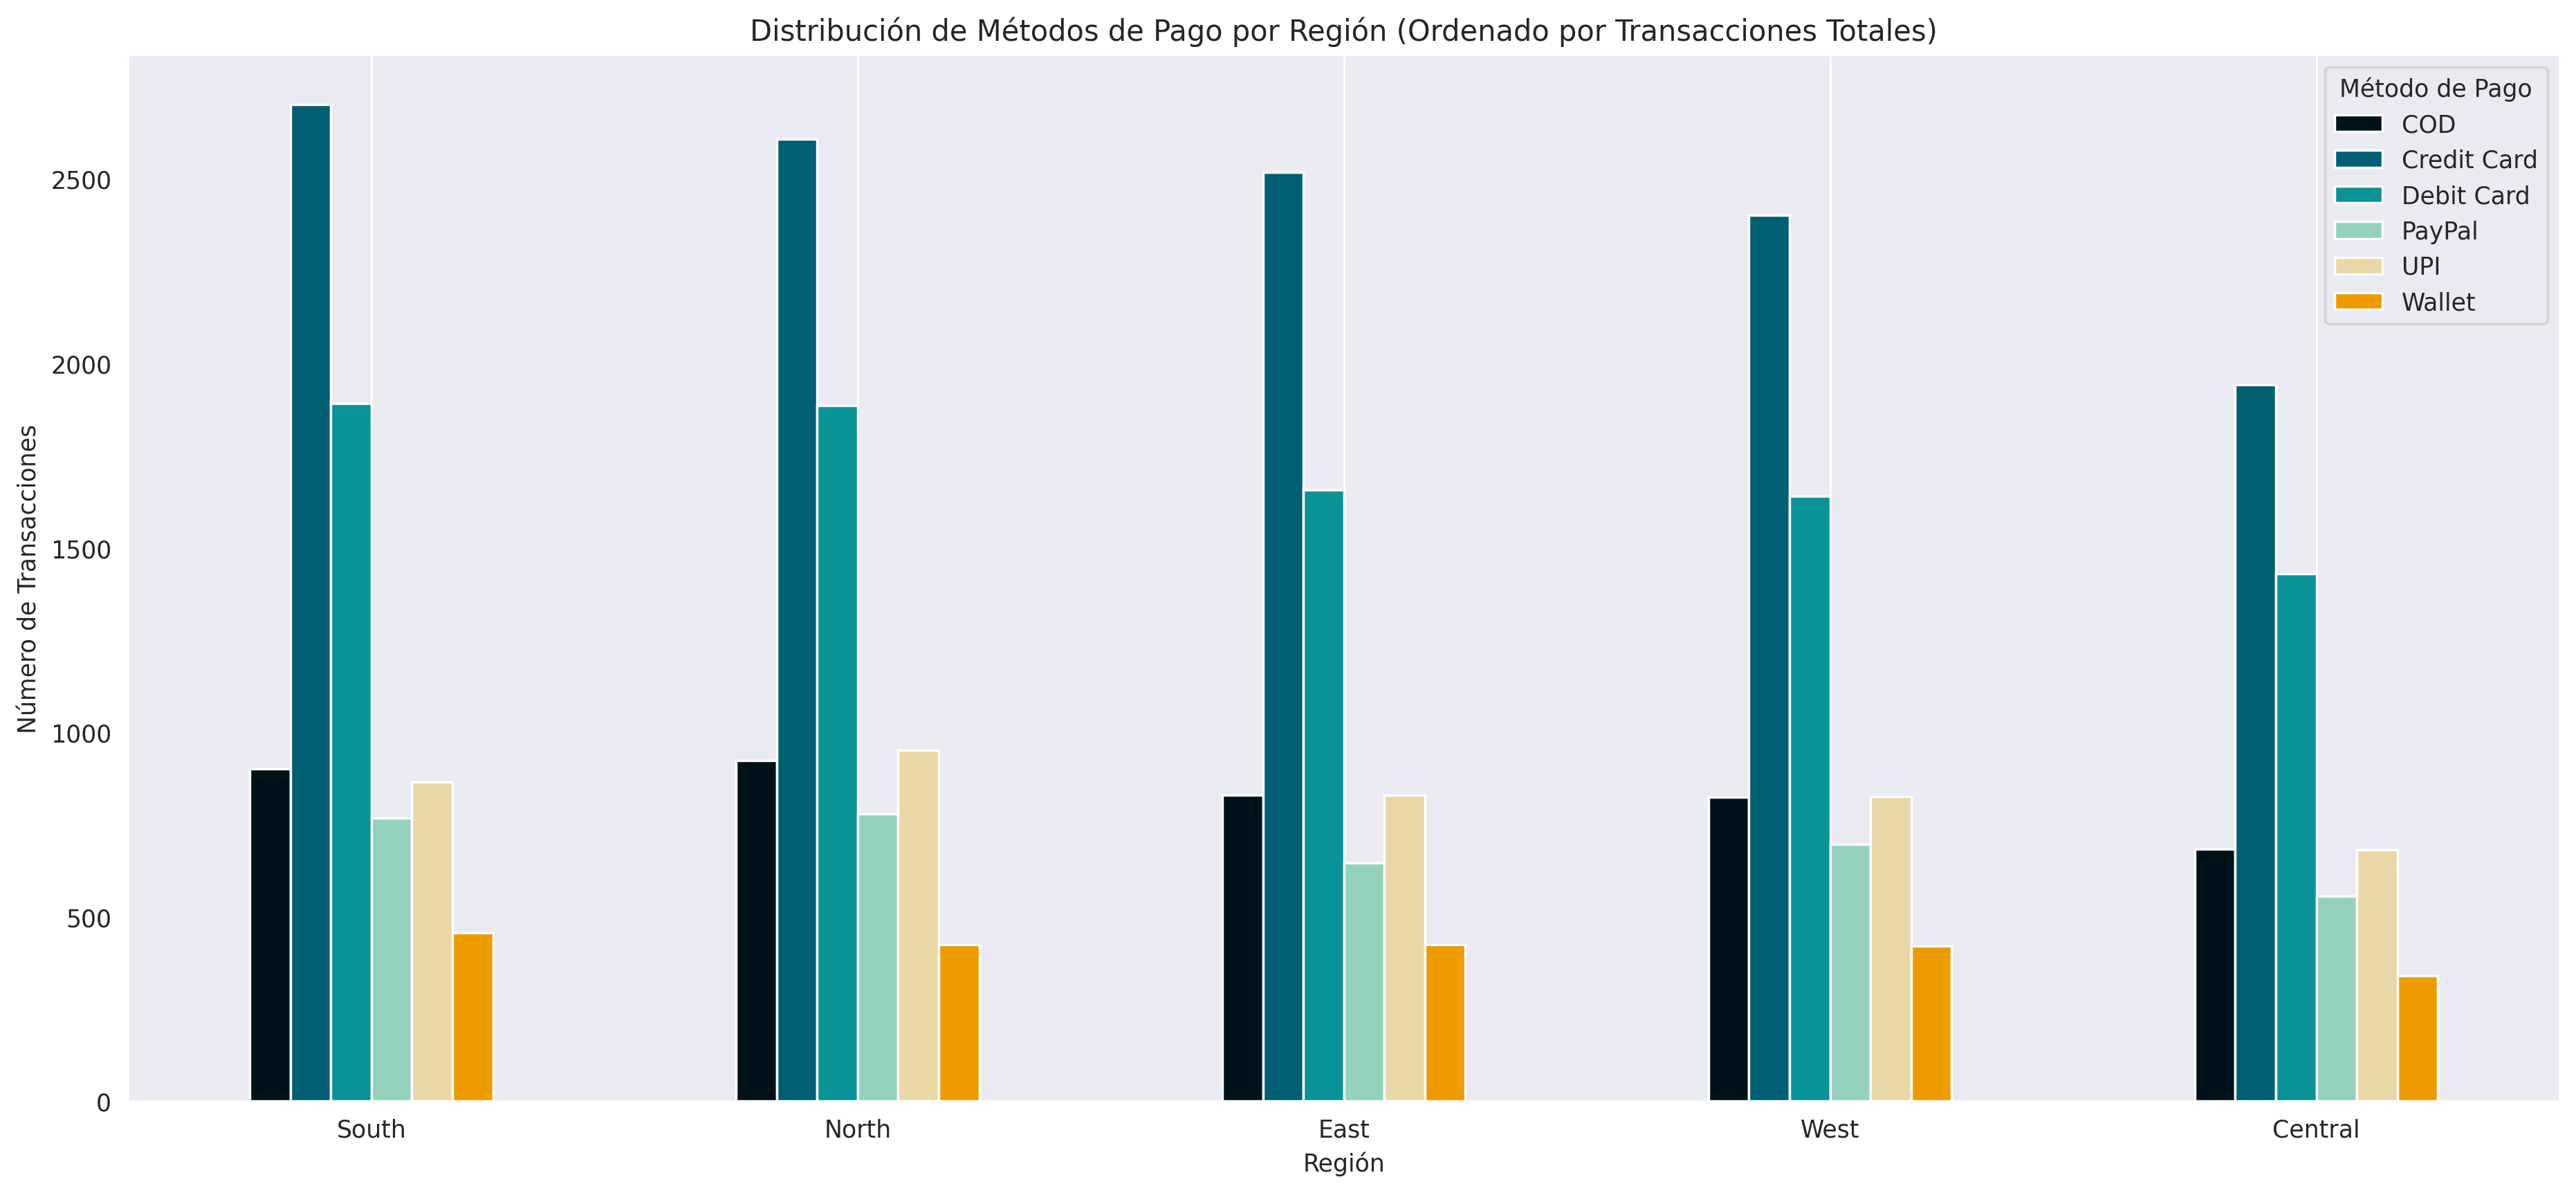

/tmp/ipython-input-2297465404.py:23: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(x=Rentabilidad_promedio_metodo_pago.index,y=Rentabilidad_promedio_metodo_pago.values, palette=custom_palette_1,hue=Rentabilidad_promedio_metodo_pago.index, legend=False)


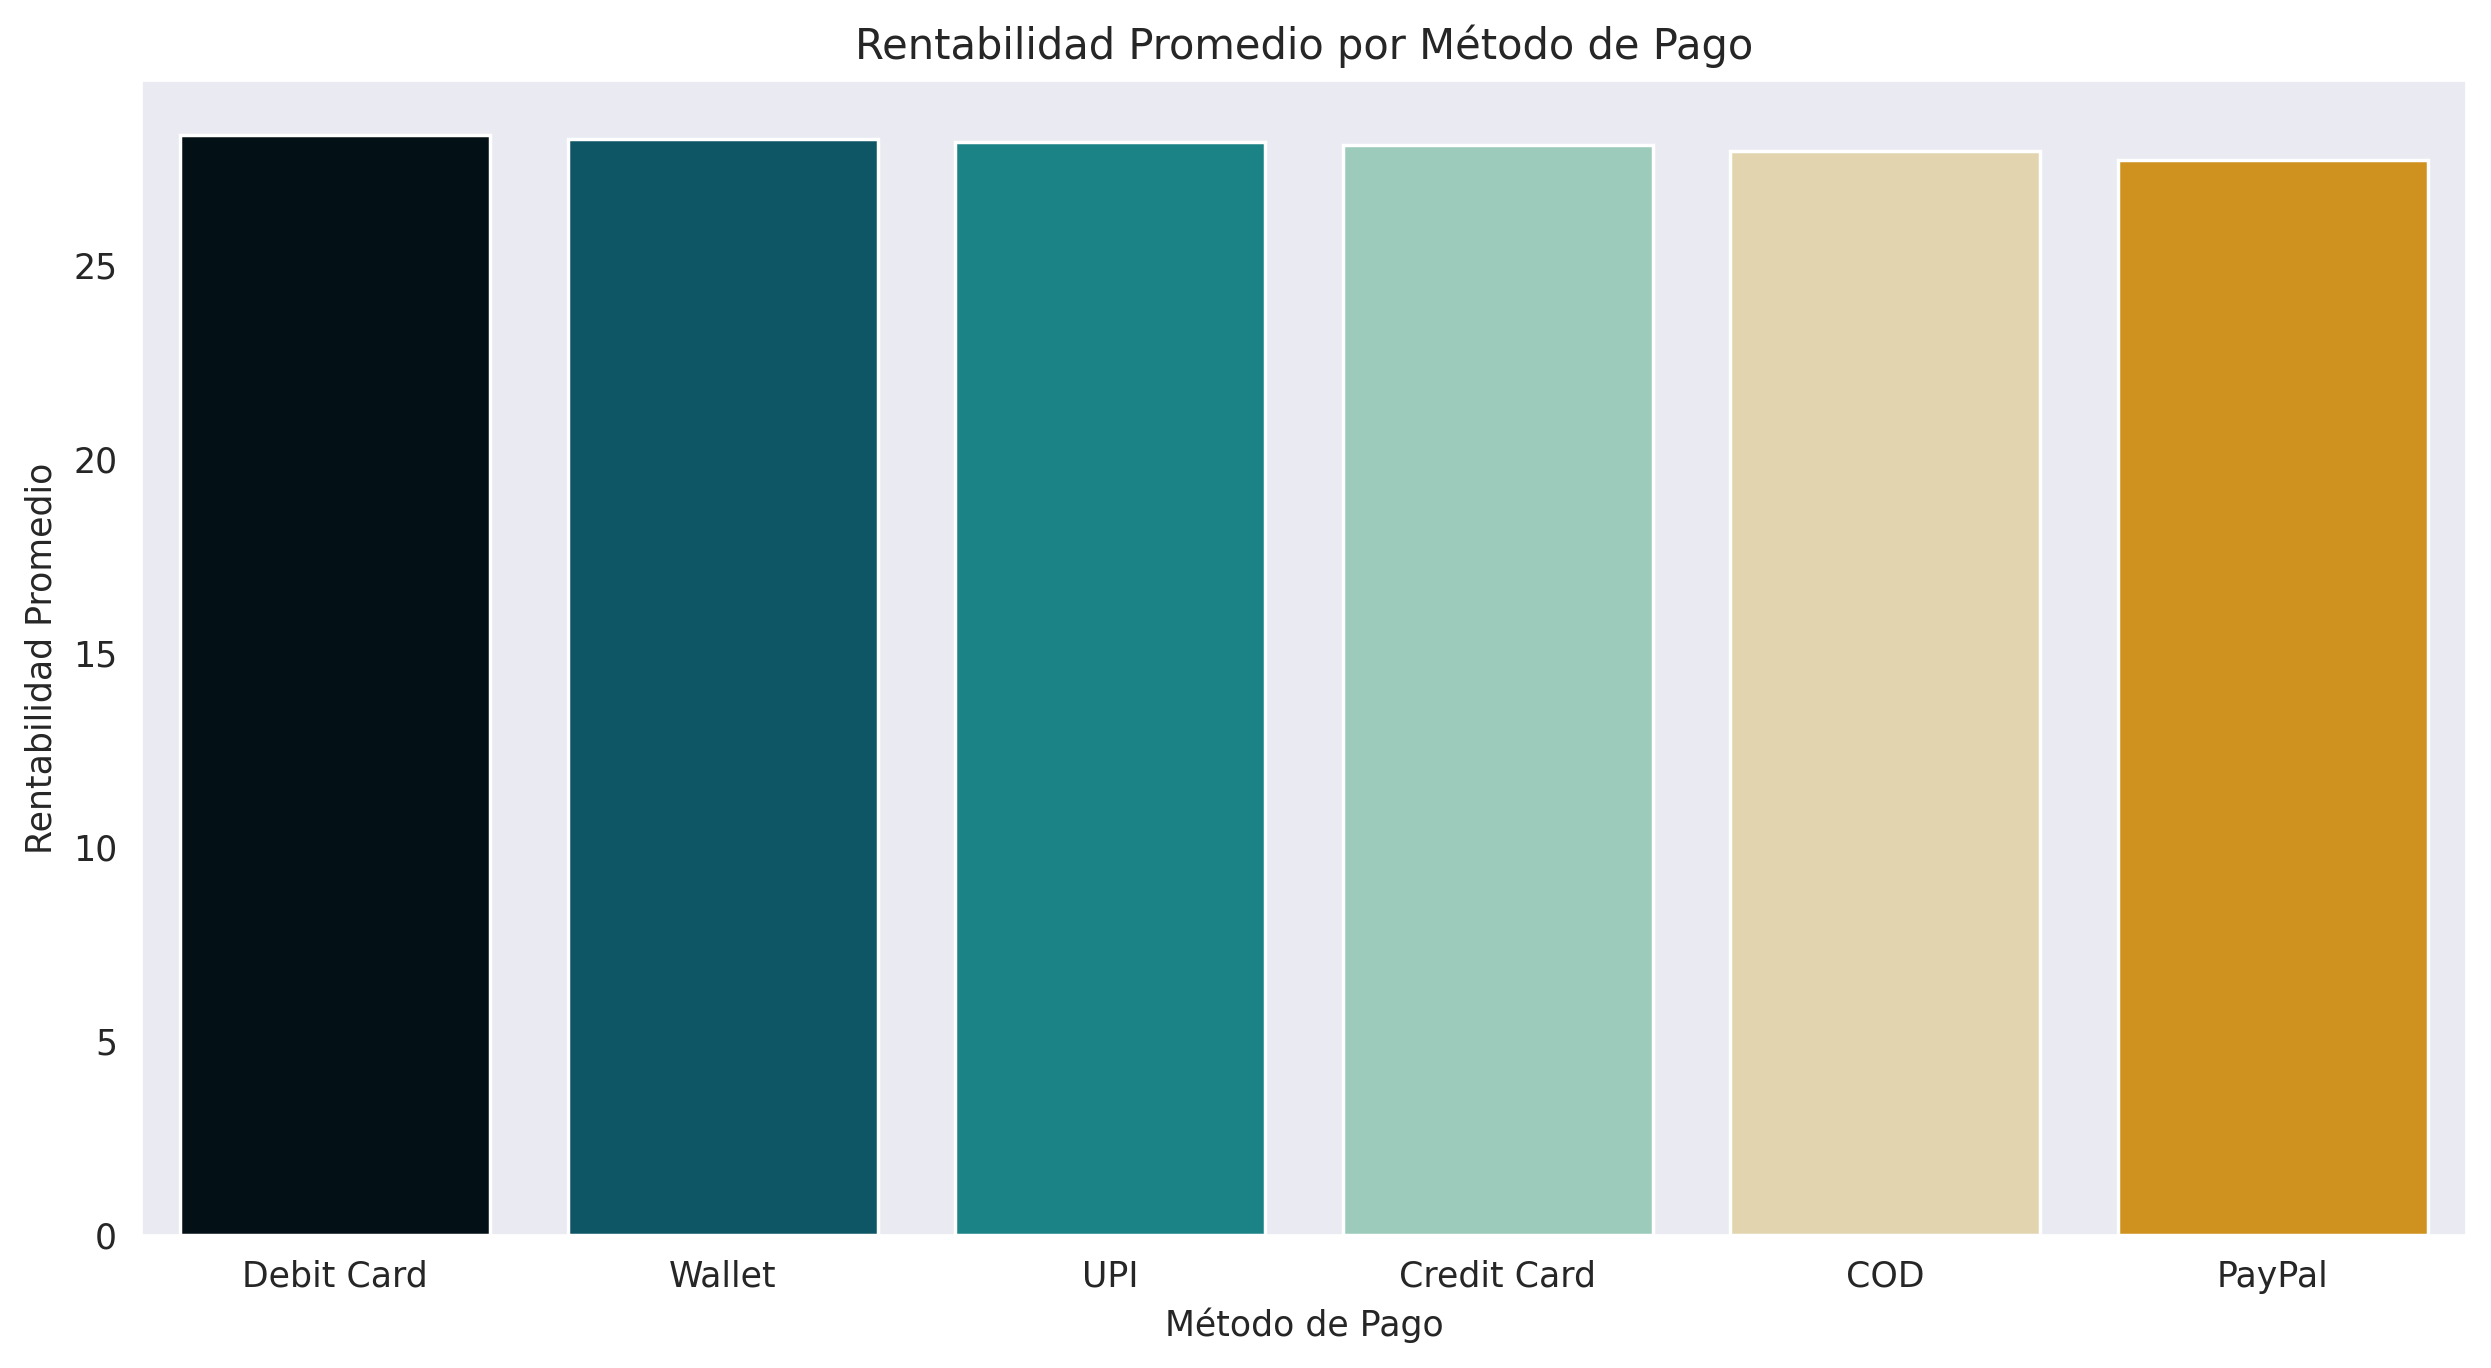

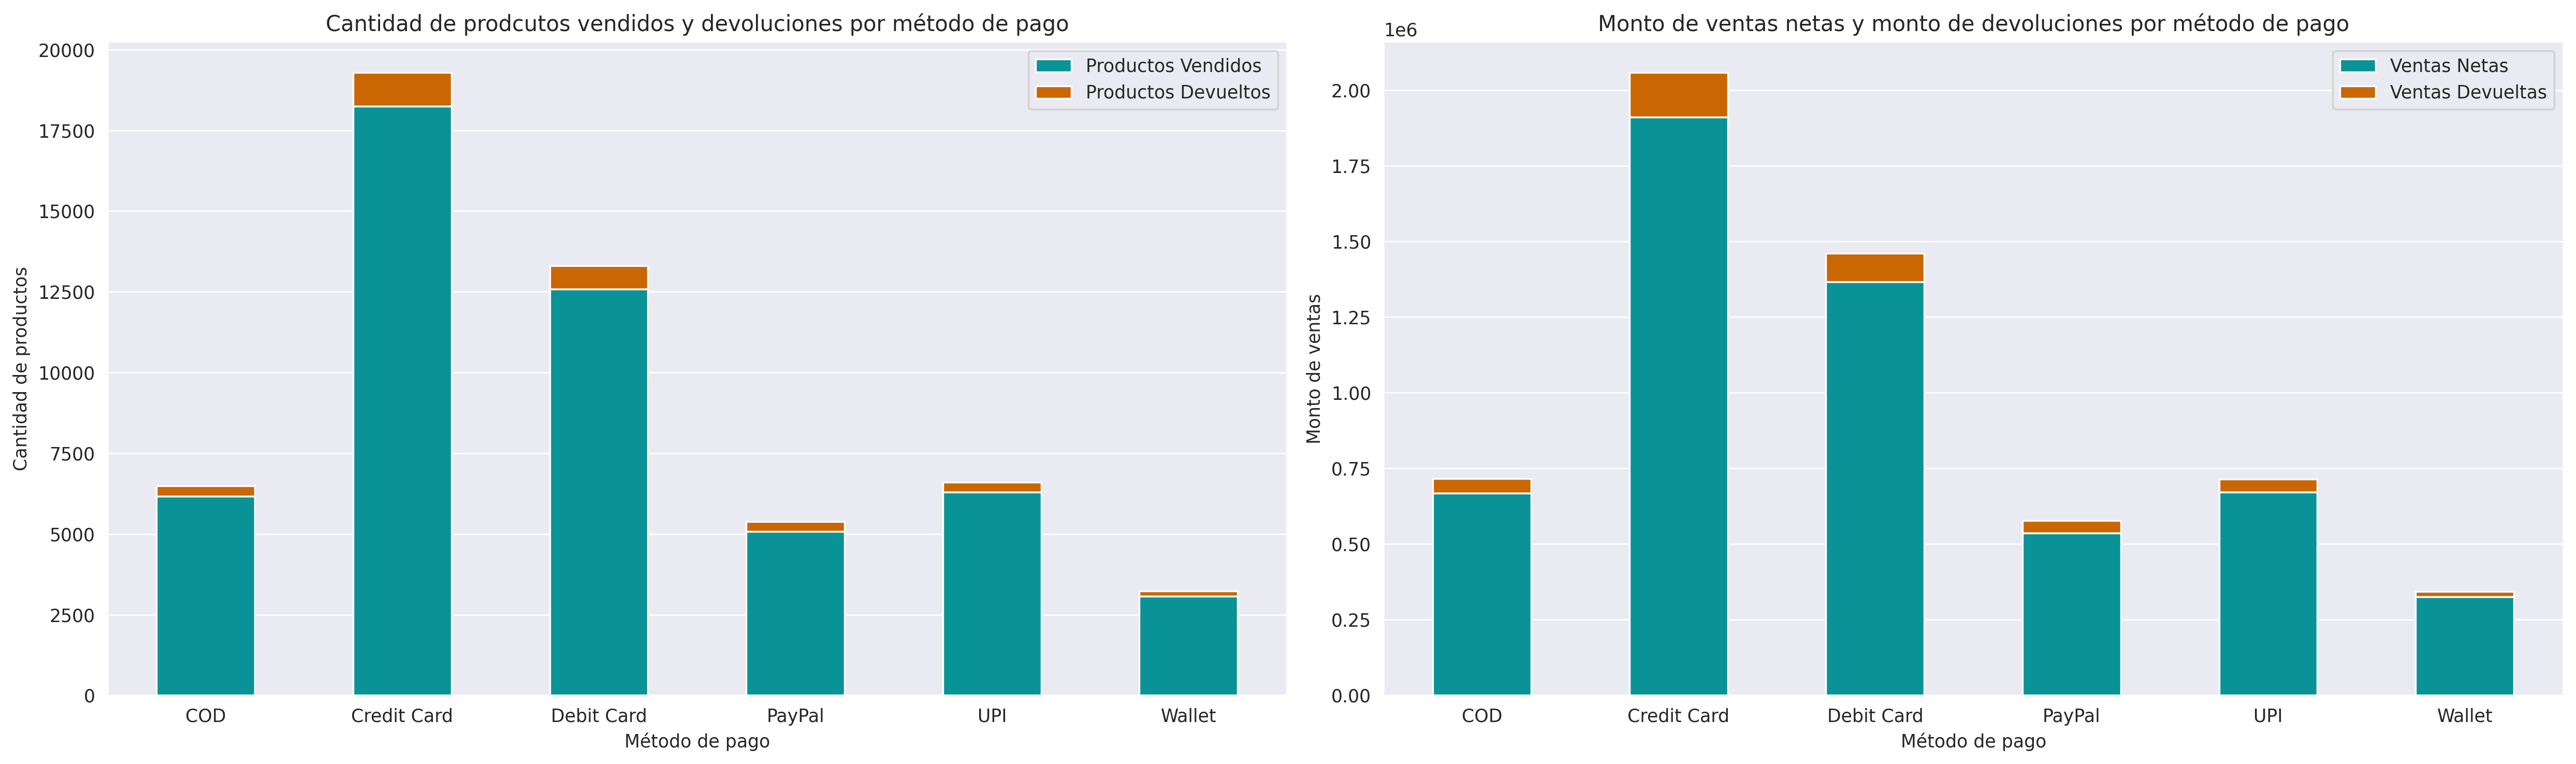

In [ ]:
# Gráfico de cantidad de clientes por método de pago
plt.figure(figsize=(12,6))
sns.barplot(x=Resumen_metodo_pago.index,y='numero_clientes',data=Resumen_metodo_pago,palette=custom_palette_1, hue=Resumen_metodo_pago.index, legend=False)
plt.title('Número de clientes por método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Número de clientes')
plt.grid(axis='y')
plt.show()

# Crear el gráfico de barras agrupadas ordenado
Resumen_region_metodo_pago_sorted.plot(kind='bar', figsize=(15, 7), color=custom_palette_1)
plt.title('Distribución de Métodos de Pago por Región (Ordenado por Transacciones Totales)')
plt.xlabel('Región')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=0)
plt.legend(title='Método de Pago')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Gráfico de rentabilidad promedio por método de pago
plt.figure(figsize=(12,6))
sns.barplot(x=Rentabilidad_promedio_metodo_pago.index,y=Rentabilidad_promedio_metodo_pago.values, palette=custom_palette_1,hue=Rentabilidad_promedio_metodo_pago.index, legend=False)
plt.title('Rentabilidad Promedio por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Rentabilidad Promedio')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

# Gráfico de cantidad de artículos vendidos y devueltos por método de pago
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
Resumen_metodo_pago[['cantidad_productos_vendidos','cantidad_productos_devueltos']].plot(kind='bar', stacked=True, ax=axes[0],color=[custom_palette_1[2], custom_palette_1[6]])
axes[0].set_title('Cantidad de prodcutos vendidos y devoluciones por método de pago')
axes[0].set_xlabel('Método de pago')
axes[0].set_ylabel('Cantidad de productos')
axes[0].grid(axis='x')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(['Productos Vendidos', 'Productos Devueltos'])


# Gráfico de ventas totales y devoluciones por método de pago - Corrected approach for stacked bar plot
Resumen_metodo_pago[['ventas_netas', 'ventas_devolutas']].plot(kind='bar', stacked=True, ax=axes[1], color=[custom_palette_1[2], custom_palette_1[6]])
axes[1].set_title('Monto de ventas netas y monto de devoluciones por método de pago')
axes[1].set_xlabel('Método de pago')
axes[1].set_ylabel('Monto de ventas')
axes[1].grid(axis='x')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(['Ventas Netas', 'Ventas Devueltas'])

plt.tight_layout()
plt.show()

### **Resumen de Resultados - Método de Pago**

* **Métodos de Pago Populares:** El método de pago predominante es la **tarjeta de crédito**, seguido por la tarjeta de débito, COD, UPI y Wallet. Esta preferencia se mantiene constante en todas las regiones, lo que sugiere una amplia aceptación de estos métodos. Identificar estos métodos populares es clave para implementar estrategias de marketing y ofrecer beneficios que atraigan y fidelicen clientes.

* **Rentabilidad por Método de Pago:** La rentabilidad promedio por método de pago muestra una variación limitada. Esto implica que las estrategias de precios y las consideraciones sobre tasas de interés para los diferentes métodos tienen un impacto similar en el margen de beneficio bruto.

* **Tasa de Devoluciones por Método de Pago:** La tasa de devoluciones por método de pago parece estar directamente relacionada con el volumen de ventas de cada método. Esto sugiere que el método de pago en sí mismo no influye significativamente en la probabilidad de devolución, sino que las diferencias se deben al volumen de transacciones. No obstante, es fundamental optimizar los procesos de devolución para métodos de alto volumen, como la tarjeta de crédito, para garantizar una experiencia positiva para el cliente.

## **Recomendaciones**

Basado en el análisis integral del rendimiento del e-commerce, se proponen las siguientes recomendaciones estratégicas:

**Área Financiera:**

*   **Gestión Estratégica de Descuentos:** Implementar una política de descuentos más selectiva, enfocándose en categorías de menor margen o en momentos de baja estacionalidad para estimular la demanda sin erosionar excesivamente la rentabilidad. Analizar la elasticidad de precio por categoría.
*   **Optimización de Categorías Rentables:** Priorizar la inversión en marketing y stock para las categorías de **Electrónica, Hogar y Deportes**, que demuestran ser las más rentables. Considerar la expansión de la oferta dentro de estos nichos.
*   **Análisis de Costos Operativos:** Realizar un análisis más detallado de todos los costos operativos de la cadena de suministro, no solo envío y devoluciones, para obtener una imagen completa de la rentabilidad neta por pedido, categoría y región.

**Área Logística:**

*   **Mejora de Tiempos de Entrega en la Región Este:** Investigar y abordar las causas de los tiempos de entrega más largos en la región Este. Esto podría implicar optimizar rutas, considerar centros de distribución locales o evaluar proveedores logísticos alternativos.
*   **Análisis de Causas de Devoluciones:** Implementar mecanismos para recopilar información detallada sobre los motivos de las devoluciones (por ejemplo, encuestas post-devolución). Utilizar estos datos para identificar problemas recurrentes (calidad del producto, descripciones inexactas, etc.) y tomar medidas correctivas.
*   **Evaluación de Costos de Envío por Producto:** Analizar la relación entre el costo de envío y el tipo/valor del producto para asegurar que los costos de envío sean proporcionales y no impacten negativamente en el margen, especialmente para productos de alto valor.

**Área Comercial:**

*   **Estrategias de Marketing Estacional:** Desarrollar campañas de marketing dirigidas a los meses de alta estacionalidad (Abril, Diciembre, Octubre, Noviembre) para maximizar las ventas. Considerar promociones especiales o lanzamientos de productos. De manera similar, implementar estrategias para estimular las ventas en los meses de baja estacionalidad (Enero, Agosto).
*   **Potenciación del Top 10 de Productos:** Aunque representan una pequeña proporción del total, enfocar esfuerzos en promocionar y mantener el stock adecuado del Top 10 de productos, dado su contribución a las ventas totales. Analizar oportunidades de venta cruzada con estos productos.
*   **Análisis de Cesta de Mercado:** Realizar un análisis de asociación de productos para identificar combinaciones de productos que se compran frecuentemente juntos. Utilizar esta información para optimizar la disposición de productos en la web, crear paquetes de productos y mejorar las recomendaciones personalizadas.

**Descripción de los Consumidores:**

*   **Estrategias para Clientes de Alto Valor (Cluster 3):** Implementar programas de fidelización, ofertas exclusivas, acceso temprano a nuevos productos o envío gratuito para retener y recompensar a los clientes del Cluster 3, que son los más valiosos según el análisis de CLTV histórico.
*   **Estrategias para Otros Segmentos:** Desarrollar estrategias de marketing y re-engagement personalizadas para los otros clusters, adaptadas a sus características específicas (recencia, frecuencia, gasto, CLTV histórico). Por ejemplo, campañas para reactivar clientes con alta recencia (Cluster 2).
*   **Análisis y Proyección del Valor de Vida del Cliente (CLTV):** Continuar el análisis del CLTV, explorando modelos predictivos para proyectar el valor futuro de los diferentes segmentos de clientes. Utilizar el CLTV para asignar de manera más efectiva los presupuestos de marketing y retención.

**Método de Pago:**

*   **Optimización del Proceso de Pago con Tarjeta de Crédito:** Dado que es el método más utilizado, asegurar que el proceso de pago con tarjeta de crédito sea lo más rápido, seguro y libre de fricciones posible.
*   **Monitoreo de Tendencias de Pago:** Mantenerse actualizado sobre las tendencias en métodos de pago y considerar la integración de nuevas opciones si se alinean con las preferencias de los clientes y las capacidades técnicas.

Implementar estas recomendaciones basadas en los datos puede ayudar a optimizar la rentabilidad, mejorar la eficiencia operativa y fortalecer la relación con los clientes.